# **Traditional Machine Learning Models Comparison**

In [1]:
!pip install scikit-learn

In [118]:
!pip install librosa soundfile numpy scikit-learn pyaudio

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import librosa
import soundfile
import os, glob
import time



In [2]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [3]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [4]:
# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2):
    X, y = [], []
    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in int2emotion.values():
                if label.lower() in basename.lower():
                    emotion = label
                    break
            
            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            y.append(emotion)
    
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)


In [5]:
data_paths = [
    "C:\\Users\\Samen Das\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\wav",
    "C:\\Users\Samen Das\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\data1",
   
   
]

In [6]:
X_train, X_test, y_train, y_test = load_data(data_paths, test_size=0.25)

Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_02_01_dogs-sitting_angry.wav
Processing file: 02_01_02_01_dogs-sitting_disgust.wav
Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_dogs-sitting_happy.wav
Processing file: 02_01_02_01_dogs-sitting_ps.wav
Processing file: 02_01_02_01_dogs-sitting_sad.wav
Processing file: 02_01_02_01_kids-talking_angry.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_01_kids-talking_happy.wav
Processing file: 02_01_02_01_kids-talking_ps.wav
Processing file: 02_01_02_01_kids-talking_sad.wav
Processing file: 02_01_02_02_dogs-sitting_angry.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_dogs-sitting_happy.wav
Processing file: 02_01_02_02_dogs-sitting_ps.wav
Processing file: 02_01_02_02_dogs-sitting_sad.wav
Processing file: 02_01_02_02_kids-talking_angry.wav
Processing file: 02_01_0

Processing file: 03_01_01_01_dogs-sitting_neutral.wav
Processing file: 03_01_01_01_dogs-sitting_ps.wav
Processing file: 03_01_01_01_dogs-sitting_sad.wav
Processing file: 03_01_01_01_kids-talking_angry.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_01_kids-talking_happy.wav
Processing file: 03_01_01_01_kids-talking_neutral.wav
Processing file: 03_01_01_01_kids-talking_ps.wav
Processing file: 03_01_01_01_kids-talking_sad.wav
Processing file: 03_01_01_02_dogs-sitting_angry.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_dogs-sitting_happy.wav
Processing file: 03_01_01_02_dogs-sitting_neutral.wav
Processing file: 03_01_01_02_dogs-sitting_ps.wav
Processing file: 03_01_01_02_dogs-sitting_sad.wav
Processing file: 03_01_01_02_kids-talking_angry.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 

Processing file: 04_01_02_01_dogs-sitting_angry.wav
Processing file: 04_01_02_01_dogs-sitting_disgust.wav
Processing file: 04_01_02_01_dogs-sitting_fear.wav
Processing file: 04_01_02_01_dogs-sitting_happy.wav
Processing file: 04_01_02_01_dogs-sitting_ps.wav
Processing file: 04_01_02_01_dogs-sitting_sad.wav
Processing file: 04_01_02_01_kids-talking_angry.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_01_kids-talking_happy.wav
Processing file: 04_01_02_01_kids-talking_ps.wav
Processing file: 04_01_02_01_kids-talking_sad.wav
Processing file: 04_01_02_02_dogs-sitting_angry.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_dogs-sitting_happy.wav
Processing file: 04_01_02_02_dogs-sitting_ps.wav
Processing file: 04_01_02_02_dogs-sitting_sad.wav
Processing file: 04_01_02_02_kids-talking_angry.wav
Processing file: 04_01_0

Processing file: 05_02_01_01_kids-talking_happy.wav
Processing file: 05_02_01_01_kids-talking_neutral.wav
Processing file: 05_02_01_01_kids-talking_sad.wav
Processing file: 05_02_01_02_dogs-sitting_angry.wav
Processing file: 05_02_01_02_dogs-sitting_fear.wav
Processing file: 05_02_01_02_dogs-sitting_happy.wav
Processing file: 05_02_01_02_dogs-sitting_neutral.wav
Processing file: 05_02_01_02_dogs-sitting_sad.wav
Processing file: 05_02_01_02_kids-talking_angry.wav
Processing file: 05_02_01_02_kids-talking_fear.wav
Processing file: 05_02_01_02_kids-talking_happy.wav
Processing file: 05_02_01_02_kids-talking_neutral.wav
Processing file: 05_02_01_02_kids-talking_sad.wav
Processing file: 05_02_02_01_dogs-sitting_angry.wav
Processing file: 05_02_02_01_dogs-sitting_fear.wav
Processing file: 05_02_02_01_dogs-sitting_happy.wav
Processing file: 05_02_02_01_dogs-sitting_sad.wav
Processing file: 05_02_02_01_kids-talking_angry.wav
Processing file: 05_02_02_01_kids-talking_fear.wav
Processing file: 0

Processing file: 06_02_02_02_kids-talking_angry.wav
Processing file: 06_02_02_02_kids-talking_fear.wav
Processing file: 06_02_02_02_kids-talking_happy.wav
Processing file: 06_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-07_calm.wav
Processing file: 03-01-02-01-01-02-07_calm.wav
Processing file: 03-01-02-01-02-01-07_calm.wav
Processing file: 03-01-02-01-02-02-07_calm.wav
Processing file: 03-01-02-02-01-01-07_calm.wav
Processing file: 03-01-02-02-01-02-07_calm.wav
Processing file: 03-01-02-02-02-01-07_calm.wav
Processing file: 03-01-02-02-02-02-07_calm.wav
Processing file: 03-02-02-01-01-01-07_calm.wav
Processing file: 03-02-02-01-01-02-07_calm.wav
Processing file: 03-02-02-01-02-01-07_calm.wav
Processing file: 03-02-02-01-02-02-07_calm.wav
Processing file: 03-02-02-02-01-01-07_calm.wav
Processing file: 03-02-02-02-01-02-07_calm.wav
Processing file: 03-02-02-02-02-01-07_calm.wav
Processing file: 03-02-02-02-02-02-07_calm.wav
Processing file: 07_01_01_01_dogs-sitting_a

Processing file: 08_01_02_01_kids-talking_ps.wav
Processing file: 08_01_02_01_kids-talking_sad.wav
Processing file: 08_01_02_02_dogs-sitting_angry.wav
Processing file: 08_01_02_02_dogs-sitting_disgust.wav
Processing file: 08_01_02_02_dogs-sitting_fear.wav
Processing file: 08_01_02_02_dogs-sitting_happy.wav
Processing file: 08_01_02_02_dogs-sitting_ps.wav
Processing file: 08_01_02_02_dogs-sitting_sad.wav
Processing file: 08_01_02_02_kids-talking_angry.wav
Processing file: 08_01_02_02_kids-talking_disgust.wav
Processing file: 08_01_02_02_kids-talking_fear.wav
Processing file: 08_01_02_02_kids-talking_happy.wav
Processing file: 08_01_02_02_kids-talking_ps.wav
Processing file: 08_01_02_02_kids-talking_sad.wav
Processing file: 08_02_01_01_dogs-sitting_angry.wav
Processing file: 08_02_01_01_dogs-sitting_fear.wav
Processing file: 08_02_01_01_dogs-sitting_happy.wav
Processing file: 08_02_01_01_dogs-sitting_neutral.wav
Processing file: 08_02_01_01_dogs-sitting_sad.wav
Processing file: 08_02_01_

Processing file: 10_01_01_01_dogs-sitting_fear.wav
Processing file: 10_01_01_01_dogs-sitting_happy.wav
Processing file: 10_01_01_01_dogs-sitting_neutral.wav
Processing file: 10_01_01_01_dogs-sitting_ps.wav
Processing file: 10_01_01_01_dogs-sitting_sad.wav
Processing file: 10_01_01_01_kids-talking_angry.wav
Processing file: 10_01_01_01_kids-talking_disgust.wav
Processing file: 10_01_01_01_kids-talking_fear.wav
Processing file: 10_01_01_01_kids-talking_happy.wav
Processing file: 10_01_01_01_kids-talking_neutral.wav
Processing file: 10_01_01_01_kids-talking_ps.wav
Processing file: 10_01_01_01_kids-talking_sad.wav
Processing file: 10_01_01_02_dogs-sitting_angry.wav
Processing file: 10_01_01_02_dogs-sitting_disgust.wav
Processing file: 10_01_01_02_dogs-sitting_fear.wav
Processing file: 10_01_01_02_dogs-sitting_happy.wav
Processing file: 10_01_01_02_dogs-sitting_neutral.wav
Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_

Processing file: 11_01_01_02_kids-talking_sad.wav
Processing file: 11_01_02_01_dogs-sitting_angry.wav
Processing file: 11_01_02_01_dogs-sitting_disgust.wav
Processing file: 11_01_02_01_dogs-sitting_fear.wav
Processing file: 11_01_02_01_dogs-sitting_happy.wav
Processing file: 11_01_02_01_dogs-sitting_ps.wav
Processing file: 11_01_02_01_dogs-sitting_sad.wav
Processing file: 11_01_02_01_kids-talking_angry.wav
Processing file: 11_01_02_01_kids-talking_disgust.wav
Processing file: 11_01_02_01_kids-talking_fear.wav
Processing file: 11_01_02_01_kids-talking_happy.wav
Processing file: 11_01_02_01_kids-talking_ps.wav
Processing file: 11_01_02_01_kids-talking_sad.wav
Processing file: 11_01_02_02_dogs-sitting_angry.wav
Processing file: 11_01_02_02_dogs-sitting_disgust.wav
Processing file: 11_01_02_02_dogs-sitting_fear.wav
Processing file: 11_01_02_02_dogs-sitting_happy.wav
Processing file: 11_01_02_02_dogs-sitting_ps.wav
Processing file: 11_01_02_02_dogs-sitting_sad.wav
Processing file: 11_01_02_

Processing file: 12_01_02_02_kids-talking_sad.wav
Processing file: 12_02_01_01_dogs-sitting_angry.wav
Processing file: 12_02_01_01_dogs-sitting_fear.wav
Processing file: 12_02_01_01_dogs-sitting_happy.wav
Processing file: 12_02_01_01_dogs-sitting_neutral.wav
Processing file: 12_02_01_01_dogs-sitting_sad.wav
Processing file: 12_02_01_01_kids-talking_angry.wav
Processing file: 12_02_01_01_kids-talking_fear.wav
Processing file: 12_02_01_01_kids-talking_happy.wav
Processing file: 12_02_01_01_kids-talking_neutral.wav
Processing file: 12_02_01_01_kids-talking_sad.wav
Processing file: 12_02_01_02_dogs-sitting_angry.wav
Processing file: 12_02_01_02_dogs-sitting_fear.wav
Processing file: 12_02_01_02_dogs-sitting_happy.wav
Processing file: 12_02_01_02_dogs-sitting_neutral.wav
Processing file: 12_02_01_02_dogs-sitting_sad.wav
Processing file: 12_02_01_02_kids-talking_angry.wav
Processing file: 12_02_01_02_kids-talking_fear.wav
Processing file: 12_02_01_02_kids-talking_happy.wav
Processing file: 1

Processing file: 13_02_02_01_kids-talking_fear.wav
Processing file: 13_02_02_01_kids-talking_happy.wav
Processing file: 13_02_02_01_kids-talking_sad.wav
Processing file: 13_02_02_02_dogs-sitting_angry.wav
Processing file: 13_02_02_02_dogs-sitting_fear.wav
Processing file: 13_02_02_02_dogs-sitting_happy.wav
Processing file: 13_02_02_02_dogs-sitting_sad.wav
Processing file: 13_02_02_02_kids-talking_angry.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 13_02_02_02_kids-talking_happy.wav
Processing file: 13_02_02_02_kids-talking_sad.wav
Processing file: 03-02-01-01-01-01-14_neutral.wav
Processing file: 03-02-01-01-01-02-14_neutral.wav
Processing file: 03-02-01-01-02-01-14_neutral.wav
Processing file: 03-02-01-01-02-02-14_neutral.wav
Processing file: 03-02-02-01-01-01-14_calm.wav
Processing file: 03-02-02-01-01-02-14_calm.wav
Processing file: 03-02-02-01-02-01-14_calm.wav
Processing file: 03-02-02-01-02-02-14_calm.wav
Processing file: 03-02-02-02-01-01-14_calm.wav
Pr

Processing file: 15_02_02_02_kids-talking_fear.wav
Processing file: 15_02_02_02_kids-talking_happy.wav
Processing file: 15_02_02_02_kids-talking_sad.wav
Processing file: 03-02-01-01-01-01-16_neutral.wav
Processing file: 03-02-01-01-01-02-16_neutral.wav
Processing file: 03-02-01-01-02-01-16_neutral.wav
Processing file: 03-02-01-01-02-02-16_neutral.wav
Processing file: 03-02-02-01-01-01-16_calm.wav
Processing file: 03-02-02-01-01-02-16_calm.wav
Processing file: 03-02-02-01-02-01-16_calm.wav
Processing file: 03-02-02-01-02-02-16_calm.wav
Processing file: 03-02-02-02-01-01-16_calm.wav
Processing file: 03-02-02-02-01-02-16_calm.wav
Processing file: 03-02-02-02-02-01-16_calm.wav
Processing file: 03-02-02-02-02-02-16_calm.wav
Processing file: 03-02-03-01-01-01-16_happy.wav
Processing file: 03-02-03-01-01-02-16_happy.wav
Processing file: 03-02-03-01-02-01-16_happy.wav
Processing file: 03-02-03-01-02-02-16_happy.wav
Processing file: 03-02-03-02-01-01-16_happy.wav
Processing file: 03-02-03-02-01

Processing file: 18_01_01_01_dogs-sitting_ps.wav
Processing file: 18_01_01_01_dogs-sitting_sad.wav
Processing file: 18_01_01_01_kids-talking_angry.wav
Processing file: 18_01_01_01_kids-talking_disgust.wav
Processing file: 18_01_01_01_kids-talking_fear.wav
Processing file: 18_01_01_01_kids-talking_happy.wav
Processing file: 18_01_01_01_kids-talking_neutral.wav
Processing file: 18_01_01_01_kids-talking_ps.wav
Processing file: 18_01_01_01_kids-talking_sad.wav
Processing file: 18_01_01_02_dogs-sitting_angry.wav
Processing file: 18_01_01_02_dogs-sitting_disgust.wav
Processing file: 18_01_01_02_dogs-sitting_fear.wav
Processing file: 18_01_01_02_dogs-sitting_happy.wav
Processing file: 18_01_01_02_dogs-sitting_neutral.wav
Processing file: 18_01_01_02_dogs-sitting_ps.wav
Processing file: 18_01_01_02_dogs-sitting_sad.wav
Processing file: 18_01_01_02_kids-talking_angry.wav
Processing file: 18_01_01_02_kids-talking_disgust.wav
Processing file: 18_01_01_02_kids-talking_fear.wav
Processing file: 18_

Processing file: 19_02_01_02_dogs-sitting_sad.wav
Processing file: 19_02_01_02_kids-talking_angry.wav
Processing file: 19_02_01_02_kids-talking_fear.wav
Processing file: 19_02_01_02_kids-talking_happy.wav
Processing file: 19_02_01_02_kids-talking_neutral.wav
Processing file: 19_02_01_02_kids-talking_sad.wav
Processing file: 19_02_02_01_dogs-sitting_angry.wav
Processing file: 19_02_02_01_dogs-sitting_fear.wav
Processing file: 19_02_02_01_dogs-sitting_happy.wav
Processing file: 19_02_02_01_dogs-sitting_sad.wav
Processing file: 19_02_02_01_kids-talking_angry.wav
Processing file: 19_02_02_01_kids-talking_fear.wav
Processing file: 19_02_02_01_kids-talking_happy.wav
Processing file: 19_02_02_01_kids-talking_sad.wav
Processing file: 19_02_02_02_dogs-sitting_angry.wav
Processing file: 19_02_02_02_dogs-sitting_fear.wav
Processing file: 19_02_02_02_dogs-sitting_happy.wav
Processing file: 19_02_02_02_dogs-sitting_sad.wav
Processing file: 19_02_02_02_kids-talking_angry.wav
Processing file: 19_02_0

Processing file: 03-02-05-02-01-02-21_angry.wav
Processing file: 03-02-05-02-02-01-21_angry.wav
Processing file: 03-02-05-02-02-02-21_angry.wav
Processing file: 03-02-06-01-01-01-21_fear.wav
Processing file: 03-02-06-01-01-02-21_fear.wav
Processing file: 03-02-06-01-02-01-21_fear.wav
Processing file: 03-02-06-01-02-02-21_fear.wav
Processing file: 03-02-06-02-01-01-21_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-02-01-21_fear.wav
Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 21_01_01_01_dogs-sitting_angry.wav
Processing file: 21_01_01_01_dogs-sitting_disgust.wav
Processing file: 21_01_01_01_dogs-sitting_fear.wav
Processing file: 21_01_01_01_dogs-sitting_happy.wav
Processing file: 21_01_01_01_dogs-sitting_neutral.wav
Processing file: 21_01_01_01_dogs-sitting_ps.wav
Processing file: 21_01_01_01_dogs-sitting_sad.wav
Processing file: 21_01_01_01_kids-talking_angry.wav
Processing file: 21_01_01_01_kids-talking_disgust.wav
Processing f

Processing file: 22_01_02_02_kids-talking_happy.wav
Processing file: 22_01_02_02_kids-talking_ps.wav
Processing file: 22_01_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-23_calm.wav
Processing file: 03-01-02-01-01-02-23_calm.wav
Processing file: 03-01-02-01-02-01-23_calm.wav
Processing file: 03-01-02-01-02-02-23_calm.wav
Processing file: 03-01-02-02-01-01-23_calm.wav
Processing file: 03-01-02-02-01-02-23_calm.wav
Processing file: 03-01-02-02-02-01-23_calm.wav
Processing file: 03-01-02-02-02-02-23_calm.wav
Processing file: 03-02-01-01-01-01-23_neutral.wav
Processing file: 03-02-01-01-01-02-23_neutral.wav
Processing file: 03-02-01-01-02-01-23_neutral.wav
Processing file: 03-02-01-01-02-02-23_neutral.wav
Processing file: 03-02-02-01-01-01-23_calm.wav
Processing file: 03-02-02-01-01-02-23_calm.wav
Processing file: 03-02-02-01-02-01-23_calm.wav
Processing file: 03-02-02-01-02-02-23_calm.wav
Processing file: 03-02-02-02-01-01-23_calm.wav
Processing file: 03-02-02-02-01-02-23_

Processing file: 24_01_01_01_kids-talking_neutral.wav
Processing file: 24_01_01_01_kids-talking_ps.wav
Processing file: 24_01_01_01_kids-talking_sad.wav
Processing file: 24_01_01_02_dogs-sitting_angry.wav
Processing file: 24_01_01_02_dogs-sitting_disgust.wav
Processing file: 24_01_01_02_dogs-sitting_fear.wav
Processing file: 24_01_01_02_dogs-sitting_happy.wav
Processing file: 24_01_01_02_dogs-sitting_neutral.wav
Processing file: 24_01_01_02_dogs-sitting_ps.wav
Processing file: 24_01_01_02_dogs-sitting_sad.wav
Processing file: 24_01_01_02_kids-talking_angry.wav
Processing file: 24_01_01_02_kids-talking_disgust.wav
Processing file: 24_01_01_02_kids-talking_fear.wav
Processing file: 24_01_01_02_kids-talking_happy.wav
Processing file: 24_01_01_02_kids-talking_neutral.wav
Processing file: 24_01_01_02_kids-talking_ps.wav
Processing file: 24_01_01_02_kids-talking_sad.wav
Processing file: 24_01_02_01_dogs-sitting_angry.wav
Processing file: 24_01_02_01_dogs-sitting_disgust.wav
Processing file: 

Processing file: 25_01_01_01_half_fear.wav
Processing file: 25_01_01_01_half_happy.wav
Processing file: 25_01_01_01_half_neutral.wav
Processing file: 25_01_01_01_half_ps.wav
Processing file: 25_01_01_01_half_sad.wav
Processing file: 25_01_01_01_hall_angry.wav
Processing file: 25_01_01_01_hall_disgust.wav
Processing file: 25_01_01_01_hall_fear.wav
Processing file: 25_01_01_01_hall_happy.wav
Processing file: 25_01_01_01_hall_neutral.wav
Processing file: 25_01_01_01_hall_ps.wav
Processing file: 25_01_01_01_hall_sad.wav
Processing file: 25_01_01_01_hash_angry.wav
Processing file: 25_01_01_01_hash_disgust.wav
Processing file: 25_01_01_01_hash_fear.wav
Processing file: 25_01_01_01_hash_happy.wav
Processing file: 25_01_01_01_hash_neutral.wav
Processing file: 25_01_01_01_hash_ps.wav
Processing file: 25_01_01_01_hash_sad.wav
Processing file: 25_01_01_01_hate_angry.wav
Processing file: 25_01_01_01_hate_disgust.wav
Processing file: 25_01_01_01_hate_fear.wav
Processing file: 25_01_01_01_hate_happy

Processing file: 25_01_01_01_laud_happy.wav
Processing file: 25_01_01_01_laud_neutral.wav
Processing file: 25_01_01_01_laud_ps.wav
Processing file: 25_01_01_01_laud_sad.wav
Processing file: 25_01_01_01_lean_angry.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_lean_happy.wav
Processing file: 25_01_01_01_lean_neutral.wav
Processing file: 25_01_01_01_lean_ps.wav
Processing file: 25_01_01_01_lean_sad.wav
Processing file: 25_01_01_01_learn_angry.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_01_01_01_learn_fear.wav
Processing file: 25_01_01_01_learn_happy.wav
Processing file: 25_01_01_01_learn_neutral.wav
Processing file: 25_01_01_01_learn_ps.wav
Processing file: 25_01_01_01_learn_sad.wav
Processing file: 25_01_01_01_lease_angry.wav
Processing file: 25_01_01_01_lease_disgust.wav
Processing file: 25_01_01_01_lease_fear.wav
Processing file: 25_01_01_01_lease_happy.wav
Processing file: 25_01_01_0

Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_name_happy.wav
Processing file: 25_01_01_01_name_neutral.wav
Processing file: 25_01_01_01_name_ps.wav
Processing file: 25_01_01_01_name_sad.wav
Processing file: 25_01_01_01_near_angry.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_near_happy.wav
Processing file: 25_01_01_01_near_neutral.wav
Processing file: 25_01_01_01_near_ps.wav
Processing file: 25_01_01_01_near_sad.wav
Processing file: 25_01_01_01_neat_angry.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_neat_happy.wav
Processing file: 25_01_01_01_neat_neutral.wav
Processing file: 25_01_01_01_neat_ps.wav
Processing file: 25_01_01_01_neat_sad.wav
Processing file: 25_01_01_01_nice_angry.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_nice_happy

Processing file: 25_01_01_01_ripe_happy.wav
Processing file: 25_01_01_01_ripe_neutral.wav
Processing file: 25_01_01_01_ripe_ps.wav
Processing file: 25_01_01_01_ripe_sad.wav
Processing file: 25_01_01_01_road_angry.wav
Processing file: 25_01_01_01_road_disgust.wav
Processing file: 25_01_01_01_road_fear.wav
Processing file: 25_01_01_01_road_happy.wav
Processing file: 25_01_01_01_road_neutral.wav
Processing file: 25_01_01_01_road_ps.wav
Processing file: 25_01_01_01_road_sad.wav
Processing file: 25_01_01_01_room_angry.wav
Processing file: 25_01_01_01_room_disgust.wav
Processing file: 25_01_01_01_room_fear.wav
Processing file: 25_01_01_01_room_happy.wav
Processing file: 25_01_01_01_room_neutral.wav
Processing file: 25_01_01_01_room_ps.wav
Processing file: 25_01_01_01_room_sad.wav
Processing file: 25_01_01_01_rose_angry.wav
Processing file: 25_01_01_01_rose_disgust.wav
Processing file: 25_01_01_01_rose_fear.wav
Processing file: 25_01_01_01_rose_happy.wav
Processing file: 25_01_01_01_rose_neut

Processing file: 25_01_01_01_take_neutral.wav
Processing file: 25_01_01_01_take_ps.wav
Processing file: 25_01_01_01_take_sad.wav
Processing file: 25_01_01_01_talk_angry.wav
Processing file: 25_01_01_01_talk_disgust.wav
Processing file: 25_01_01_01_talk_fear.wav
Processing file: 25_01_01_01_talk_happy.wav
Processing file: 25_01_01_01_talk_neutral.wav
Processing file: 25_01_01_01_talk_ps.wav
Processing file: 25_01_01_01_talk_sad.wav
Processing file: 25_01_01_01_tape_angry.wav
Processing file: 25_01_01_01_tape_disgust.wav
Processing file: 25_01_01_01_tape_fear.wav
Processing file: 25_01_01_01_tape_happy.wav
Processing file: 25_01_01_01_tape_neutral.wav
Processing file: 25_01_01_01_tape_ps.wav
Processing file: 25_01_01_01_tape_sad.wav
Processing file: 25_01_01_01_team_angry.wav
Processing file: 25_01_01_01_team_disgust.wav
Processing file: 25_01_01_01_team_fear.wav
Processing file: 25_01_01_01_team_happy.wav
Processing file: 25_01_01_01_team_neutral.wav
Processing file: 25_01_01_01_team_ps

Processing file: 25_01_01_01_whip_happy.wav
Processing file: 25_01_01_01_whip_neutral.wav
Processing file: 25_01_01_01_whip_ps.wav
Processing file: 25_01_01_01_whip_sad.wav
Processing file: 25_01_01_01_white_angry.wav
Processing file: 25_01_01_01_white_disgust.wav
Processing file: 25_01_01_01_white_fear.wav
Processing file: 25_01_01_01_white_happy.wav
Processing file: 25_01_01_01_white_neutral.wav
Processing file: 25_01_01_01_white_ps.wav
Processing file: 25_01_01_01_white_sad.wav
Processing file: 25_01_01_01_wife_angry.wav
Processing file: 25_01_01_01_wife_disgust.wav
Processing file: 25_01_01_01_wife_fear.wav
Processing file: 25_01_01_01_wife_happy.wav
Processing file: 25_01_01_01_wife_neutral.wav
Processing file: 25_01_01_01_wife_ps.wav
Processing file: 25_01_01_01_wife_sad.wav
Processing file: 25_01_01_01_wire_angry.wav
Processing file: 25_01_01_01_wire_disgust.wav
Processing file: 25_01_01_01_wire_fear.wav
Processing file: 25_01_01_01_wire_neutral.wav
Processing file: 25_01_01_01_

Processing file: 26_01_01_01_cheek_ps.wav
Processing file: 26_01_01_01_cheek_sad.wav
Processing file: 26_01_01_01_chief_angry.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_chief_happy.wav
Processing file: 26_01_01_01_chief_neutral.wav
Processing file: 26_01_01_01_chief_ps.wav
Processing file: 26_01_01_01_chief_sad.wav
Processing file: 26_01_01_01_choice_angry.wav
Processing file: 26_01_01_01_choice_disgust.wav
Processing file: 26_01_01_01_choice_fear.wav
Processing file: 26_01_01_01_choice_happy.wav
Processing file: 26_01_01_01_choice_neutral.wav
Processing file: 26_01_01_01_choice_ps.wav
Processing file: 26_01_01_01_choice_sad.wav
Processing file: 26_01_01_01_cool_angry.wav
Processing file: 26_01_01_01_cool_disgust.wav
Processing file: 26_01_01_01_cool_fear.wav
Processing file: 26_01_01_01_cool_happy.wav
Processing file: 26_01_01_01_cool_neutral.wav
Processing file: 26_01_01_01_cool_ps.wav
Processing file: 2

Processing file: 26_01_01_01_goal_angry.wav
Processing file: 26_01_01_01_goal_disgust.wav
Processing file: 26_01_01_01_goal_fear.wav
Processing file: 26_01_01_01_goal_happy.wav
Processing file: 26_01_01_01_goal_neutral.wav
Processing file: 26_01_01_01_goal_ps.wav
Processing file: 26_01_01_01_goal_sad.wav
Processing file: 26_01_01_01_good_angry.wav
Processing file: 26_01_01_01_good_disgust.wav
Processing file: 26_01_01_01_good_fear.wav
Processing file: 26_01_01_01_good_happy.wav
Processing file: 26_01_01_01_good_neutral.wav
Processing file: 26_01_01_01_good_ps.wav
Processing file: 26_01_01_01_good_sad.wav
Processing file: 26_01_01_01_goose_angry.wav
Processing file: 26_01_01_01_goose_disgust.wav
Processing file: 26_01_01_01_goose_fear.wav
Processing file: 26_01_01_01_goose_happy.wav
Processing file: 26_01_01_01_goose_neutral.wav
Processing file: 26_01_01_01_goose_ps.wav
Processing file: 26_01_01_01_goose_sad.wav
Processing file: 26_01_01_01_gun_angry.wav
Processing file: 26_01_01_01_gun

Processing file: 26_01_01_01_knock_happy.wav
Processing file: 26_01_01_01_knock_neutral.wav
Processing file: 26_01_01_01_knock_ps.wav
Processing file: 26_01_01_01_knock_sad.wav
Processing file: 26_01_01_01_late_angry.wav
Processing file: 26_01_01_01_late_disgust.wav
Processing file: 26_01_01_01_late_fear.wav
Processing file: 26_01_01_01_late_happy.wav
Processing file: 26_01_01_01_late_neutral.wav
Processing file: 26_01_01_01_late_ps.wav
Processing file: 26_01_01_01_late_sad.wav
Processing file: 26_01_01_01_laud_angry.wav
Processing file: 26_01_01_01_laud_disgust.wav
Processing file: 26_01_01_01_laud_fear.wav
Processing file: 26_01_01_01_laud_happy.wav
Processing file: 26_01_01_01_laud_neutral.wav
Processing file: 26_01_01_01_laud_ps.wav
Processing file: 26_01_01_01_laud_sad.wav
Processing file: 26_01_01_01_lean_angry.wav
Processing file: 26_01_01_01_lean_disgust.wav
Processing file: 26_01_01_01_lean_fear.wav
Processing file: 26_01_01_01_lean_happy.wav
Processing file: 26_01_01_01_lean_

Processing file: 26_01_01_01_mop_neutral.wav
Processing file: 26_01_01_01_mop_ps.wav
Processing file: 26_01_01_01_mop_sad.wav
Processing file: 26_01_01_01_mouse_angry.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_mouse_happy.wav
Processing file: 26_01_01_01_mouse_neutral.wav
Processing file: 26_01_01_01_mouse_ps.wav
Processing file: 26_01_01_01_mouse_sad.wav
Processing file: 26_01_01_01_nag_angry.wav
Processing file: 26_01_01_01_nag_fear.wav
Processing file: 26_01_01_01_nag_happy.wav
Processing file: 26_01_01_01_nag_neutral.wav
Processing file: 26_01_01_01_nag_ps.wav
Processing file: 26_01_01_01_nag_sad.wav
Processing file: 26_01_01_01_name_angry.wav
Processing file: 26_01_01_01_name_fear.wav
Processing file: 26_01_01_01_name_happy.wav
Processing file: 26_01_01_01_name_neutral.wav
Processing file: 26_01_01_01_name_ps.wav
Processing file: 26_01_01_01_name_sad.wav
Processing file: 26_01_01_01_near_angry.wav
Processing file: 26_01_01_01_near_fear.wav
Process

Processing file: 26_01_01_01_red_angry.wav
Processing file: 26_01_01_01_red_disgust.wav
Processing file: 26_01_01_01_red_fear.wav
Processing file: 26_01_01_01_red_happy.wav
Processing file: 26_01_01_01_red_neutral.wav
Processing file: 26_01_01_01_red_ps.wav
Processing file: 26_01_01_01_red_sad.wav
Processing file: 26_01_01_01_ring_angry.wav
Processing file: 26_01_01_01_ring_disgust.wav
Processing file: 26_01_01_01_ring_fear.wav
Processing file: 26_01_01_01_ring_happy.wav
Processing file: 26_01_01_01_ring_neutral.wav
Processing file: 26_01_01_01_ring_ps.wav
Processing file: 26_01_01_01_ring_sad.wav
Processing file: 26_01_01_01_ripe_angry.wav
Processing file: 26_01_01_01_ripe_disgust.wav
Processing file: 26_01_01_01_ripe_fear.wav
Processing file: 26_01_01_01_ripe_happy.wav
Processing file: 26_01_01_01_ripe_neutral.wav
Processing file: 26_01_01_01_ripe_ps.wav
Processing file: 26_01_01_01_ripe_sad.wav
Processing file: 26_01_01_01_road_angry.wav
Processing file: 26_01_01_01_road_disgust.wav

Processing file: 26_01_01_01_such_disgust.wav
Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_such_happy.wav
Processing file: 26_01_01_01_such_neutral.wav
Processing file: 26_01_01_01_such_ps.wav
Processing file: 26_01_01_01_such_sad.wav
Processing file: 26_01_01_01_sure_angry.wav
Processing file: 26_01_01_01_sure_disgust.wav
Processing file: 26_01_01_01_sure_fear.wav
Processing file: 26_01_01_01_sure_happy.wav
Processing file: 26_01_01_01_sure_neutral.wav
Processing file: 26_01_01_01_sure_ps.wav
Processing file: 26_01_01_01_sure_sad.wav
Processing file: 26_01_01_01_take_angry.wav
Processing file: 26_01_01_01_take_disgust.wav
Processing file: 26_01_01_01_take_fear.wav
Processing file: 26_01_01_01_take_happy.wav
Processing file: 26_01_01_01_take_neutral.wav
Processing file: 26_01_01_01_take_ps.wav
Processing file: 26_01_01_01_take_sad.wav
Processing file: 26_01_01_01_talk_angry.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fe

Processing file: 26_01_01_01_which_disgust.wav
Processing file: 26_01_01_01_which_fear.wav
Processing file: 26_01_01_01_which_happy.wav
Processing file: 26_01_01_01_which_neutral.wav
Processing file: 26_01_01_01_which_ps.wav
Processing file: 26_01_01_01_which_sad.wav
Processing file: 26_01_01_01_whip_angry.wav
Processing file: 26_01_01_01_whip_disgust.wav
Processing file: 26_01_01_01_whip_fear.wav
Processing file: 26_01_01_01_whip_happy.wav
Processing file: 26_01_01_01_whip_neutral.wav
Processing file: 26_01_01_01_whip_ps.wav
Processing file: 26_01_01_01_whip_sad.wav
Processing file: 26_01_01_01_white_angry.wav
Processing file: 26_01_01_01_white_disgust.wav
Processing file: 26_01_01_01_white_fear.wav
Processing file: 26_01_01_01_white_happy.wav
Processing file: 26_01_01_01_white_neutral.wav
Processing file: 26_01_01_01_white_ps.wav
Processing file: 26_01_01_01_white_sad.wav
Processing file: 26_01_01_01_wife_angry.wav
Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_

Processing file: OAF_cheek_neutral.wav
Processing file: OAF_cheek_ps.wav
Processing file: OAF_cheek_sad.wav
Processing file: OAF_chief_angry.wav
Processing file: OAF_chief_disgust.wav
Processing file: OAF_chief_fear.wav
Processing file: OAF_chief_happy.wav
Processing file: OAF_chief_neutral.wav
Processing file: OAF_chief_ps.wav
Processing file: OAF_chief_sad.wav
Processing file: OAF_choice_angry.wav
Processing file: OAF_choice_disgust.wav
Processing file: OAF_choice_fear.wav
Processing file: OAF_choice_happy.wav
Processing file: OAF_choice_neutral.wav
Processing file: OAF_choice_ps.wav
Processing file: OAF_choice_sad.wav
Processing file: OAF_cool_angry.wav
Processing file: OAF_cool_disgust.wav
Processing file: OAF_cool_fear.wav
Processing file: OAF_cool_happy.wav
Processing file: OAF_cool_neutral.wav
Processing file: OAF_cool_ps.wav
Processing file: OAF_cool_sad.wav
Processing file: OAF_dab_angry.wav
Processing file: OAF_dab_disgust.wav
Processing file: OAF_dab_fear.wav
Processing file

Processing file: OAF_hall_ps.wav
Processing file: OAF_hall_sad.wav
Processing file: OAF_hash_angry.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hash_happy.wav
Processing file: OAF_hash_neutral.wav
Processing file: OAF_hash_ps.wav
Processing file: OAF_hash_sad.wav
Processing file: OAF_hate_angry.wav
Processing file: OAF_hate_disgust.wav
Processing file: OAF_hate_fear.wav
Processing file: OAF_hate_happy.wav
Processing file: OAF_hate_neutral.wav
Processing file: OAF_hate_ps.wav
Processing file: OAF_hate_sad.wav
Processing file: OAF_have_angry.wav
Processing file: OAF_have_disgust.wav
Processing file: OAF_have_fear.wav
Processing file: OAF_have_happy.wav
Processing file: OAF_have_neutral.wav
Processing file: OAF_have_ps.wav
Processing file: OAF_have_sad.wav
Processing file: OAF_haze_angry.wav
Processing file: OAF_haze_disgust.wav
Processing file: OAF_haze_fear.wav
Processing file: OAF_haze_happy.wav
Processing file: OAF_haze_neutral.wav


Processing file: OAF_loaf_happy.wav
Processing file: OAF_loaf_neutral.wav
Processing file: OAF_loaf_ps.wav
Processing file: OAF_loaf_sad.wav
Processing file: OAF_long_angry.wav
Processing file: OAF_long_disgust.wav
Processing file: OAF_long_fear.wav
Processing file: OAF_long_happy.wav
Processing file: OAF_long_neutral.wav
Processing file: OAF_long_ps.wav
Processing file: OAF_long_sad.wav
Processing file: OAF_lore_angry.wav
Processing file: OAF_lore_disgust.wav
Processing file: OAF_lore_fear.wav
Processing file: OAF_lore_happy.wav
Processing file: OAF_lore_neutral.wav
Processing file: OAF_lore_ps.wav
Processing file: OAF_lore_sad.wav
Processing file: OAF_lose_angry.wav
Processing file: OAF_lose_disgust.wav
Processing file: OAF_lose_fear.wav
Processing file: OAF_lose_happy.wav
Processing file: OAF_lose_neutral.wav
Processing file: OAF_lose_ps.wav
Processing file: OAF_lose_sad.wav
Processing file: OAF_lot_angry.wav
Processing file: OAF_lot_disgust.wav
Processing file: OAF_lot_fear.wav
Pro

Processing file: OAF_phone_ps.wav
Processing file: OAF_phone_sad.wav
Processing file: OAF_pick_angry.wav
Processing file: OAF_pick_disgust.wav
Processing file: OAF_pick_fear.wav
Processing file: OAF_pick_happy.wav
Processing file: OAF_pick_neutral.wav
Processing file: OAF_pick_ps.wav
Processing file: OAF_pick_sad.wav
Processing file: OAF_pike_angry.wav
Processing file: OAF_pike_disgust.wav
Processing file: OAF_pike_fear.wav
Processing file: OAF_pike_happy.wav
Processing file: OAF_pike_neutral.wav
Processing file: OAF_pike_ps.wav
Processing file: OAF_pike_sad.wav
Processing file: OAF_pole_angry.wav
Processing file: OAF_pole_disgust.wav
Processing file: OAF_pole_fear.wav
Processing file: OAF_pole_happy.wav
Processing file: OAF_pole_neutral.wav
Processing file: OAF_pole_ps.wav
Processing file: OAF_pole_sad.wav
Processing file: OAF_pool_angry.wav
Processing file: OAF_pool_disgust.wav
Processing file: OAF_pool_fear.wav
Processing file: OAF_pool_happy.wav
Processing file: OAF_pool_neutral.wa

Processing file: OAF_shout_fear.wav
Processing file: OAF_shout_happy.wav
Processing file: OAF_shout_neutral.wav
Processing file: OAF_shout_ps.wav
Processing file: OAF_shout_sad.wav
Processing file: OAF_size_angry.wav
Processing file: OAF_size_disgust.wav
Processing file: OAF_size_fear.wav
Processing file: OAF_size_happy.wav
Processing file: OAF_size_neutral.wav
Processing file: OAF_size_ps.wav
Processing file: OAF_size_sad.wav
Processing file: OAF_soap_angry.wav
Processing file: OAF_soap_disgust.wav
Processing file: OAF_soap_fear.wav
Processing file: OAF_soap_happy.wav
Processing file: OAF_soap_neutral.wav
Processing file: OAF_soap_ps.wav
Processing file: OAF_soap_sad.wav
Processing file: OAF_soup_angry.wav
Processing file: OAF_soup_disgust.wav
Processing file: OAF_soup_fear.wav
Processing file: OAF_soup_happy.wav
Processing file: OAF_soup_neutral.wav
Processing file: OAF_soup_ps.wav
Processing file: OAF_soup_sad.wav
Processing file: OAF_sour_angry.wav
Processing file: OAF_sour_disgust

Processing file: OAF_wheat_neutral.wav
Processing file: OAF_wheat_ps.wav
Processing file: OAF_wheat_sad.wav
Processing file: OAF_when_angry.wav
Processing file: OAF_when_disgust.wav
Processing file: OAF_when_fear.wav
Processing file: OAF_when_happy.wav
Processing file: OAF_when_neutral.wav
Processing file: OAF_when_ps.wav
Processing file: OAF_when_sad.wav
Processing file: OAF_which_angry.wav
Processing file: OAF_which_disgust.wav
Processing file: OAF_which_fear.wav
Processing file: OAF_which_happy.wav
Processing file: OAF_which_neutral.wav
Processing file: OAF_which_ps.wav
Processing file: OAF_which_sad.wav
Processing file: OAF_whip_angry.wav
Processing file: OAF_whip_disgust.wav
Processing file: OAF_whip_fear.wav
Processing file: OAF_whip_happy.wav
Processing file: OAF_whip_neutral.wav
Processing file: OAF_whip_ps.wav
Processing file: OAF_whip_sad.wav
Processing file: OAF_white_angry.wav
Processing file: OAF_white_disgust.wav
Processing file: OAF_white_fear.wav
Processing file: OAF_wh

Processing file: YAF_cheek_ps.wav
Processing file: YAF_cheek_sad.wav
Processing file: YAF_chief_angry.wav
Processing file: YAF_chief_disgust.wav
Processing file: YAF_chief_fear.wav
Processing file: YAF_chief_happy.wav
Processing file: YAF_chief_neutral.wav
Processing file: YAF_chief_ps.wav
Processing file: YAF_chief_sad.wav
Processing file: YAF_choice_angry.wav
Processing file: YAF_choice_disgust.wav
Processing file: YAF_choice_fear.wav
Processing file: YAF_choice_happy.wav
Processing file: YAF_choice_neutral.wav
Processing file: YAF_choice_ps.wav
Processing file: YAF_choice_sad.wav
Processing file: YAF_cool_angry.wav
Processing file: YAF_cool_disgust.wav
Processing file: YAF_cool_fear.wav
Processing file: YAF_cool_happy.wav
Processing file: YAF_cool_neutral.wav
Processing file: YAF_cool_ps.wav
Processing file: YAF_cool_sad.wav
Processing file: YAF_dab_angry.wav
Processing file: YAF_dab_disgust.wav
Processing file: YAF_dab_fear.wav
Processing file: YAF_dab_happy.wav
Processing file: YA

Processing file: YAF_hall_neutral.wav
Processing file: YAF_hall_ps.wav
Processing file: YAF_hall_sad.wav
Processing file: YAF_hash_angry.wav
Processing file: YAF_hash_disgust.wav
Processing file: YAF_hash_fear.wav
Processing file: YAF_hash_happy.wav
Processing file: YAF_hash_neutral.wav
Processing file: YAF_hash_ps.wav
Processing file: YAF_hash_sad.wav
Processing file: YAF_hate_angry.wav
Processing file: YAF_hate_disgust.wav
Processing file: YAF_hate_fear.wav
Processing file: YAF_hate_happy.wav
Processing file: YAF_hate_neutral.wav
Processing file: YAF_hate_ps.wav
Processing file: YAF_hate_sad.wav
Processing file: YAF_have_angry.wav
Processing file: YAF_have_disgust.wav
Processing file: YAF_have_fear.wav
Processing file: YAF_have_happy.wav
Processing file: YAF_have_neutral.wav
Processing file: YAF_have_ps.wav
Processing file: YAF_have_sad.wav
Processing file: YAF_haze_angry.wav
Processing file: YAF_haze_disgust.wav
Processing file: YAF_haze_fear.wav
Processing file: YAF_haze_happy.wav


Processing file: YAF_loaf_angry.wav
Processing file: YAF_loaf_disgust.wav
Processing file: YAF_loaf_fear.wav
Processing file: YAF_loaf_happy.wav
Processing file: YAF_loaf_neutral.wav
Processing file: YAF_loaf_ps.wav
Processing file: YAF_loaf_sad.wav
Processing file: YAF_long_angry.wav
Processing file: YAF_long_disgust.wav
Processing file: YAF_long_fear.wav
Processing file: YAF_long_happy.wav
Processing file: YAF_long_neutral.wav
Processing file: YAF_long_ps.wav
Processing file: YAF_long_sad.wav
Processing file: YAF_lore_angry.wav
Processing file: YAF_lore_disgust.wav
Processing file: YAF_lore_fear.wav
Processing file: YAF_lore_happy.wav
Processing file: YAF_lore_neutral.wav
Processing file: YAF_lore_ps.wav
Processing file: YAF_lore_sad.wav
Processing file: YAF_lose_angry.wav
Processing file: YAF_lose_disgust.wav
Processing file: YAF_lose_fear.wav
Processing file: YAF_lose_happy.wav
Processing file: YAF_lose_neutral.wav
Processing file: YAF_lose_ps.wav
Processing file: YAF_lose_sad.wav


Processing file: YAF_phone_happy.wav
Processing file: YAF_phone_neutral.wav
Processing file: YAF_phone_ps.wav
Processing file: YAF_phone_sad.wav
Processing file: YAF_pick_angry.wav
Processing file: YAF_pick_disgust.wav
Processing file: YAF_pick_fear.wav
Processing file: YAF_pick_happy.wav
Processing file: YAF_pick_neutral.wav
Processing file: YAF_pick_ps.wav
Processing file: YAF_pick_sad.wav
Processing file: YAF_pike_angry.wav
Processing file: YAF_pike_disgust.wav
Processing file: YAF_pike_fear.wav
Processing file: YAF_pike_happy.wav
Processing file: YAF_pike_neutral.wav
Processing file: YAF_pike_ps.wav
Processing file: YAF_pike_sad.wav
Processing file: YAF_pole_angry.wav
Processing file: YAF_pole_disgust.wav
Processing file: YAF_pole_fear.wav
Processing file: YAF_pole_happy.wav
Processing file: YAF_pole_neutral.wav
Processing file: YAF_pole_ps.wav
Processing file: YAF_pole_sad.wav
Processing file: YAF_pool_angry.wav
Processing file: YAF_pool_disgust.wav
Processing file: YAF_pool_fear.

Processing file: YAF_shout_disgust.wav
Processing file: YAF_shout_fear.wav
Processing file: YAF_shout_happy.wav
Processing file: YAF_shout_neutral.wav
Processing file: YAF_shout_ps.wav
Processing file: YAF_shout_sad.wav
Processing file: YAF_size_angry.wav
Processing file: YAF_size_disgust.wav
Processing file: YAF_size_fear.wav
Processing file: YAF_size_happy.wav
Processing file: YAF_size_neutral.wav
Processing file: YAF_size_ps.wav
Processing file: YAF_size_sad.wav
Processing file: YAF_soap_angry.wav
Processing file: YAF_soap_disgust.wav
Processing file: YAF_soap_fear.wav
Processing file: YAF_soap_happy.wav
Processing file: YAF_soap_neutral.wav
Processing file: YAF_soap_ps.wav
Processing file: YAF_soap_sad.wav
Processing file: YAF_soup_angry.wav
Processing file: YAF_soup_disgust.wav
Processing file: YAF_soup_fear.wav
Processing file: YAF_soup_happy.wav
Processing file: YAF_soup_neutral.wav
Processing file: YAF_soup_ps.wav
Processing file: YAF_soup_sad.wav
Processing file: YAF_sour_angr

Processing file: YAF_wheat_angry.wav
Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_wheat_happy.wav
Processing file: YAF_wheat_neutral.wav
Processing file: YAF_wheat_ps.wav
Processing file: YAF_wheat_sad.wav
Processing file: YAF_when_angry.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_when_happy.wav
Processing file: YAF_when_neutral.wav
Processing file: YAF_when_ps.wav
Processing file: YAF_when_sad.wav
Processing file: YAF_which_angry.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which_fear.wav
Processing file: YAF_which_happy.wav
Processing file: YAF_which_neutral.wav
Processing file: YAF_which_ps.wav
Processing file: YAF_which_sad.wav
Processing file: YAF_whip_angry.wav
Processing file: YAF_whip_disgust.wav
Processing file: YAF_whip_fear.wav
Processing file: YAF_whip_happy.wav
Processing file: YAF_whip_neutral.wav
Processing file: YAF_whip_ps.wav
Processing file: YAF

Processing file: a15a04_angry.wav
Processing file: a15a05_angry.wav
Processing file: a15a05_neutral.wav
Processing file: a15a07_happy.wav
Processing file: a15b01_neutral.wav
Processing file: a15b02_angry.wav
Processing file: a15b02_fear.wav
Processing file: a15b03_angry.wav
Processing file: a15b03_fear.wav
Processing file: a15b09_bore.wav
Error extracting emotion from: a15b09_bore.wav
Processing file: a15b09_happy.wav
Processing file: a15b09_sad.wav
Processing file: a15b10_angry.wav
Processing file: a16a02_disgust.wav
Processing file: a16a04_bore.wav
Error extracting emotion from: a16a04_bore.wav
Processing file: a16a04_disgust.wav
Processing file: a16a04_happy.wav
Processing file: a16a05_bore.wav
Error extracting emotion from: a16a05_bore.wav
Processing file: a16a05_disgust.wav
Processing file: a16a07_angry.wav
Processing file: a16a07_bore.wav
Error extracting emotion from: a16a07_bore.wav
Processing file: a16a07_disgust.wav
Processing file: a16a07_happy.wav
Processing file: a16b01_an

Processing file: c03b10_angry.wav
Processing file: c03b10_disgust.wav
Processing file: c03b10_neutral.wav
Processing file: c08a01_angry.wav
Processing file: c08a01_bore.wav
Error extracting emotion from: c08a01_bore.wav
Processing file: c08a02_angry.wav
Processing file: c08a02_fear.wav
Processing file: c08a04_angry.wav
Processing file: c08a04_neutral.wav
Processing file: c08a05_bore.wav
Error extracting emotion from: c08a05_bore.wav
Processing file: c08a07_angry.wav
Processing file: c08b02_sad.wav
Processing file: c08b03_bore.wav
Error extracting emotion from: c08b03_bore.wav
Processing file: c08b03_sad.wav
Processing file: c08b09_angry.wav
Processing file: c08b09_bore.wav
Error extracting emotion from: c08b09_bore.wav
Processing file: c08b10_neutral.wav
Processing file: c08b10_sad.wav
Processing file: c09a05_angry.wav
Processing file: c09a05_bore.wav
Error extracting emotion from: c09a05_bore.wav
Processing file: c09b02_angry.wav
Processing file: c10a01_fear.wav
Processing file: c10b1

Processing file: 0001_000009_neutral.wav
Processing file: 0001_000010_neutral.wav
Processing file: 0001_000011_neutral.wav
Processing file: 0001_000012_neutral.wav
Processing file: 0001_000013_neutral.wav
Processing file: 0001_000014_neutral.wav
Processing file: 0001_000015_neutral.wav
Processing file: 0001_000016_neutral.wav
Processing file: 0001_000017_neutral.wav
Processing file: 0001_000018_neutral.wav
Processing file: 0001_000019_neutral.wav
Processing file: 0001_000020_neutral.wav
Processing file: 0001_000021_neutral.wav
Processing file: 0001_000022_neutral.wav
Processing file: 0001_000023_neutral.wav
Processing file: 0001_000024_neutral.wav
Processing file: 0001_000025_neutral.wav
Processing file: 0001_000026_neutral.wav
Processing file: 0001_000027_neutral.wav
Processing file: 0001_000028_neutral.wav
Processing file: 0001_000029_neutral.wav
Processing file: 0001_000030_neutral.wav
Processing file: 0001_000031_neutral.wav
Processing file: 0001_000032_neutral.wav
Processing file:

Processing file: 0001_000214_neutral.wav
Processing file: 0001_000215_neutral.wav
Processing file: 0001_000216_neutral.wav
Processing file: 0001_000217_neutral.wav
Processing file: 0001_000218_neutral.wav
Processing file: 0001_000219_neutral.wav
Processing file: 0001_000220_neutral.wav
Processing file: 0001_000221_neutral.wav
Processing file: 0001_000222_neutral.wav
Processing file: 0001_000223_neutral.wav
Processing file: 0001_000224_neutral.wav
Processing file: 0001_000225_neutral.wav
Processing file: 0001_000226_neutral.wav
Processing file: 0001_000227_neutral.wav
Processing file: 0001_000228_neutral.wav
Processing file: 0001_000229_neutral.wav
Processing file: 0001_000230_neutral.wav
Processing file: 0001_000231_neutral.wav
Processing file: 0001_000232_neutral.wav
Processing file: 0001_000233_neutral.wav
Processing file: 0001_000234_neutral.wav
Processing file: 0001_000235_neutral.wav
Processing file: 0001_000236_neutral.wav
Processing file: 0001_000237_neutral.wav
Processing file:

Processing file: 0001_000422_angry.wav
Processing file: 0001_000423_angry.wav
Processing file: 0001_000424_angry.wav
Processing file: 0001_000425_angry.wav
Processing file: 0001_000426_angry.wav
Processing file: 0001_000427_angry.wav
Processing file: 0001_000428_angry.wav
Processing file: 0001_000429_angry.wav
Processing file: 0001_000430_angry.wav
Processing file: 0001_000431_angry.wav
Processing file: 0001_000432_angry.wav
Processing file: 0001_000433_angry.wav
Processing file: 0001_000434_angry.wav
Processing file: 0001_000435_angry.wav
Processing file: 0001_000436_angry.wav
Processing file: 0001_000437_angry.wav
Processing file: 0001_000438_angry.wav
Processing file: 0001_000439_angry.wav
Processing file: 0001_000440_angry.wav
Processing file: 0001_000441_angry.wav
Processing file: 0001_000442_angry.wav
Processing file: 0001_000443_angry.wav
Processing file: 0001_000444_angry.wav
Processing file: 0001_000445_angry.wav
Processing file: 0001_000446_angry.wav
Processing file: 0001_000

Processing file: 0001_000637_angry.wav
Processing file: 0001_000638_angry.wav
Processing file: 0001_000639_angry.wav
Processing file: 0001_000640_angry.wav
Processing file: 0001_000641_angry.wav
Processing file: 0001_000642_angry.wav
Processing file: 0001_000643_angry.wav
Processing file: 0001_000644_angry.wav
Processing file: 0001_000645_angry.wav
Processing file: 0001_000646_angry.wav
Processing file: 0001_000647_angry.wav
Processing file: 0001_000648_angry.wav
Processing file: 0001_000649_angry.wav
Processing file: 0001_000650_angry.wav
Processing file: 0001_000651_angry.wav
Processing file: 0001_000652_angry.wav
Processing file: 0001_000653_angry.wav
Processing file: 0001_000654_angry.wav
Processing file: 0001_000655_angry.wav
Processing file: 0001_000656_angry.wav
Processing file: 0001_000657_angry.wav
Processing file: 0001_000658_angry.wav
Processing file: 0001_000659_angry.wav
Processing file: 0001_000660_angry.wav
Processing file: 0001_000661_angry.wav
Processing file: 0001_000

Processing file: 0001_000852_happy.wav
Processing file: 0001_000853_happy.wav
Processing file: 0001_000854_happy.wav
Processing file: 0001_000855_happy.wav
Processing file: 0001_000856_happy.wav
Processing file: 0001_000857_happy.wav
Processing file: 0001_000858_happy.wav
Processing file: 0001_000859_happy.wav
Processing file: 0001_000860_happy.wav
Processing file: 0001_000861_happy.wav
Processing file: 0001_000862_happy.wav
Processing file: 0001_000863_happy.wav
Processing file: 0001_000864_happy.wav
Processing file: 0001_000865_happy.wav
Processing file: 0001_000866_happy.wav
Processing file: 0001_000867_happy.wav
Processing file: 0001_000868_happy.wav
Processing file: 0001_000869_happy.wav
Processing file: 0001_000870_happy.wav
Processing file: 0001_000871_happy.wav
Processing file: 0001_000872_happy.wav
Processing file: 0001_000873_happy.wav
Processing file: 0001_000874_happy.wav
Processing file: 0001_000875_happy.wav
Processing file: 0001_000876_happy.wav
Processing file: 0001_000

Processing file: 0001_001066_sad.wav
Processing file: 0001_001067_sad.wav
Processing file: 0001_001068_sad.wav
Processing file: 0001_001069_sad.wav
Processing file: 0001_001070_sad.wav
Processing file: 0001_001071_sad.wav
Processing file: 0001_001072_sad.wav
Processing file: 0001_001073_sad.wav
Processing file: 0001_001074_sad.wav
Processing file: 0001_001075_sad.wav
Processing file: 0001_001076_sad.wav
Processing file: 0001_001077_sad.wav
Processing file: 0001_001078_sad.wav
Processing file: 0001_001079_sad.wav
Processing file: 0001_001080_sad.wav
Processing file: 0001_001081_sad.wav
Processing file: 0001_001082_sad.wav
Processing file: 0001_001083_sad.wav
Processing file: 0001_001084_sad.wav
Processing file: 0001_001085_sad.wav
Processing file: 0001_001086_sad.wav
Processing file: 0001_001087_sad.wav
Processing file: 0001_001088_sad.wav
Processing file: 0001_001089_sad.wav
Processing file: 0001_001090_sad.wav
Processing file: 0001_001091_sad.wav
Processing file: 0001_001092_sad.wav
P

Processing file: 0001_001288_sad.wav
Processing file: 0001_001289_sad.wav
Processing file: 0001_001290_sad.wav
Processing file: 0001_001291_sad.wav
Processing file: 0001_001292_sad.wav
Processing file: 0001_001293_sad.wav
Processing file: 0001_001294_sad.wav
Processing file: 0001_001295_sad.wav
Processing file: 0001_001296_sad.wav
Processing file: 0001_001297_sad.wav
Processing file: 0001_001298_sad.wav
Processing file: 0001_001299_sad.wav
Processing file: 0001_001300_sad.wav
Processing file: 0001_001301_sad.wav
Processing file: 0001_001302_sad.wav
Processing file: 0001_001303_sad.wav
Processing file: 0001_001304_sad.wav
Processing file: 0001_001305_sad.wav
Processing file: 0001_001306_sad.wav
Processing file: 0001_001307_sad.wav
Processing file: 0001_001308_sad.wav
Processing file: 0001_001309_sad.wav
Processing file: 0001_001310_sad.wav
Processing file: 0001_001311_sad.wav
Processing file: 0001_001312_sad.wav
Processing file: 0001_001313_sad.wav
Processing file: 0001_001314_sad.wav
P

Processing file: 0001_001517_ps.wav
Processing file: 0001_001518_ps.wav
Processing file: 0001_001519_ps.wav
Processing file: 0001_001520_ps.wav
Processing file: 0001_001521_ps.wav
Processing file: 0001_001522_ps.wav
Processing file: 0001_001523_ps.wav
Processing file: 0001_001524_ps.wav
Processing file: 0001_001525_ps.wav
Processing file: 0001_001526_ps.wav
Processing file: 0001_001527_ps.wav
Processing file: 0001_001528_ps.wav
Processing file: 0001_001529_ps.wav
Processing file: 0001_001530_ps.wav
Processing file: 0001_001531_ps.wav
Processing file: 0001_001532_ps.wav
Processing file: 0001_001533_ps.wav
Processing file: 0001_001534_ps.wav
Processing file: 0001_001535_ps.wav
Processing file: 0001_001536_ps.wav
Processing file: 0001_001537_ps.wav
Processing file: 0001_001538_ps.wav
Processing file: 0001_001539_ps.wav
Processing file: 0001_001540_ps.wav
Processing file: 0001_001541_ps.wav
Processing file: 0001_001542_ps.wav
Processing file: 0001_001543_ps.wav
Processing file: 0001_001544

Processing file: 0001_001748_ps.wav
Processing file: 0001_001749_ps.wav
Processing file: 0001_001750_ps.wav
Processing file: 0002_000001_neutral.wav
Processing file: 0002_000002_neutral.wav
Processing file: 0002_000003_neutral.wav
Processing file: 0002_000004_neutral.wav
Processing file: 0002_000005_neutral.wav
Processing file: 0002_000006_neutral.wav
Processing file: 0002_000007_neutral.wav
Processing file: 0002_000008_neutral.wav
Processing file: 0002_000009_neutral.wav
Processing file: 0002_000010_neutral.wav
Processing file: 0002_000011_neutral.wav
Processing file: 0002_000012_neutral.wav
Processing file: 0002_000013_neutral.wav
Processing file: 0002_000014_neutral.wav
Processing file: 0002_000015_neutral.wav
Processing file: 0002_000016_neutral.wav
Processing file: 0002_000017_neutral.wav
Processing file: 0002_000018_neutral.wav
Processing file: 0002_000019_neutral.wav
Processing file: 0002_000020_neutral.wav
Processing file: 0002_000021_neutral.wav
Processing file: 0002_000022_ne

Processing file: 0002_000199_neutral.wav
Processing file: 0002_000200_neutral.wav
Processing file: 0002_000201_neutral.wav
Processing file: 0002_000202_neutral.wav
Processing file: 0002_000203_neutral.wav
Processing file: 0002_000204_neutral.wav
Processing file: 0002_000205_neutral.wav
Processing file: 0002_000206_neutral.wav
Processing file: 0002_000207_neutral.wav
Processing file: 0002_000208_neutral.wav
Processing file: 0002_000209_neutral.wav
Processing file: 0002_000210_neutral.wav
Processing file: 0002_000211_neutral.wav
Processing file: 0002_000212_neutral.wav
Processing file: 0002_000213_neutral.wav
Processing file: 0002_000214_neutral.wav
Processing file: 0002_000215_neutral.wav
Processing file: 0002_000216_neutral.wav
Processing file: 0002_000217_neutral.wav
Processing file: 0002_000218_neutral.wav
Processing file: 0002_000219_neutral.wav
Processing file: 0002_000220_neutral.wav
Processing file: 0002_000221_neutral.wav
Processing file: 0002_000222_neutral.wav
Processing file:

Processing file: 0002_000404_angry.wav
Processing file: 0002_000405_angry.wav
Processing file: 0002_000406_angry.wav
Processing file: 0002_000407_angry.wav
Processing file: 0002_000408_angry.wav
Processing file: 0002_000409_angry.wav
Processing file: 0002_000410_angry.wav
Processing file: 0002_000411_angry.wav
Processing file: 0002_000412_angry.wav
Processing file: 0002_000413_angry.wav
Processing file: 0002_000414_angry.wav
Processing file: 0002_000415_angry.wav
Processing file: 0002_000416_angry.wav
Processing file: 0002_000417_angry.wav
Processing file: 0002_000418_angry.wav
Processing file: 0002_000419_angry.wav
Processing file: 0002_000420_angry.wav
Processing file: 0002_000421_angry.wav
Processing file: 0002_000422_angry.wav
Processing file: 0002_000423_angry.wav
Processing file: 0002_000424_angry.wav
Processing file: 0002_000425_angry.wav
Processing file: 0002_000426_angry.wav
Processing file: 0002_000427_angry.wav
Processing file: 0002_000428_angry.wav
Processing file: 0002_000

Processing file: 0002_000617_angry.wav
Processing file: 0002_000618_angry.wav
Processing file: 0002_000619_angry.wav
Processing file: 0002_000620_angry.wav
Processing file: 0002_000621_angry.wav
Processing file: 0002_000622_angry.wav
Processing file: 0002_000623_angry.wav
Processing file: 0002_000624_angry.wav
Processing file: 0002_000625_angry.wav
Processing file: 0002_000626_angry.wav
Processing file: 0002_000627_angry.wav
Processing file: 0002_000628_angry.wav
Processing file: 0002_000629_angry.wav
Processing file: 0002_000630_angry.wav
Processing file: 0002_000631_angry.wav
Processing file: 0002_000632_angry.wav
Processing file: 0002_000633_angry.wav
Processing file: 0002_000634_angry.wav
Processing file: 0002_000635_angry.wav
Processing file: 0002_000636_angry.wav
Processing file: 0002_000637_angry.wav
Processing file: 0002_000638_angry.wav
Processing file: 0002_000639_angry.wav
Processing file: 0002_000640_angry.wav
Processing file: 0002_000641_angry.wav
Processing file: 0002_000

Processing file: 0002_000832_happy.wav
Processing file: 0002_000833_happy.wav
Processing file: 0002_000834_happy.wav
Processing file: 0002_000835_happy.wav
Processing file: 0002_000836_happy.wav
Processing file: 0002_000837_happy.wav
Processing file: 0002_000838_happy.wav
Processing file: 0002_000839_happy.wav
Processing file: 0002_000840_happy.wav
Processing file: 0002_000841_happy.wav
Processing file: 0002_000842_happy.wav
Processing file: 0002_000843_happy.wav
Processing file: 0002_000844_happy.wav
Processing file: 0002_000845_happy.wav
Processing file: 0002_000846_happy.wav
Processing file: 0002_000847_happy.wav
Processing file: 0002_000848_happy.wav
Processing file: 0002_000849_happy.wav
Processing file: 0002_000850_happy.wav
Processing file: 0002_000851_happy.wav
Processing file: 0002_000852_happy.wav
Processing file: 0002_000853_happy.wav
Processing file: 0002_000854_happy.wav
Processing file: 0002_000855_happy.wav
Processing file: 0002_000856_happy.wav
Processing file: 0002_000

Processing file: 0002_001049_happy.wav
Processing file: 0002_001050_happy.wav
Processing file: 0002_001051_sad.wav
Processing file: 0002_001052_sad.wav
Processing file: 0002_001053_sad.wav
Processing file: 0002_001054_sad.wav
Processing file: 0002_001055_sad.wav
Processing file: 0002_001056_sad.wav
Processing file: 0002_001057_sad.wav
Processing file: 0002_001058_sad.wav
Processing file: 0002_001059_sad.wav
Processing file: 0002_001060_sad.wav
Processing file: 0002_001061_sad.wav
Processing file: 0002_001062_sad.wav
Processing file: 0002_001063_sad.wav
Processing file: 0002_001064_sad.wav
Processing file: 0002_001065_sad.wav
Processing file: 0002_001066_sad.wav
Processing file: 0002_001067_sad.wav
Processing file: 0002_001068_sad.wav
Processing file: 0002_001069_sad.wav
Processing file: 0002_001070_sad.wav
Processing file: 0002_001071_sad.wav
Processing file: 0002_001072_sad.wav
Processing file: 0002_001073_sad.wav
Processing file: 0002_001074_sad.wav
Processing file: 0002_001075_sad.w

Processing file: 0002_001276_sad.wav
Processing file: 0002_001277_sad.wav
Processing file: 0002_001278_sad.wav
Processing file: 0002_001279_sad.wav
Processing file: 0002_001280_sad.wav
Processing file: 0002_001281_sad.wav
Processing file: 0002_001282_sad.wav
Processing file: 0002_001283_sad.wav
Processing file: 0002_001284_sad.wav
Processing file: 0002_001285_sad.wav
Processing file: 0002_001286_sad.wav
Processing file: 0002_001287_sad.wav
Processing file: 0002_001288_sad.wav
Processing file: 0002_001289_sad.wav
Processing file: 0002_001290_sad.wav
Processing file: 0002_001291_sad.wav
Processing file: 0002_001292_sad.wav
Processing file: 0002_001293_sad.wav
Processing file: 0002_001294_sad.wav
Processing file: 0002_001295_sad.wav
Processing file: 0002_001296_sad.wav
Processing file: 0002_001297_sad.wav
Processing file: 0002_001298_sad.wav
Processing file: 0002_001299_sad.wav
Processing file: 0002_001300_sad.wav
Processing file: 0002_001301_sad.wav
Processing file: 0002_001302_sad.wav
P

Processing file: 0002_001504_ps.wav
Processing file: 0002_001505_ps.wav
Processing file: 0002_001506_ps.wav
Processing file: 0002_001507_ps.wav
Processing file: 0002_001508_ps.wav
Processing file: 0002_001509_ps.wav
Processing file: 0002_001510_ps.wav
Processing file: 0002_001511_ps.wav
Processing file: 0002_001512_ps.wav
Processing file: 0002_001513_ps.wav
Processing file: 0002_001514_ps.wav
Processing file: 0002_001515_ps.wav
Processing file: 0002_001516_ps.wav
Processing file: 0002_001517_ps.wav
Processing file: 0002_001518_ps.wav
Processing file: 0002_001519_ps.wav
Processing file: 0002_001520_ps.wav
Processing file: 0002_001521_ps.wav
Processing file: 0002_001522_ps.wav
Processing file: 0002_001523_ps.wav
Processing file: 0002_001524_ps.wav
Processing file: 0002_001525_ps.wav
Processing file: 0002_001526_ps.wav
Processing file: 0002_001527_ps.wav
Processing file: 0002_001528_ps.wav
Processing file: 0002_001529_ps.wav
Processing file: 0002_001530_ps.wav
Processing file: 0002_001531

Processing file: 0002_001736_ps.wav
Processing file: 0002_001737_ps.wav
Processing file: 0002_001738_ps.wav
Processing file: 0002_001739_ps.wav
Processing file: 0002_001740_ps.wav
Processing file: 0002_001741_ps.wav
Processing file: 0002_001742_ps.wav
Processing file: 0002_001743_ps.wav
Processing file: 0002_001744_ps.wav
Processing file: 0002_001745_ps.wav
Processing file: 0002_001746_ps.wav
Processing file: 0002_001747_ps.wav
Processing file: 0002_001748_ps.wav
Processing file: 0002_001749_ps.wav
Processing file: 0002_001750_ps.wav
Processing file: 0003_000001_neutral.wav
Processing file: 0003_000002_neutral.wav
Processing file: 0003_000003_neutral.wav
Processing file: 0003_000004_neutral.wav
Processing file: 0003_000005_neutral.wav
Processing file: 0003_000006_neutral.wav
Processing file: 0003_000007_neutral.wav
Processing file: 0003_000008_neutral.wav
Processing file: 0003_000009_neutral.wav
Processing file: 0003_000010_neutral.wav
Processing file: 0003_000011_neutral.wav
Processin

Processing file: 0003_000193_neutral.wav
Processing file: 0003_000194_neutral.wav
Processing file: 0003_000195_neutral.wav
Processing file: 0003_000196_neutral.wav
Processing file: 0003_000197_neutral.wav
Processing file: 0003_000198_neutral.wav
Processing file: 0003_000199_neutral.wav
Processing file: 0003_000200_neutral.wav
Processing file: 0003_000201_neutral.wav
Processing file: 0003_000202_neutral.wav
Processing file: 0003_000203_neutral.wav
Processing file: 0003_000204_neutral.wav
Processing file: 0003_000205_neutral.wav
Processing file: 0003_000206_neutral.wav
Processing file: 0003_000207_neutral.wav
Processing file: 0003_000208_neutral.wav
Processing file: 0003_000209_neutral.wav
Processing file: 0003_000210_neutral.wav
Processing file: 0003_000211_neutral.wav
Processing file: 0003_000212_neutral.wav
Processing file: 0003_000213_neutral.wav
Processing file: 0003_000214_neutral.wav
Processing file: 0003_000215_neutral.wav
Processing file: 0003_000216_neutral.wav
Processing file:

Processing file: 0003_000401_angry.wav
Processing file: 0003_000402_angry.wav
Processing file: 0003_000403_angry.wav
Processing file: 0003_000404_angry.wav
Processing file: 0003_000405_angry.wav
Processing file: 0003_000406_angry.wav
Processing file: 0003_000407_angry.wav
Processing file: 0003_000408_angry.wav
Processing file: 0003_000409_angry.wav
Processing file: 0003_000410_angry.wav
Processing file: 0003_000411_angry.wav
Processing file: 0003_000412_angry.wav
Processing file: 0003_000413_angry.wav
Processing file: 0003_000414_angry.wav
Processing file: 0003_000415_angry.wav
Processing file: 0003_000416_angry.wav
Processing file: 0003_000417_angry.wav
Processing file: 0003_000418_angry.wav
Processing file: 0003_000419_angry.wav
Processing file: 0003_000420_angry.wav
Processing file: 0003_000421_angry.wav
Processing file: 0003_000422_angry.wav
Processing file: 0003_000423_angry.wav
Processing file: 0003_000424_angry.wav
Processing file: 0003_000425_angry.wav
Processing file: 0003_000

Processing file: 0003_000617_angry.wav
Processing file: 0003_000618_angry.wav
Processing file: 0003_000619_angry.wav
Processing file: 0003_000620_angry.wav
Processing file: 0003_000621_angry.wav
Processing file: 0003_000622_angry.wav
Processing file: 0003_000623_angry.wav
Processing file: 0003_000624_angry.wav
Processing file: 0003_000625_angry.wav
Processing file: 0003_000626_angry.wav
Processing file: 0003_000627_angry.wav
Processing file: 0003_000628_angry.wav
Processing file: 0003_000629_angry.wav
Processing file: 0003_000630_angry.wav
Processing file: 0003_000631_angry.wav
Processing file: 0003_000632_angry.wav
Processing file: 0003_000633_angry.wav
Processing file: 0003_000634_angry.wav
Processing file: 0003_000635_angry.wav
Processing file: 0003_000636_angry.wav
Processing file: 0003_000637_angry.wav
Processing file: 0003_000638_angry.wav
Processing file: 0003_000639_angry.wav
Processing file: 0003_000640_angry.wav
Processing file: 0003_000641_angry.wav
Processing file: 0003_000

Processing file: 0003_000829_happy.wav
Processing file: 0003_000830_happy.wav
Processing file: 0003_000831_happy.wav
Processing file: 0003_000832_happy.wav
Processing file: 0003_000833_happy.wav
Processing file: 0003_000834_happy.wav
Processing file: 0003_000835_happy.wav
Processing file: 0003_000836_happy.wav
Processing file: 0003_000837_happy.wav
Processing file: 0003_000838_happy.wav
Processing file: 0003_000839_happy.wav
Processing file: 0003_000840_happy.wav
Processing file: 0003_000841_happy.wav
Processing file: 0003_000842_happy.wav
Processing file: 0003_000843_happy.wav
Processing file: 0003_000844_happy.wav
Processing file: 0003_000845_happy.wav
Processing file: 0003_000846_happy.wav
Processing file: 0003_000847_happy.wav
Processing file: 0003_000848_happy.wav
Processing file: 0003_000849_happy.wav
Processing file: 0003_000850_happy.wav
Processing file: 0003_000851_happy.wav
Processing file: 0003_000852_happy.wav
Processing file: 0003_000853_happy.wav
Processing file: 0003_000

Processing file: 0003_001044_happy.wav
Processing file: 0003_001045_happy.wav
Processing file: 0003_001046_happy.wav
Processing file: 0003_001047_happy.wav
Processing file: 0003_001048_happy.wav
Processing file: 0003_001049_happy.wav
Processing file: 0003_001050_happy.wav
Processing file: 0003_001051_sad.wav
Processing file: 0003_001052_sad.wav
Processing file: 0003_001053_sad.wav
Processing file: 0003_001054_sad.wav
Processing file: 0003_001055_sad.wav
Processing file: 0003_001056_sad.wav
Processing file: 0003_001057_sad.wav
Processing file: 0003_001058_sad.wav
Processing file: 0003_001059_sad.wav
Processing file: 0003_001060_sad.wav
Processing file: 0003_001061_sad.wav
Processing file: 0003_001062_sad.wav
Processing file: 0003_001063_sad.wav
Processing file: 0003_001064_sad.wav
Processing file: 0003_001065_sad.wav
Processing file: 0003_001066_sad.wav
Processing file: 0003_001067_sad.wav
Processing file: 0003_001068_sad.wav
Processing file: 0003_001069_sad.wav
Processing file: 0003_00

Processing file: 0003_001272_sad.wav
Processing file: 0003_001273_sad.wav
Processing file: 0003_001274_sad.wav
Processing file: 0003_001275_sad.wav
Processing file: 0003_001276_sad.wav
Processing file: 0003_001277_sad.wav
Processing file: 0003_001278_sad.wav
Processing file: 0003_001279_sad.wav
Processing file: 0003_001280_sad.wav
Processing file: 0003_001281_sad.wav
Processing file: 0003_001282_sad.wav
Processing file: 0003_001283_sad.wav
Processing file: 0003_001284_sad.wav
Processing file: 0003_001285_sad.wav
Processing file: 0003_001286_sad.wav
Processing file: 0003_001287_sad.wav
Processing file: 0003_001288_sad.wav
Processing file: 0003_001289_sad.wav
Processing file: 0003_001290_sad.wav
Processing file: 0003_001291_sad.wav
Processing file: 0003_001292_sad.wav
Processing file: 0003_001293_sad.wav
Processing file: 0003_001294_sad.wav
Processing file: 0003_001295_sad.wav
Processing file: 0003_001296_sad.wav
Processing file: 0003_001297_sad.wav
Processing file: 0003_001298_sad.wav
P

Processing file: 0003_001497_ps.wav
Processing file: 0003_001498_ps.wav
Processing file: 0003_001499_ps.wav
Processing file: 0003_001500_ps.wav
Processing file: 0003_001501_ps.wav
Processing file: 0003_001502_ps.wav
Processing file: 0003_001503_ps.wav
Processing file: 0003_001504_ps.wav
Processing file: 0003_001505_ps.wav
Processing file: 0003_001506_ps.wav
Processing file: 0003_001507_ps.wav
Processing file: 0003_001508_ps.wav
Processing file: 0003_001509_ps.wav
Processing file: 0003_001510_ps.wav
Processing file: 0003_001511_ps.wav
Processing file: 0003_001512_ps.wav
Processing file: 0003_001513_ps.wav
Processing file: 0003_001514_ps.wav
Processing file: 0003_001515_ps.wav
Processing file: 0003_001516_ps.wav
Processing file: 0003_001517_ps.wav
Processing file: 0003_001518_ps.wav
Processing file: 0003_001519_ps.wav
Processing file: 0003_001520_ps.wav
Processing file: 0003_001521_ps.wav
Processing file: 0003_001522_ps.wav
Processing file: 0003_001523_ps.wav
Processing file: 0003_001524

Processing file: 0003_001731_ps.wav
Processing file: 0003_001732_ps.wav
Processing file: 0003_001733_ps.wav
Processing file: 0003_001734_ps.wav
Processing file: 0003_001735_ps.wav
Processing file: 0003_001736_ps.wav
Processing file: 0003_001737_ps.wav
Processing file: 0003_001738_ps.wav
Processing file: 0003_001739_ps.wav
Processing file: 0003_001740_ps.wav
Processing file: 0003_001741_ps.wav
Processing file: 0003_001742_ps.wav
Processing file: 0003_001743_ps.wav
Processing file: 0003_001744_ps.wav
Processing file: 0003_001745_ps.wav
Processing file: 0003_001746_ps.wav
Processing file: 0003_001747_ps.wav
Processing file: 0003_001748_ps.wav
Processing file: 0003_001749_ps.wav
Processing file: 0003_001750_ps.wav
Processing file: 0004_000001_neutral.wav
Processing file: 0004_000002_neutral.wav
Processing file: 0004_000003_neutral.wav
Processing file: 0004_000004_neutral.wav
Processing file: 0004_000005_neutral.wav
Processing file: 0004_000006_neutral.wav
Processing file: 0004_000007_neutr

Processing file: 0004_000189_neutral.wav
Processing file: 0004_000190_neutral.wav
Processing file: 0004_000191_neutral.wav
Processing file: 0004_000192_neutral.wav
Processing file: 0004_000193_neutral.wav
Processing file: 0004_000194_neutral.wav
Processing file: 0004_000195_neutral.wav
Processing file: 0004_000196_neutral.wav
Processing file: 0004_000197_neutral.wav
Processing file: 0004_000198_neutral.wav
Processing file: 0004_000199_neutral.wav
Processing file: 0004_000200_neutral.wav
Processing file: 0004_000201_neutral.wav
Processing file: 0004_000202_neutral.wav
Processing file: 0004_000203_neutral.wav
Processing file: 0004_000204_neutral.wav
Processing file: 0004_000205_neutral.wav
Processing file: 0004_000206_neutral.wav
Processing file: 0004_000207_neutral.wav
Processing file: 0004_000208_neutral.wav
Processing file: 0004_000209_neutral.wav
Processing file: 0004_000210_neutral.wav
Processing file: 0004_000211_neutral.wav
Processing file: 0004_000212_neutral.wav
Processing file:

Processing file: 0004_000399_angry.wav
Processing file: 0004_000400_angry.wav
Processing file: 0004_000401_angry.wav
Processing file: 0004_000402_angry.wav
Processing file: 0004_000403_angry.wav
Processing file: 0004_000404_angry.wav
Processing file: 0004_000405_angry.wav
Processing file: 0004_000406_angry.wav
Processing file: 0004_000407_angry.wav
Processing file: 0004_000408_angry.wav
Processing file: 0004_000409_angry.wav
Processing file: 0004_000410_angry.wav
Processing file: 0004_000411_angry.wav
Processing file: 0004_000412_angry.wav
Processing file: 0004_000413_angry.wav
Processing file: 0004_000414_angry.wav
Processing file: 0004_000415_angry.wav
Processing file: 0004_000416_angry.wav
Processing file: 0004_000417_angry.wav
Processing file: 0004_000418_angry.wav
Processing file: 0004_000419_angry.wav
Processing file: 0004_000420_angry.wav
Processing file: 0004_000421_angry.wav
Processing file: 0004_000422_angry.wav
Processing file: 0004_000423_angry.wav
Processing file: 0004_000

Processing file: 0004_000611_angry.wav
Processing file: 0004_000612_angry.wav
Processing file: 0004_000613_angry.wav
Processing file: 0004_000614_angry.wav
Processing file: 0004_000615_angry.wav
Processing file: 0004_000616_angry.wav
Processing file: 0004_000617_angry.wav
Processing file: 0004_000618_angry.wav
Processing file: 0004_000619_angry.wav
Processing file: 0004_000620_angry.wav
Processing file: 0004_000621_angry.wav
Processing file: 0004_000622_angry.wav
Processing file: 0004_000623_angry.wav
Processing file: 0004_000624_angry.wav
Processing file: 0004_000625_angry.wav
Processing file: 0004_000626_angry.wav
Processing file: 0004_000627_angry.wav
Processing file: 0004_000628_angry.wav
Processing file: 0004_000629_angry.wav
Processing file: 0004_000630_angry.wav
Processing file: 0004_000631_angry.wav
Processing file: 0004_000632_angry.wav
Processing file: 0004_000633_angry.wav
Processing file: 0004_000634_angry.wav
Processing file: 0004_000635_angry.wav
Processing file: 0004_000

Processing file: 0004_000824_happy.wav
Processing file: 0004_000825_happy.wav
Processing file: 0004_000826_happy.wav
Processing file: 0004_000827_happy.wav
Processing file: 0004_000828_happy.wav
Processing file: 0004_000829_happy.wav
Processing file: 0004_000830_happy.wav
Processing file: 0004_000831_happy.wav
Processing file: 0004_000832_happy.wav
Processing file: 0004_000833_happy.wav
Processing file: 0004_000834_happy.wav
Processing file: 0004_000835_happy.wav
Processing file: 0004_000836_happy.wav
Processing file: 0004_000837_happy.wav
Processing file: 0004_000838_happy.wav
Processing file: 0004_000839_happy.wav
Processing file: 0004_000840_happy.wav
Processing file: 0004_000841_happy.wav
Processing file: 0004_000842_happy.wav
Processing file: 0004_000843_happy.wav
Processing file: 0004_000844_happy.wav
Processing file: 0004_000845_happy.wav
Processing file: 0004_000846_happy.wav
Processing file: 0004_000847_happy.wav
Processing file: 0004_000848_happy.wav
Processing file: 0004_000

Processing file: 0004_001038_happy.wav
Processing file: 0004_001039_happy.wav
Processing file: 0004_001040_happy.wav
Processing file: 0004_001041_happy.wav
Processing file: 0004_001042_happy.wav
Processing file: 0004_001043_happy.wav
Processing file: 0004_001044_happy.wav
Processing file: 0004_001045_happy.wav
Processing file: 0004_001046_happy.wav
Processing file: 0004_001047_happy.wav
Processing file: 0004_001048_happy.wav
Processing file: 0004_001049_happy.wav
Processing file: 0004_001050_happy.wav
Processing file: 0004_001051_sad.wav
Processing file: 0004_001052_sad.wav
Processing file: 0004_001053_sad.wav
Processing file: 0004_001054_sad.wav
Processing file: 0004_001055_sad.wav
Processing file: 0004_001056_sad.wav
Processing file: 0004_001057_sad.wav
Processing file: 0004_001058_sad.wav
Processing file: 0004_001059_sad.wav
Processing file: 0004_001060_sad.wav
Processing file: 0004_001061_sad.wav
Processing file: 0004_001062_sad.wav
Processing file: 0004_001063_sad.wav
Processing f

Processing file: 0004_001265_sad.wav
Processing file: 0004_001266_sad.wav
Processing file: 0004_001267_sad.wav
Processing file: 0004_001268_sad.wav
Processing file: 0004_001269_sad.wav
Processing file: 0004_001270_sad.wav
Processing file: 0004_001271_sad.wav
Processing file: 0004_001272_sad.wav
Processing file: 0004_001273_sad.wav
Processing file: 0004_001274_sad.wav
Processing file: 0004_001275_sad.wav
Processing file: 0004_001276_sad.wav
Processing file: 0004_001277_sad.wav
Processing file: 0004_001278_sad.wav
Processing file: 0004_001279_sad.wav
Processing file: 0004_001280_sad.wav
Processing file: 0004_001281_sad.wav
Processing file: 0004_001282_sad.wav
Processing file: 0004_001283_sad.wav
Processing file: 0004_001284_sad.wav
Processing file: 0004_001285_sad.wav
Processing file: 0004_001286_sad.wav
Processing file: 0004_001287_sad.wav
Processing file: 0004_001288_sad.wav
Processing file: 0004_001289_sad.wav
Processing file: 0004_001290_sad.wav
Processing file: 0004_001291_sad.wav
P

Processing file: 0004_001493_ps.wav
Processing file: 0004_001494_ps.wav
Processing file: 0004_001495_ps.wav
Processing file: 0004_001496_ps.wav
Processing file: 0004_001497_ps.wav
Processing file: 0004_001498_ps.wav
Processing file: 0004_001499_ps.wav
Processing file: 0004_001500_ps.wav
Processing file: 0004_001501_ps.wav
Processing file: 0004_001502_ps.wav
Processing file: 0004_001503_ps.wav
Processing file: 0004_001504_ps.wav
Processing file: 0004_001505_ps.wav
Processing file: 0004_001506_ps.wav
Processing file: 0004_001507_ps.wav
Processing file: 0004_001508_ps.wav
Processing file: 0004_001509_ps.wav
Processing file: 0004_001510_ps.wav
Processing file: 0004_001511_ps.wav
Processing file: 0004_001512_ps.wav
Processing file: 0004_001513_ps.wav
Processing file: 0004_001514_ps.wav
Processing file: 0004_001515_ps.wav
Processing file: 0004_001516_ps.wav
Processing file: 0004_001517_ps.wav
Processing file: 0004_001518_ps.wav
Processing file: 0004_001519_ps.wav
Processing file: 0004_001520

Processing file: 0004_001724_ps.wav
Processing file: 0004_001725_ps.wav
Processing file: 0004_001726_ps.wav
Processing file: 0004_001727_ps.wav
Processing file: 0004_001728_ps.wav
Processing file: 0004_001729_ps.wav
Processing file: 0004_001730_ps.wav
Processing file: 0004_001731_ps.wav
Processing file: 0004_001732_ps.wav
Processing file: 0004_001733_ps.wav
Processing file: 0004_001734_ps.wav
Processing file: 0004_001735_ps.wav
Processing file: 0004_001736_ps.wav
Processing file: 0004_001737_ps.wav
Processing file: 0004_001738_ps.wav
Processing file: 0004_001739_ps.wav
Processing file: 0004_001740_ps.wav
Processing file: 0004_001741_ps.wav
Processing file: 0004_001742_ps.wav
Processing file: 0004_001743_ps.wav
Processing file: 0004_001744_ps.wav
Processing file: 0004_001745_ps.wav
Processing file: 0004_001746_ps.wav
Processing file: 0004_001747_ps.wav
Processing file: 0004_001748_ps.wav
Processing file: 0004_001749_ps.wav
Processing file: 0004_001750_ps.wav
Processing file: 0005_000001

Processing file: 0005_000179_neutral.wav
Processing file: 0005_000180_neutral.wav
Processing file: 0005_000181_neutral.wav
Processing file: 0005_000182_neutral.wav
Processing file: 0005_000183_neutral.wav
Processing file: 0005_000184_neutral.wav
Processing file: 0005_000185_neutral.wav
Processing file: 0005_000186_neutral.wav
Processing file: 0005_000187_neutral.wav
Processing file: 0005_000188_neutral.wav
Processing file: 0005_000189_neutral.wav
Processing file: 0005_000190_neutral.wav
Processing file: 0005_000191_neutral.wav
Processing file: 0005_000192_neutral.wav
Processing file: 0005_000193_neutral.wav
Processing file: 0005_000194_neutral.wav
Processing file: 0005_000195_neutral.wav
Processing file: 0005_000196_neutral.wav
Processing file: 0005_000197_neutral.wav
Processing file: 0005_000198_neutral.wav
Processing file: 0005_000199_neutral.wav
Processing file: 0005_000200_neutral.wav
Processing file: 0005_000201_neutral.wav
Processing file: 0005_000202_neutral.wav
Processing file:

Processing file: 0005_000381_angry.wav
Processing file: 0005_000382_angry.wav
Processing file: 0005_000383_angry.wav
Processing file: 0005_000384_angry.wav
Processing file: 0005_000385_angry.wav
Processing file: 0005_000386_angry.wav
Processing file: 0005_000387_angry.wav
Processing file: 0005_000388_angry.wav
Processing file: 0005_000389_angry.wav
Processing file: 0005_000390_angry.wav
Processing file: 0005_000391_angry.wav
Processing file: 0005_000392_angry.wav
Processing file: 0005_000393_angry.wav
Processing file: 0005_000394_angry.wav
Processing file: 0005_000395_angry.wav
Processing file: 0005_000396_angry.wav
Processing file: 0005_000397_angry.wav
Processing file: 0005_000398_angry.wav
Processing file: 0005_000399_angry.wav
Processing file: 0005_000400_angry.wav
Processing file: 0005_000401_angry.wav
Processing file: 0005_000402_angry.wav
Processing file: 0005_000403_angry.wav
Processing file: 0005_000404_angry.wav
Processing file: 0005_000405_angry.wav
Processing file: 0005_000

Processing file: 0005_000595_angry.wav
Processing file: 0005_000596_angry.wav
Processing file: 0005_000597_angry.wav
Processing file: 0005_000598_angry.wav
Processing file: 0005_000599_angry.wav
Processing file: 0005_000600_angry.wav
Processing file: 0005_000601_angry.wav
Processing file: 0005_000602_angry.wav
Processing file: 0005_000603_angry.wav
Processing file: 0005_000604_angry.wav
Processing file: 0005_000605_angry.wav
Processing file: 0005_000606_angry.wav
Processing file: 0005_000607_angry.wav
Processing file: 0005_000608_angry.wav
Processing file: 0005_000609_angry.wav
Processing file: 0005_000610_angry.wav
Processing file: 0005_000611_angry.wav
Processing file: 0005_000612_angry.wav
Processing file: 0005_000613_angry.wav
Processing file: 0005_000614_angry.wav
Processing file: 0005_000615_angry.wav
Processing file: 0005_000616_angry.wav
Processing file: 0005_000617_angry.wav
Processing file: 0005_000618_angry.wav
Processing file: 0005_000619_angry.wav
Processing file: 0005_000

Processing file: 0005_000810_happy.wav
Processing file: 0005_000811_happy.wav
Processing file: 0005_000812_happy.wav
Processing file: 0005_000813_happy.wav
Processing file: 0005_000814_happy.wav
Processing file: 0005_000815_happy.wav
Processing file: 0005_000816_happy.wav
Processing file: 0005_000817_happy.wav
Processing file: 0005_000818_happy.wav
Processing file: 0005_000819_happy.wav
Processing file: 0005_000820_happy.wav
Processing file: 0005_000821_happy.wav
Processing file: 0005_000822_happy.wav
Processing file: 0005_000823_happy.wav
Processing file: 0005_000824_happy.wav
Processing file: 0005_000825_happy.wav
Processing file: 0005_000826_happy.wav
Processing file: 0005_000827_happy.wav
Processing file: 0005_000828_happy.wav
Processing file: 0005_000829_happy.wav
Processing file: 0005_000830_happy.wav
Processing file: 0005_000831_happy.wav
Processing file: 0005_000832_happy.wav
Processing file: 0005_000833_happy.wav
Processing file: 0005_000834_happy.wav
Processing file: 0005_000

Processing file: 0005_001026_happy.wav
Processing file: 0005_001027_happy.wav
Processing file: 0005_001028_happy.wav
Processing file: 0005_001029_happy.wav
Processing file: 0005_001030_happy.wav
Processing file: 0005_001031_happy.wav
Processing file: 0005_001032_happy.wav
Processing file: 0005_001033_happy.wav
Processing file: 0005_001034_happy.wav
Processing file: 0005_001035_happy.wav
Processing file: 0005_001036_happy.wav
Processing file: 0005_001037_happy.wav
Processing file: 0005_001038_happy.wav
Processing file: 0005_001039_happy.wav
Processing file: 0005_001040_happy.wav
Processing file: 0005_001041_happy.wav
Processing file: 0005_001042_happy.wav
Processing file: 0005_001043_happy.wav
Processing file: 0005_001044_happy.wav
Processing file: 0005_001045_happy.wav
Processing file: 0005_001046_happy.wav
Processing file: 0005_001047_happy.wav
Processing file: 0005_001048_happy.wav
Processing file: 0005_001049_happy.wav
Processing file: 0005_001050_happy.wav
Processing file: 0005_001

Processing file: 0005_001254_sad.wav
Processing file: 0005_001255_sad.wav
Processing file: 0005_001256_sad.wav
Processing file: 0005_001257_sad.wav
Processing file: 0005_001258_sad.wav
Processing file: 0005_001259_sad.wav
Processing file: 0005_001260_sad.wav
Processing file: 0005_001261_sad.wav
Processing file: 0005_001262_sad.wav
Processing file: 0005_001263_sad.wav
Processing file: 0005_001264_sad.wav
Processing file: 0005_001265_sad.wav
Processing file: 0005_001266_sad.wav
Processing file: 0005_001267_sad.wav
Processing file: 0005_001268_sad.wav
Processing file: 0005_001269_sad.wav
Processing file: 0005_001270_sad.wav
Processing file: 0005_001271_sad.wav
Processing file: 0005_001272_sad.wav
Processing file: 0005_001273_sad.wav
Processing file: 0005_001274_sad.wav
Processing file: 0005_001275_sad.wav
Processing file: 0005_001276_sad.wav
Processing file: 0005_001277_sad.wav
Processing file: 0005_001278_sad.wav
Processing file: 0005_001279_sad.wav
Processing file: 0005_001280_sad.wav
P

Processing file: 0005_001480_ps.wav
Processing file: 0005_001481_ps.wav
Processing file: 0005_001482_ps.wav
Processing file: 0005_001483_ps.wav
Processing file: 0005_001484_ps.wav
Processing file: 0005_001485_ps.wav
Processing file: 0005_001486_ps.wav
Processing file: 0005_001487_ps.wav
Processing file: 0005_001488_ps.wav
Processing file: 0005_001489_ps.wav
Processing file: 0005_001490_ps.wav
Processing file: 0005_001491_ps.wav
Processing file: 0005_001492_ps.wav
Processing file: 0005_001493_ps.wav
Processing file: 0005_001494_ps.wav
Processing file: 0005_001495_ps.wav
Processing file: 0005_001496_ps.wav
Processing file: 0005_001497_ps.wav
Processing file: 0005_001498_ps.wav
Processing file: 0005_001499_ps.wav
Processing file: 0005_001500_ps.wav
Processing file: 0005_001501_ps.wav
Processing file: 0005_001502_ps.wav
Processing file: 0005_001503_ps.wav
Processing file: 0005_001504_ps.wav
Processing file: 0005_001505_ps.wav
Processing file: 0005_001506_ps.wav
Processing file: 0005_001507

Processing file: 0005_001708_ps.wav
Processing file: 0005_001709_ps.wav
Processing file: 0005_001710_ps.wav
Processing file: 0005_001711_ps.wav
Processing file: 0005_001712_ps.wav
Processing file: 0005_001713_ps.wav
Processing file: 0005_001714_ps.wav
Processing file: 0005_001715_ps.wav
Processing file: 0005_001716_ps.wav
Processing file: 0005_001717_ps.wav
Processing file: 0005_001718_ps.wav
Processing file: 0005_001719_ps.wav
Processing file: 0005_001720_ps.wav
Processing file: 0005_001721_ps.wav
Processing file: 0005_001722_ps.wav
Processing file: 0005_001723_ps.wav
Processing file: 0005_001724_ps.wav
Processing file: 0005_001725_ps.wav
Processing file: 0005_001726_ps.wav
Processing file: 0005_001727_ps.wav
Processing file: 0005_001728_ps.wav
Processing file: 0005_001729_ps.wav
Processing file: 0005_001730_ps.wav
Processing file: 0005_001731_ps.wav
Processing file: 0005_001732_ps.wav
Processing file: 0005_001733_ps.wav
Processing file: 0005_001734_ps.wav
Processing file: 0005_001735

Processing file: 0006_000164_neutral.wav
Processing file: 0006_000165_neutral.wav
Processing file: 0006_000166_neutral.wav
Processing file: 0006_000167_neutral.wav
Processing file: 0006_000168_neutral.wav
Processing file: 0006_000169_neutral.wav
Processing file: 0006_000170_neutral.wav
Processing file: 0006_000171_neutral.wav
Processing file: 0006_000172_neutral.wav
Processing file: 0006_000173_neutral.wav
Processing file: 0006_000174_neutral.wav
Processing file: 0006_000175_neutral.wav
Processing file: 0006_000176_neutral.wav
Processing file: 0006_000177_neutral.wav
Processing file: 0006_000178_neutral.wav
Processing file: 0006_000179_neutral.wav
Processing file: 0006_000180_neutral.wav
Processing file: 0006_000181_neutral.wav
Processing file: 0006_000182_neutral.wav
Processing file: 0006_000183_neutral.wav
Processing file: 0006_000184_neutral.wav
Processing file: 0006_000185_neutral.wav
Processing file: 0006_000186_neutral.wav
Processing file: 0006_000187_neutral.wav
Processing file:

Processing file: 0006_000367_angry.wav
Processing file: 0006_000368_angry.wav
Processing file: 0006_000369_angry.wav
Processing file: 0006_000370_angry.wav
Processing file: 0006_000371_angry.wav
Processing file: 0006_000372_angry.wav
Processing file: 0006_000373_angry.wav
Processing file: 0006_000374_angry.wav
Processing file: 0006_000375_angry.wav
Processing file: 0006_000376_angry.wav
Processing file: 0006_000377_angry.wav
Processing file: 0006_000378_angry.wav
Processing file: 0006_000379_angry.wav
Processing file: 0006_000380_angry.wav
Processing file: 0006_000381_angry.wav
Processing file: 0006_000382_angry.wav
Processing file: 0006_000383_angry.wav
Processing file: 0006_000384_angry.wav
Processing file: 0006_000385_angry.wav
Processing file: 0006_000386_angry.wav
Processing file: 0006_000387_angry.wav
Processing file: 0006_000388_angry.wav
Processing file: 0006_000389_angry.wav
Processing file: 0006_000390_angry.wav
Processing file: 0006_000391_angry.wav
Processing file: 0006_000

Processing file: 0006_000581_angry.wav
Processing file: 0006_000582_angry.wav
Processing file: 0006_000583_angry.wav
Processing file: 0006_000584_angry.wav
Processing file: 0006_000585_angry.wav
Processing file: 0006_000586_angry.wav
Processing file: 0006_000587_angry.wav
Processing file: 0006_000588_angry.wav
Processing file: 0006_000589_angry.wav
Processing file: 0006_000590_angry.wav
Processing file: 0006_000591_angry.wav
Processing file: 0006_000592_angry.wav
Processing file: 0006_000593_angry.wav
Processing file: 0006_000594_angry.wav
Processing file: 0006_000595_angry.wav
Processing file: 0006_000596_angry.wav
Processing file: 0006_000597_angry.wav
Processing file: 0006_000598_angry.wav
Processing file: 0006_000599_angry.wav
Processing file: 0006_000600_angry.wav
Processing file: 0006_000601_angry.wav
Processing file: 0006_000602_angry.wav
Processing file: 0006_000603_angry.wav
Processing file: 0006_000604_angry.wav
Processing file: 0006_000605_angry.wav
Processing file: 0006_000

Processing file: 0006_000796_happy.wav
Processing file: 0006_000797_happy.wav
Processing file: 0006_000798_happy.wav
Processing file: 0006_000799_happy.wav
Processing file: 0006_000800_happy.wav
Processing file: 0006_000801_happy.wav
Processing file: 0006_000802_happy.wav
Processing file: 0006_000803_happy.wav
Processing file: 0006_000804_happy.wav
Processing file: 0006_000805_happy.wav
Processing file: 0006_000806_happy.wav
Processing file: 0006_000807_happy.wav
Processing file: 0006_000808_happy.wav
Processing file: 0006_000809_happy.wav
Processing file: 0006_000810_happy.wav
Processing file: 0006_000811_happy.wav
Processing file: 0006_000812_happy.wav
Processing file: 0006_000813_happy.wav
Processing file: 0006_000814_happy.wav
Processing file: 0006_000815_happy.wav
Processing file: 0006_000816_happy.wav
Processing file: 0006_000817_happy.wav
Processing file: 0006_000818_happy.wav
Processing file: 0006_000819_happy.wav
Processing file: 0006_000820_happy.wav
Processing file: 0006_000

Processing file: 0006_001013_happy.wav
Processing file: 0006_001014_happy.wav
Processing file: 0006_001015_happy.wav
Processing file: 0006_001016_happy.wav
Processing file: 0006_001017_happy.wav
Processing file: 0006_001018_happy.wav
Processing file: 0006_001019_happy.wav
Processing file: 0006_001020_happy.wav
Processing file: 0006_001021_happy.wav
Processing file: 0006_001022_happy.wav
Processing file: 0006_001023_happy.wav
Processing file: 0006_001024_happy.wav
Processing file: 0006_001025_happy.wav
Processing file: 0006_001026_happy.wav
Processing file: 0006_001027_happy.wav
Processing file: 0006_001028_happy.wav
Processing file: 0006_001029_happy.wav
Processing file: 0006_001030_happy.wav
Processing file: 0006_001031_happy.wav
Processing file: 0006_001032_happy.wav
Processing file: 0006_001033_happy.wav
Processing file: 0006_001034_happy.wav
Processing file: 0006_001035_happy.wav
Processing file: 0006_001036_happy.wav
Processing file: 0006_001037_happy.wav
Processing file: 0006_001

Processing file: 0006_001238_sad.wav
Processing file: 0006_001239_sad.wav
Processing file: 0006_001240_sad.wav
Processing file: 0006_001241_sad.wav
Processing file: 0006_001242_sad.wav
Processing file: 0006_001243_sad.wav
Processing file: 0006_001244_sad.wav
Processing file: 0006_001245_sad.wav
Processing file: 0006_001246_sad.wav
Processing file: 0006_001247_sad.wav
Processing file: 0006_001248_sad.wav
Processing file: 0006_001249_sad.wav
Processing file: 0006_001250_sad.wav
Processing file: 0006_001251_sad.wav
Processing file: 0006_001252_sad.wav
Processing file: 0006_001253_sad.wav
Processing file: 0006_001254_sad.wav
Processing file: 0006_001255_sad.wav
Processing file: 0006_001256_sad.wav
Processing file: 0006_001257_sad.wav
Processing file: 0006_001258_sad.wav
Processing file: 0006_001259_sad.wav
Processing file: 0006_001260_sad.wav
Processing file: 0006_001261_sad.wav
Processing file: 0006_001262_sad.wav
Processing file: 0006_001263_sad.wav
Processing file: 0006_001264_sad.wav
P

Processing file: 0006_001467_ps.wav
Processing file: 0006_001468_ps.wav
Processing file: 0006_001469_ps.wav
Processing file: 0006_001470_ps.wav
Processing file: 0006_001471_ps.wav
Processing file: 0006_001472_ps.wav
Processing file: 0006_001473_ps.wav
Processing file: 0006_001474_ps.wav
Processing file: 0006_001475_ps.wav
Processing file: 0006_001476_ps.wav
Processing file: 0006_001477_ps.wav
Processing file: 0006_001478_ps.wav
Processing file: 0006_001479_ps.wav
Processing file: 0006_001480_ps.wav
Processing file: 0006_001481_ps.wav
Processing file: 0006_001482_ps.wav
Processing file: 0006_001483_ps.wav
Processing file: 0006_001484_ps.wav
Processing file: 0006_001485_ps.wav
Processing file: 0006_001486_ps.wav
Processing file: 0006_001487_ps.wav
Processing file: 0006_001488_ps.wav
Processing file: 0006_001489_ps.wav
Processing file: 0006_001490_ps.wav
Processing file: 0006_001491_ps.wav
Processing file: 0006_001492_ps.wav
Processing file: 0006_001493_ps.wav
Processing file: 0006_001494

Processing file: 0006_001700_ps.wav
Processing file: 0006_001701_ps.wav
Processing file: 0006_001702_ps.wav
Processing file: 0006_001703_ps.wav
Processing file: 0006_001704_ps.wav
Processing file: 0006_001705_ps.wav
Processing file: 0006_001706_ps.wav
Processing file: 0006_001707_ps.wav
Processing file: 0006_001708_ps.wav
Processing file: 0006_001709_ps.wav
Processing file: 0006_001710_ps.wav
Processing file: 0006_001711_ps.wav
Processing file: 0006_001712_ps.wav
Processing file: 0006_001713_ps.wav
Processing file: 0006_001714_ps.wav
Processing file: 0006_001715_ps.wav
Processing file: 0006_001716_ps.wav
Processing file: 0006_001717_ps.wav
Processing file: 0006_001718_ps.wav
Processing file: 0006_001719_ps.wav
Processing file: 0006_001720_ps.wav
Processing file: 0006_001721_ps.wav
Processing file: 0006_001722_ps.wav
Processing file: 0006_001723_ps.wav
Processing file: 0006_001724_ps.wav
Processing file: 0006_001725_ps.wav
Processing file: 0006_001726_ps.wav
Processing file: 0006_001727

Processing file: 0007_000157_neutral.wav
Processing file: 0007_000158_neutral.wav
Processing file: 0007_000159_neutral.wav
Processing file: 0007_000160_neutral.wav
Processing file: 0007_000161_neutral.wav
Processing file: 0007_000162_neutral.wav
Processing file: 0007_000163_neutral.wav
Processing file: 0007_000164_neutral.wav
Processing file: 0007_000165_neutral.wav
Processing file: 0007_000166_neutral.wav
Processing file: 0007_000167_neutral.wav
Processing file: 0007_000168_neutral.wav
Processing file: 0007_000169_neutral.wav
Processing file: 0007_000170_neutral.wav
Processing file: 0007_000171_neutral.wav
Processing file: 0007_000172_neutral.wav
Processing file: 0007_000173_neutral.wav
Processing file: 0007_000174_neutral.wav
Processing file: 0007_000175_neutral.wav
Processing file: 0007_000176_neutral.wav
Processing file: 0007_000177_neutral.wav
Processing file: 0007_000178_neutral.wav
Processing file: 0007_000179_neutral.wav
Processing file: 0007_000180_neutral.wav
Processing file:

Processing file: 0007_000363_angry.wav
Processing file: 0007_000364_angry.wav
Processing file: 0007_000365_angry.wav
Processing file: 0007_000366_angry.wav
Processing file: 0007_000367_angry.wav
Processing file: 0007_000368_angry.wav
Processing file: 0007_000369_angry.wav
Processing file: 0007_000370_angry.wav
Processing file: 0007_000371_angry.wav
Processing file: 0007_000372_angry.wav
Processing file: 0007_000373_angry.wav
Processing file: 0007_000374_angry.wav
Processing file: 0007_000375_angry.wav
Processing file: 0007_000376_angry.wav
Processing file: 0007_000377_angry.wav
Processing file: 0007_000378_angry.wav
Processing file: 0007_000379_angry.wav
Processing file: 0007_000380_angry.wav
Processing file: 0007_000381_angry.wav
Processing file: 0007_000382_angry.wav
Processing file: 0007_000383_angry.wav
Processing file: 0007_000384_angry.wav
Processing file: 0007_000385_angry.wav
Processing file: 0007_000386_angry.wav
Processing file: 0007_000387_angry.wav
Processing file: 0007_000

Processing file: 0007_000575_angry.wav
Processing file: 0007_000576_angry.wav
Processing file: 0007_000577_angry.wav
Processing file: 0007_000578_angry.wav
Processing file: 0007_000579_angry.wav
Processing file: 0007_000580_angry.wav
Processing file: 0007_000581_angry.wav
Processing file: 0007_000582_angry.wav
Processing file: 0007_000583_angry.wav
Processing file: 0007_000584_angry.wav
Processing file: 0007_000585_angry.wav
Processing file: 0007_000586_angry.wav
Processing file: 0007_000587_angry.wav
Processing file: 0007_000588_angry.wav
Processing file: 0007_000589_angry.wav
Processing file: 0007_000590_angry.wav
Processing file: 0007_000591_angry.wav
Processing file: 0007_000592_angry.wav
Processing file: 0007_000593_angry.wav
Processing file: 0007_000594_angry.wav
Processing file: 0007_000595_angry.wav
Processing file: 0007_000596_angry.wav
Processing file: 0007_000597_angry.wav
Processing file: 0007_000598_angry.wav
Processing file: 0007_000599_angry.wav
Processing file: 0007_000

Processing file: 0007_000792_happy.wav
Processing file: 0007_000793_happy.wav
Processing file: 0007_000794_happy.wav
Processing file: 0007_000795_happy.wav
Processing file: 0007_000796_happy.wav
Processing file: 0007_000797_happy.wav
Processing file: 0007_000798_happy.wav
Processing file: 0007_000799_happy.wav
Processing file: 0007_000800_happy.wav
Processing file: 0007_000801_happy.wav
Processing file: 0007_000802_happy.wav
Processing file: 0007_000803_happy.wav
Processing file: 0007_000804_happy.wav
Processing file: 0007_000805_happy.wav
Processing file: 0007_000806_happy.wav
Processing file: 0007_000807_happy.wav
Processing file: 0007_000808_happy.wav
Processing file: 0007_000809_happy.wav
Processing file: 0007_000810_happy.wav
Processing file: 0007_000811_happy.wav
Processing file: 0007_000812_happy.wav
Processing file: 0007_000813_happy.wav
Processing file: 0007_000814_happy.wav
Processing file: 0007_000815_happy.wav
Processing file: 0007_000816_happy.wav
Processing file: 0007_000

Processing file: 0007_001005_happy.wav
Processing file: 0007_001006_happy.wav
Processing file: 0007_001007_happy.wav
Processing file: 0007_001008_happy.wav
Processing file: 0007_001009_happy.wav
Processing file: 0007_001010_happy.wav
Processing file: 0007_001011_happy.wav
Processing file: 0007_001012_happy.wav
Processing file: 0007_001013_happy.wav
Processing file: 0007_001014_happy.wav
Processing file: 0007_001015_happy.wav
Processing file: 0007_001016_happy.wav
Processing file: 0007_001017_happy.wav
Processing file: 0007_001018_happy.wav
Processing file: 0007_001019_happy.wav
Processing file: 0007_001020_happy.wav
Processing file: 0007_001021_happy.wav
Processing file: 0007_001022_happy.wav
Processing file: 0007_001023_happy.wav
Processing file: 0007_001024_happy.wav
Processing file: 0007_001025_happy.wav
Processing file: 0007_001026_happy.wav
Processing file: 0007_001027_happy.wav
Processing file: 0007_001028_happy.wav
Processing file: 0007_001029_happy.wav
Processing file: 0007_001

Processing file: 0007_001226_sad.wav
Processing file: 0007_001227_sad.wav
Processing file: 0007_001228_sad.wav
Processing file: 0007_001229_sad.wav
Processing file: 0007_001230_sad.wav
Processing file: 0007_001231_sad.wav
Processing file: 0007_001232_sad.wav
Processing file: 0007_001233_sad.wav
Processing file: 0007_001234_sad.wav
Processing file: 0007_001235_sad.wav
Processing file: 0007_001236_sad.wav
Processing file: 0007_001237_sad.wav
Processing file: 0007_001238_sad.wav
Processing file: 0007_001239_sad.wav
Processing file: 0007_001240_sad.wav
Processing file: 0007_001241_sad.wav
Processing file: 0007_001242_sad.wav
Processing file: 0007_001243_sad.wav
Processing file: 0007_001244_sad.wav
Processing file: 0007_001245_sad.wav
Processing file: 0007_001246_sad.wav
Processing file: 0007_001247_sad.wav
Processing file: 0007_001248_sad.wav
Processing file: 0007_001249_sad.wav
Processing file: 0007_001250_sad.wav
Processing file: 0007_001251_sad.wav
Processing file: 0007_001252_sad.wav
P

Processing file: 0007_001453_ps.wav
Processing file: 0007_001454_ps.wav
Processing file: 0007_001455_ps.wav
Processing file: 0007_001456_ps.wav
Processing file: 0007_001457_ps.wav
Processing file: 0007_001458_ps.wav
Processing file: 0007_001459_ps.wav
Processing file: 0007_001460_ps.wav
Processing file: 0007_001461_ps.wav
Processing file: 0007_001462_ps.wav
Processing file: 0007_001463_ps.wav
Processing file: 0007_001464_ps.wav
Processing file: 0007_001465_ps.wav
Processing file: 0007_001466_ps.wav
Processing file: 0007_001467_ps.wav
Processing file: 0007_001468_ps.wav
Processing file: 0007_001469_ps.wav
Processing file: 0007_001470_ps.wav
Processing file: 0007_001471_ps.wav
Processing file: 0007_001472_ps.wav
Processing file: 0007_001473_ps.wav
Processing file: 0007_001474_ps.wav
Processing file: 0007_001475_ps.wav
Processing file: 0007_001476_ps.wav
Processing file: 0007_001477_ps.wav
Processing file: 0007_001478_ps.wav
Processing file: 0007_001479_ps.wav
Processing file: 0007_001480

Processing file: 0007_001682_ps.wav
Processing file: 0007_001683_ps.wav
Processing file: 0007_001684_ps.wav
Processing file: 0007_001685_ps.wav
Processing file: 0007_001686_ps.wav
Processing file: 0007_001687_ps.wav
Processing file: 0007_001688_ps.wav
Processing file: 0007_001689_ps.wav
Processing file: 0007_001690_ps.wav
Processing file: 0007_001691_ps.wav
Processing file: 0007_001692_ps.wav
Processing file: 0007_001693_ps.wav
Processing file: 0007_001694_ps.wav
Processing file: 0007_001695_ps.wav
Processing file: 0007_001696_ps.wav
Processing file: 0007_001697_ps.wav
Processing file: 0007_001698_ps.wav
Processing file: 0007_001699_ps.wav
Processing file: 0007_001700_ps.wav
Processing file: 0007_001701_ps.wav
Processing file: 0007_001702_ps.wav
Processing file: 0007_001703_ps.wav
Processing file: 0007_001704_ps.wav
Processing file: 0007_001705_ps.wav
Processing file: 0007_001706_ps.wav
Processing file: 0007_001707_ps.wav
Processing file: 0007_001708_ps.wav
Processing file: 0007_001709

Processing file: 0008_000149_neutral.wav
Processing file: 0008_000150_neutral.wav
Processing file: 0008_000151_neutral.wav
Processing file: 0008_000152_neutral.wav
Processing file: 0008_000153_neutral.wav
Processing file: 0008_000154_neutral.wav
Processing file: 0008_000155_neutral.wav
Processing file: 0008_000156_neutral.wav
Processing file: 0008_000157_neutral.wav
Processing file: 0008_000158_neutral.wav
Processing file: 0008_000159_neutral.wav
Processing file: 0008_000160_neutral.wav
Processing file: 0008_000161_neutral.wav
Processing file: 0008_000162_neutral.wav
Processing file: 0008_000163_neutral.wav
Processing file: 0008_000164_neutral.wav
Processing file: 0008_000165_neutral.wav
Processing file: 0008_000166_neutral.wav
Processing file: 0008_000167_neutral.wav
Processing file: 0008_000168_neutral.wav
Processing file: 0008_000169_neutral.wav
Processing file: 0008_000170_neutral.wav
Processing file: 0008_000171_neutral.wav
Processing file: 0008_000172_neutral.wav
Processing file:

Processing file: 0008_000356_angry.wav
Processing file: 0008_000357_angry.wav
Processing file: 0008_000358_angry.wav
Processing file: 0008_000359_angry.wav
Processing file: 0008_000360_angry.wav
Processing file: 0008_000361_angry.wav
Processing file: 0008_000362_angry.wav
Processing file: 0008_000363_angry.wav
Processing file: 0008_000364_angry.wav
Processing file: 0008_000365_angry.wav
Processing file: 0008_000366_angry.wav
Processing file: 0008_000367_angry.wav
Processing file: 0008_000368_angry.wav
Processing file: 0008_000369_angry.wav
Processing file: 0008_000370_angry.wav
Processing file: 0008_000371_angry.wav
Processing file: 0008_000372_angry.wav
Processing file: 0008_000373_angry.wav
Processing file: 0008_000374_angry.wav
Processing file: 0008_000375_angry.wav
Processing file: 0008_000376_angry.wav
Processing file: 0008_000377_angry.wav
Processing file: 0008_000378_angry.wav
Processing file: 0008_000379_angry.wav
Processing file: 0008_000380_angry.wav
Processing file: 0008_000

Processing file: 0008_000574_angry.wav
Processing file: 0008_000575_angry.wav
Processing file: 0008_000576_angry.wav
Processing file: 0008_000577_angry.wav
Processing file: 0008_000578_angry.wav
Processing file: 0008_000579_angry.wav
Processing file: 0008_000580_angry.wav
Processing file: 0008_000581_angry.wav
Processing file: 0008_000582_angry.wav
Processing file: 0008_000583_angry.wav
Processing file: 0008_000584_angry.wav
Processing file: 0008_000585_angry.wav
Processing file: 0008_000586_angry.wav
Processing file: 0008_000587_angry.wav
Processing file: 0008_000588_angry.wav
Processing file: 0008_000589_angry.wav
Processing file: 0008_000590_angry.wav
Processing file: 0008_000591_angry.wav
Processing file: 0008_000592_angry.wav
Processing file: 0008_000593_angry.wav
Processing file: 0008_000594_angry.wav
Processing file: 0008_000595_angry.wav
Processing file: 0008_000596_angry.wav
Processing file: 0008_000597_angry.wav
Processing file: 0008_000598_angry.wav
Processing file: 0008_000

Processing file: 0008_000791_happy.wav
Processing file: 0008_000792_happy.wav
Processing file: 0008_000793_happy.wav
Processing file: 0008_000794_happy.wav
Processing file: 0008_000795_happy.wav
Processing file: 0008_000796_happy.wav
Processing file: 0008_000797_happy.wav
Processing file: 0008_000798_happy.wav
Processing file: 0008_000799_happy.wav
Processing file: 0008_000800_happy.wav
Processing file: 0008_000801_happy.wav
Processing file: 0008_000802_happy.wav
Processing file: 0008_000803_happy.wav
Processing file: 0008_000804_happy.wav
Processing file: 0008_000805_happy.wav
Processing file: 0008_000806_happy.wav
Processing file: 0008_000807_happy.wav
Processing file: 0008_000808_happy.wav
Processing file: 0008_000809_happy.wav
Processing file: 0008_000810_happy.wav
Processing file: 0008_000811_happy.wav
Processing file: 0008_000812_happy.wav
Processing file: 0008_000813_happy.wav
Processing file: 0008_000814_happy.wav
Processing file: 0008_000815_happy.wav
Processing file: 0008_000

Processing file: 0008_001004_happy.wav
Processing file: 0008_001005_happy.wav
Processing file: 0008_001006_happy.wav
Processing file: 0008_001007_happy.wav
Processing file: 0008_001008_happy.wav
Processing file: 0008_001009_happy.wav
Processing file: 0008_001010_happy.wav
Processing file: 0008_001011_happy.wav
Processing file: 0008_001012_happy.wav
Processing file: 0008_001013_happy.wav
Processing file: 0008_001014_happy.wav
Processing file: 0008_001015_happy.wav
Processing file: 0008_001016_happy.wav
Processing file: 0008_001017_happy.wav
Processing file: 0008_001018_happy.wav
Processing file: 0008_001019_happy.wav
Processing file: 0008_001020_happy.wav
Processing file: 0008_001021_happy.wav
Processing file: 0008_001022_happy.wav
Processing file: 0008_001023_happy.wav
Processing file: 0008_001024_happy.wav
Processing file: 0008_001025_happy.wav
Processing file: 0008_001026_happy.wav
Processing file: 0008_001027_happy.wav
Processing file: 0008_001028_happy.wav
Processing file: 0008_001

Processing file: 0008_001224_sad.wav
Processing file: 0008_001225_sad.wav
Processing file: 0008_001226_sad.wav
Processing file: 0008_001227_sad.wav
Processing file: 0008_001228_sad.wav
Processing file: 0008_001229_sad.wav
Processing file: 0008_001230_sad.wav
Processing file: 0008_001231_sad.wav
Processing file: 0008_001232_sad.wav
Processing file: 0008_001233_sad.wav
Processing file: 0008_001234_sad.wav
Processing file: 0008_001235_sad.wav
Processing file: 0008_001236_sad.wav
Processing file: 0008_001237_sad.wav
Processing file: 0008_001238_sad.wav
Processing file: 0008_001239_sad.wav
Processing file: 0008_001240_sad.wav
Processing file: 0008_001241_sad.wav
Processing file: 0008_001242_sad.wav
Processing file: 0008_001243_sad.wav
Processing file: 0008_001244_sad.wav
Processing file: 0008_001245_sad.wav
Processing file: 0008_001246_sad.wav
Processing file: 0008_001247_sad.wav
Processing file: 0008_001248_sad.wav
Processing file: 0008_001249_sad.wav
Processing file: 0008_001250_sad.wav
P

Processing file: 0008_001448_ps.wav
Processing file: 0008_001449_ps.wav
Processing file: 0008_001450_ps.wav
Processing file: 0008_001451_ps.wav
Processing file: 0008_001452_ps.wav
Processing file: 0008_001453_ps.wav
Processing file: 0008_001454_ps.wav
Processing file: 0008_001455_ps.wav
Processing file: 0008_001456_ps.wav
Processing file: 0008_001457_ps.wav
Processing file: 0008_001458_ps.wav
Processing file: 0008_001459_ps.wav
Processing file: 0008_001460_ps.wav
Processing file: 0008_001461_ps.wav
Processing file: 0008_001462_ps.wav
Processing file: 0008_001463_ps.wav
Processing file: 0008_001464_ps.wav
Processing file: 0008_001465_ps.wav
Processing file: 0008_001466_ps.wav
Processing file: 0008_001467_ps.wav
Processing file: 0008_001468_ps.wav
Processing file: 0008_001469_ps.wav
Processing file: 0008_001470_ps.wav
Processing file: 0008_001471_ps.wav
Processing file: 0008_001472_ps.wav
Processing file: 0008_001473_ps.wav
Processing file: 0008_001474_ps.wav
Processing file: 0008_001475

Processing file: 0008_001678_ps.wav
Processing file: 0008_001679_ps.wav
Processing file: 0008_001680_ps.wav
Processing file: 0008_001681_ps.wav
Processing file: 0008_001682_ps.wav
Processing file: 0008_001683_ps.wav
Processing file: 0008_001684_ps.wav
Processing file: 0008_001685_ps.wav
Processing file: 0008_001686_ps.wav
Processing file: 0008_001687_ps.wav
Processing file: 0008_001688_ps.wav
Processing file: 0008_001689_ps.wav
Processing file: 0008_001690_ps.wav
Processing file: 0008_001691_ps.wav
Processing file: 0008_001692_ps.wav
Processing file: 0008_001693_ps.wav
Processing file: 0008_001694_ps.wav
Processing file: 0008_001695_ps.wav
Processing file: 0008_001696_ps.wav
Processing file: 0008_001697_ps.wav
Processing file: 0008_001698_ps.wav
Processing file: 0008_001699_ps.wav
Processing file: 0008_001700_ps.wav
Processing file: 0008_001701_ps.wav
Processing file: 0008_001702_ps.wav
Processing file: 0008_001703_ps.wav
Processing file: 0008_001704_ps.wav
Processing file: 0008_001705

Processing file: 0009_000142_neutral.wav
Processing file: 0009_000143_neutral.wav
Processing file: 0009_000144_neutral.wav
Processing file: 0009_000145_neutral.wav
Processing file: 0009_000146_neutral.wav
Processing file: 0009_000147_neutral.wav
Processing file: 0009_000148_neutral.wav
Processing file: 0009_000149_neutral.wav
Processing file: 0009_000150_neutral.wav
Processing file: 0009_000151_neutral.wav
Processing file: 0009_000152_neutral.wav
Processing file: 0009_000153_neutral.wav
Processing file: 0009_000154_neutral.wav
Processing file: 0009_000155_neutral.wav
Processing file: 0009_000156_neutral.wav
Processing file: 0009_000157_neutral.wav
Processing file: 0009_000158_neutral.wav
Processing file: 0009_000159_neutral.wav
Processing file: 0009_000160_neutral.wav
Processing file: 0009_000161_neutral.wav
Processing file: 0009_000162_neutral.wav
Processing file: 0009_000163_neutral.wav
Processing file: 0009_000164_neutral.wav
Processing file: 0009_000165_neutral.wav
Processing file:

Processing file: 0009_000342_neutral.wav
Processing file: 0009_000343_neutral.wav
Processing file: 0009_000344_neutral.wav
Processing file: 0009_000345_neutral.wav
Processing file: 0009_000346_neutral.wav
Processing file: 0009_000347_neutral.wav
Processing file: 0009_000348_neutral.wav
Processing file: 0009_000349_neutral.wav
Processing file: 0009_000350_neutral.wav
Processing file: 0009_000351_angry.wav
Processing file: 0009_000352_angry.wav
Processing file: 0009_000353_angry.wav
Processing file: 0009_000354_angry.wav
Processing file: 0009_000355_angry.wav
Processing file: 0009_000356_angry.wav
Processing file: 0009_000357_angry.wav
Processing file: 0009_000358_angry.wav
Processing file: 0009_000359_angry.wav
Processing file: 0009_000360_angry.wav
Processing file: 0009_000361_angry.wav
Processing file: 0009_000362_angry.wav
Processing file: 0009_000363_angry.wav
Processing file: 0009_000364_angry.wav
Processing file: 0009_000365_angry.wav
Processing file: 0009_000366_angry.wav
Process

Processing file: 0009_000560_angry.wav
Processing file: 0009_000561_angry.wav
Processing file: 0009_000562_angry.wav
Processing file: 0009_000563_angry.wav
Processing file: 0009_000564_angry.wav
Processing file: 0009_000565_angry.wav
Processing file: 0009_000566_angry.wav
Processing file: 0009_000567_angry.wav
Processing file: 0009_000568_angry.wav
Processing file: 0009_000569_angry.wav
Processing file: 0009_000570_angry.wav
Processing file: 0009_000571_angry.wav
Processing file: 0009_000572_angry.wav
Processing file: 0009_000573_angry.wav
Processing file: 0009_000574_angry.wav
Processing file: 0009_000575_angry.wav
Processing file: 0009_000576_angry.wav
Processing file: 0009_000577_angry.wav
Processing file: 0009_000578_angry.wav
Processing file: 0009_000579_angry.wav
Processing file: 0009_000580_angry.wav
Processing file: 0009_000581_angry.wav
Processing file: 0009_000582_angry.wav
Processing file: 0009_000583_angry.wav
Processing file: 0009_000584_angry.wav
Processing file: 0009_000

Processing file: 0009_000775_happy.wav
Processing file: 0009_000776_happy.wav
Processing file: 0009_000777_happy.wav
Processing file: 0009_000778_happy.wav
Processing file: 0009_000779_happy.wav
Processing file: 0009_000780_happy.wav
Processing file: 0009_000781_happy.wav
Processing file: 0009_000782_happy.wav
Processing file: 0009_000783_happy.wav
Processing file: 0009_000784_happy.wav
Processing file: 0009_000785_happy.wav
Processing file: 0009_000786_happy.wav
Processing file: 0009_000787_happy.wav
Processing file: 0009_000788_happy.wav
Processing file: 0009_000789_happy.wav
Processing file: 0009_000790_happy.wav
Processing file: 0009_000791_happy.wav
Processing file: 0009_000792_happy.wav
Processing file: 0009_000793_happy.wav
Processing file: 0009_000794_happy.wav
Processing file: 0009_000795_happy.wav
Processing file: 0009_000796_happy.wav
Processing file: 0009_000797_happy.wav
Processing file: 0009_000798_happy.wav
Processing file: 0009_000799_happy.wav
Processing file: 0009_000

Processing file: 0009_000987_happy.wav
Processing file: 0009_000988_happy.wav
Processing file: 0009_000989_happy.wav
Processing file: 0009_000990_happy.wav
Processing file: 0009_000991_happy.wav
Processing file: 0009_000992_happy.wav
Processing file: 0009_000993_happy.wav
Processing file: 0009_000994_happy.wav
Processing file: 0009_000995_happy.wav
Processing file: 0009_000996_happy.wav
Processing file: 0009_000997_happy.wav
Processing file: 0009_000998_happy.wav
Processing file: 0009_000999_happy.wav
Processing file: 0009_001000_happy.wav
Processing file: 0009_001001_happy.wav
Processing file: 0009_001002_happy.wav
Processing file: 0009_001003_happy.wav
Processing file: 0009_001004_happy.wav
Processing file: 0009_001005_happy.wav
Processing file: 0009_001006_happy.wav
Processing file: 0009_001007_happy.wav
Processing file: 0009_001008_happy.wav
Processing file: 0009_001009_happy.wav
Processing file: 0009_001010_happy.wav
Processing file: 0009_001011_happy.wav
Processing file: 0009_001

Processing file: 0009_001206_sad.wav
Processing file: 0009_001207_sad.wav
Processing file: 0009_001208_sad.wav
Processing file: 0009_001209_sad.wav
Processing file: 0009_001210_sad.wav
Processing file: 0009_001211_sad.wav
Processing file: 0009_001212_sad.wav
Processing file: 0009_001213_sad.wav
Processing file: 0009_001214_sad.wav
Processing file: 0009_001215_sad.wav
Processing file: 0009_001216_sad.wav
Processing file: 0009_001217_sad.wav
Processing file: 0009_001218_sad.wav
Processing file: 0009_001219_sad.wav
Processing file: 0009_001220_sad.wav
Processing file: 0009_001221_sad.wav
Processing file: 0009_001222_sad.wav
Processing file: 0009_001223_sad.wav
Processing file: 0009_001224_sad.wav
Processing file: 0009_001225_sad.wav
Processing file: 0009_001226_sad.wav
Processing file: 0009_001227_sad.wav
Processing file: 0009_001228_sad.wav
Processing file: 0009_001229_sad.wav
Processing file: 0009_001230_sad.wav
Processing file: 0009_001231_sad.wav
Processing file: 0009_001232_sad.wav
P

Processing file: 0009_001431_ps.wav
Processing file: 0009_001432_ps.wav
Processing file: 0009_001433_ps.wav
Processing file: 0009_001434_ps.wav
Processing file: 0009_001435_ps.wav
Processing file: 0009_001436_ps.wav
Processing file: 0009_001437_ps.wav
Processing file: 0009_001438_ps.wav
Processing file: 0009_001439_ps.wav
Processing file: 0009_001440_ps.wav
Processing file: 0009_001441_ps.wav
Processing file: 0009_001442_ps.wav
Processing file: 0009_001443_ps.wav
Processing file: 0009_001444_ps.wav
Processing file: 0009_001445_ps.wav
Processing file: 0009_001446_ps.wav
Processing file: 0009_001447_ps.wav
Processing file: 0009_001448_ps.wav
Processing file: 0009_001449_ps.wav
Processing file: 0009_001450_ps.wav
Processing file: 0009_001451_ps.wav
Processing file: 0009_001452_ps.wav
Processing file: 0009_001453_ps.wav
Processing file: 0009_001454_ps.wav
Processing file: 0009_001455_ps.wav
Processing file: 0009_001456_ps.wav
Processing file: 0009_001457_ps.wav
Processing file: 0009_001458

Processing file: 0009_001665_ps.wav
Processing file: 0009_001666_ps.wav
Processing file: 0009_001667_ps.wav
Processing file: 0009_001668_ps.wav
Processing file: 0009_001669_ps.wav
Processing file: 0009_001670_ps.wav
Processing file: 0009_001671_ps.wav
Processing file: 0009_001672_ps.wav
Processing file: 0009_001673_ps.wav
Processing file: 0009_001674_ps.wav
Processing file: 0009_001675_ps.wav
Processing file: 0009_001676_ps.wav
Processing file: 0009_001677_ps.wav
Processing file: 0009_001678_ps.wav
Processing file: 0009_001679_ps.wav
Processing file: 0009_001680_ps.wav
Processing file: 0009_001681_ps.wav
Processing file: 0009_001682_ps.wav
Processing file: 0009_001683_ps.wav
Processing file: 0009_001684_ps.wav
Processing file: 0009_001685_ps.wav
Processing file: 0009_001686_ps.wav
Processing file: 0009_001687_ps.wav
Processing file: 0009_001688_ps.wav
Processing file: 0009_001689_ps.wav
Processing file: 0009_001690_ps.wav
Processing file: 0009_001691_ps.wav
Processing file: 0009_001692

Processing file: 0010_000133_neutral.wav
Processing file: 0010_000134_neutral.wav
Processing file: 0010_000135_neutral.wav
Processing file: 0010_000136_neutral.wav
Processing file: 0010_000137_neutral.wav
Processing file: 0010_000138_neutral.wav
Processing file: 0010_000139_neutral.wav
Processing file: 0010_000140_neutral.wav
Processing file: 0010_000141_neutral.wav
Processing file: 0010_000142_neutral.wav
Processing file: 0010_000143_neutral.wav
Processing file: 0010_000144_neutral.wav
Processing file: 0010_000145_neutral.wav
Processing file: 0010_000146_neutral.wav
Processing file: 0010_000147_neutral.wav
Processing file: 0010_000148_neutral.wav
Processing file: 0010_000149_neutral.wav
Processing file: 0010_000150_neutral.wav
Processing file: 0010_000151_neutral.wav
Processing file: 0010_000152_neutral.wav
Processing file: 0010_000153_neutral.wav
Processing file: 0010_000154_neutral.wav
Processing file: 0010_000155_neutral.wav
Processing file: 0010_000156_neutral.wav
Processing file:

Processing file: 0010_000338_neutral.wav
Processing file: 0010_000339_neutral.wav
Processing file: 0010_000340_neutral.wav
Processing file: 0010_000341_neutral.wav
Processing file: 0010_000342_neutral.wav
Processing file: 0010_000343_neutral.wav
Processing file: 0010_000344_neutral.wav
Processing file: 0010_000345_neutral.wav
Processing file: 0010_000346_neutral.wav
Processing file: 0010_000347_neutral.wav
Processing file: 0010_000348_neutral.wav
Processing file: 0010_000349_neutral.wav
Processing file: 0010_000350_neutral.wav
Processing file: 0010_000351_angry.wav
Processing file: 0010_000352_angry.wav
Processing file: 0010_000353_angry.wav
Processing file: 0010_000354_angry.wav
Processing file: 0010_000355_angry.wav
Processing file: 0010_000356_angry.wav
Processing file: 0010_000357_angry.wav
Processing file: 0010_000358_angry.wav
Processing file: 0010_000359_angry.wav
Processing file: 0010_000360_angry.wav
Processing file: 0010_000361_angry.wav
Processing file: 0010_000362_angry.wav

Processing file: 0010_000553_angry.wav
Processing file: 0010_000554_angry.wav
Processing file: 0010_000555_angry.wav
Processing file: 0010_000556_angry.wav
Processing file: 0010_000557_angry.wav
Processing file: 0010_000558_angry.wav
Processing file: 0010_000559_angry.wav
Processing file: 0010_000560_angry.wav
Processing file: 0010_000561_angry.wav
Processing file: 0010_000562_angry.wav
Processing file: 0010_000563_angry.wav
Processing file: 0010_000564_angry.wav
Processing file: 0010_000565_angry.wav
Processing file: 0010_000566_angry.wav
Processing file: 0010_000567_angry.wav
Processing file: 0010_000568_angry.wav
Processing file: 0010_000569_angry.wav
Processing file: 0010_000570_angry.wav
Processing file: 0010_000571_angry.wav
Processing file: 0010_000572_angry.wav
Processing file: 0010_000573_angry.wav
Processing file: 0010_000574_angry.wav
Processing file: 0010_000575_angry.wav
Processing file: 0010_000576_angry.wav
Processing file: 0010_000577_angry.wav
Processing file: 0010_000

Processing file: 0010_000766_happy.wav
Processing file: 0010_000767_happy.wav
Processing file: 0010_000768_happy.wav
Processing file: 0010_000769_happy.wav
Processing file: 0010_000770_happy.wav
Processing file: 0010_000771_happy.wav
Processing file: 0010_000772_happy.wav
Processing file: 0010_000773_happy.wav
Processing file: 0010_000774_happy.wav
Processing file: 0010_000775_happy.wav
Processing file: 0010_000776_happy.wav
Processing file: 0010_000777_happy.wav
Processing file: 0010_000778_happy.wav
Processing file: 0010_000779_happy.wav
Processing file: 0010_000780_happy.wav
Processing file: 0010_000781_happy.wav
Processing file: 0010_000782_happy.wav
Processing file: 0010_000783_happy.wav
Processing file: 0010_000784_happy.wav
Processing file: 0010_000785_happy.wav
Processing file: 0010_000786_happy.wav
Processing file: 0010_000787_happy.wav
Processing file: 0010_000788_happy.wav
Processing file: 0010_000789_happy.wav
Processing file: 0010_000790_happy.wav
Processing file: 0010_000

Processing file: 0010_000980_happy.wav
Processing file: 0010_000981_happy.wav
Processing file: 0010_000982_happy.wav
Processing file: 0010_000983_happy.wav
Processing file: 0010_000984_happy.wav
Processing file: 0010_000985_happy.wav
Processing file: 0010_000986_happy.wav
Processing file: 0010_000987_happy.wav
Processing file: 0010_000988_happy.wav
Processing file: 0010_000989_happy.wav
Processing file: 0010_000990_happy.wav
Processing file: 0010_000991_happy.wav
Processing file: 0010_000992_happy.wav
Processing file: 0010_000993_happy.wav
Processing file: 0010_000994_happy.wav
Processing file: 0010_000995_happy.wav
Processing file: 0010_000996_happy.wav
Processing file: 0010_000997_happy.wav
Processing file: 0010_000998_happy.wav
Processing file: 0010_000999_happy.wav
Processing file: 0010_001000_happy.wav
Processing file: 0010_001001_happy.wav
Processing file: 0010_001002_happy.wav
Processing file: 0010_001003_happy.wav
Processing file: 0010_001004_happy.wav
Processing file: 0010_001

Processing file: 0010_001199_sad.wav
Processing file: 0010_001200_sad.wav
Processing file: 0010_001201_sad.wav
Processing file: 0010_001202_sad.wav
Processing file: 0010_001203_sad.wav
Processing file: 0010_001204_sad.wav
Processing file: 0010_001205_sad.wav
Processing file: 0010_001206_sad.wav
Processing file: 0010_001207_sad.wav
Processing file: 0010_001208_sad.wav
Processing file: 0010_001209_sad.wav
Processing file: 0010_001210_sad.wav
Processing file: 0010_001211_sad.wav
Processing file: 0010_001212_sad.wav
Processing file: 0010_001213_sad.wav
Processing file: 0010_001214_sad.wav
Processing file: 0010_001215_sad.wav
Processing file: 0010_001216_sad.wav
Processing file: 0010_001217_sad.wav
Processing file: 0010_001218_sad.wav
Processing file: 0010_001219_sad.wav
Processing file: 0010_001220_sad.wav
Processing file: 0010_001221_sad.wav
Processing file: 0010_001222_sad.wav
Processing file: 0010_001223_sad.wav
Processing file: 0010_001224_sad.wav
Processing file: 0010_001225_sad.wav
P

Processing file: 0010_001426_ps.wav
Processing file: 0010_001427_ps.wav
Processing file: 0010_001428_ps.wav
Processing file: 0010_001429_ps.wav
Processing file: 0010_001430_ps.wav
Processing file: 0010_001431_ps.wav
Processing file: 0010_001432_ps.wav
Processing file: 0010_001433_ps.wav
Processing file: 0010_001434_ps.wav
Processing file: 0010_001435_ps.wav
Processing file: 0010_001436_ps.wav
Processing file: 0010_001437_ps.wav
Processing file: 0010_001438_ps.wav
Processing file: 0010_001439_ps.wav
Processing file: 0010_001440_ps.wav
Processing file: 0010_001441_ps.wav
Processing file: 0010_001442_ps.wav
Processing file: 0010_001443_ps.wav
Processing file: 0010_001444_ps.wav
Processing file: 0010_001445_ps.wav
Processing file: 0010_001446_ps.wav
Processing file: 0010_001447_ps.wav
Processing file: 0010_001448_ps.wav
Processing file: 0010_001449_ps.wav
Processing file: 0010_001450_ps.wav
Processing file: 0010_001451_ps.wav
Processing file: 0010_001452_ps.wav
Processing file: 0010_001453

Processing file: 0010_001655_ps.wav
Processing file: 0010_001656_ps.wav
Processing file: 0010_001657_ps.wav
Processing file: 0010_001658_ps.wav
Processing file: 0010_001659_ps.wav
Processing file: 0010_001660_ps.wav
Processing file: 0010_001661_ps.wav
Processing file: 0010_001662_ps.wav
Processing file: 0010_001663_ps.wav
Processing file: 0010_001664_ps.wav
Processing file: 0010_001665_ps.wav
Processing file: 0010_001666_ps.wav
Processing file: 0010_001667_ps.wav
Processing file: 0010_001668_ps.wav
Processing file: 0010_001669_ps.wav
Processing file: 0010_001670_ps.wav
Processing file: 0010_001671_ps.wav
Processing file: 0010_001672_ps.wav
Processing file: 0010_001673_ps.wav
Processing file: 0010_001674_ps.wav
Processing file: 0010_001675_ps.wav
Processing file: 0010_001676_ps.wav
Processing file: 0010_001677_ps.wav
Processing file: 0010_001678_ps.wav
Processing file: 0010_001679_ps.wav
Processing file: 0010_001680_ps.wav
Processing file: 0010_001681_ps.wav
Processing file: 0010_001682

Processing file: 0011_000117_neutral.wav
Processing file: 0011_000118_neutral.wav
Processing file: 0011_000119_neutral.wav
Processing file: 0011_000120_neutral.wav
Processing file: 0011_000121_neutral.wav
Processing file: 0011_000122_neutral.wav
Processing file: 0011_000123_neutral.wav
Processing file: 0011_000124_neutral.wav
Processing file: 0011_000125_neutral.wav
Processing file: 0011_000126_neutral.wav
Processing file: 0011_000127_neutral.wav
Processing file: 0011_000128_neutral.wav
Processing file: 0011_000129_neutral.wav
Processing file: 0011_000130_neutral.wav
Processing file: 0011_000131_neutral.wav
Processing file: 0011_000132_neutral.wav
Processing file: 0011_000133_neutral.wav
Processing file: 0011_000134_neutral.wav
Processing file: 0011_000135_neutral.wav
Processing file: 0011_000136_neutral.wav
Processing file: 0011_000137_neutral.wav
Processing file: 0011_000138_neutral.wav
Processing file: 0011_000139_neutral.wav
Processing file: 0011_000140_neutral.wav
Processing file:

Processing file: 0011_000320_neutral.wav
Processing file: 0011_000321_neutral.wav
Processing file: 0011_000322_neutral.wav
Processing file: 0011_000323_neutral.wav
Processing file: 0011_000324_neutral.wav
Processing file: 0011_000325_neutral.wav
Processing file: 0011_000326_neutral.wav
Processing file: 0011_000327_neutral.wav
Processing file: 0011_000328_neutral.wav
Processing file: 0011_000329_neutral.wav
Processing file: 0011_000330_neutral.wav
Processing file: 0011_000331_neutral.wav
Processing file: 0011_000332_neutral.wav
Processing file: 0011_000333_neutral.wav
Processing file: 0011_000334_neutral.wav
Processing file: 0011_000335_neutral.wav
Processing file: 0011_000336_neutral.wav
Processing file: 0011_000337_neutral.wav
Processing file: 0011_000338_neutral.wav
Processing file: 0011_000339_neutral.wav
Processing file: 0011_000340_neutral.wav
Processing file: 0011_000341_neutral.wav
Processing file: 0011_000342_neutral.wav
Processing file: 0011_000343_neutral.wav
Processing file:

Processing file: 0011_000532_angry.wav
Processing file: 0011_000533_angry.wav
Processing file: 0011_000534_angry.wav
Processing file: 0011_000535_angry.wav
Processing file: 0011_000536_angry.wav
Processing file: 0011_000537_angry.wav
Processing file: 0011_000538_angry.wav
Processing file: 0011_000539_angry.wav
Processing file: 0011_000540_angry.wav
Processing file: 0011_000541_angry.wav
Processing file: 0011_000542_angry.wav
Processing file: 0011_000543_angry.wav
Processing file: 0011_000544_angry.wav
Processing file: 0011_000545_angry.wav
Processing file: 0011_000546_angry.wav
Processing file: 0011_000547_angry.wav
Processing file: 0011_000548_angry.wav
Processing file: 0011_000549_angry.wav
Processing file: 0011_000550_angry.wav
Processing file: 0011_000551_angry.wav
Processing file: 0011_000552_angry.wav
Processing file: 0011_000553_angry.wav
Processing file: 0011_000554_angry.wav
Processing file: 0011_000555_angry.wav
Processing file: 0011_000556_angry.wav
Processing file: 0011_000

Processing file: 0011_000750_happy.wav
Processing file: 0011_000751_happy.wav
Processing file: 0011_000752_happy.wav
Processing file: 0011_000753_happy.wav
Processing file: 0011_000754_happy.wav
Processing file: 0011_000755_happy.wav
Processing file: 0011_000756_happy.wav
Processing file: 0011_000757_happy.wav
Processing file: 0011_000758_happy.wav
Processing file: 0011_000759_happy.wav
Processing file: 0011_000760_happy.wav
Processing file: 0011_000761_happy.wav
Processing file: 0011_000762_happy.wav
Processing file: 0011_000763_happy.wav
Processing file: 0011_000764_happy.wav
Processing file: 0011_000765_happy.wav
Processing file: 0011_000766_happy.wav
Processing file: 0011_000767_happy.wav
Processing file: 0011_000768_happy.wav
Processing file: 0011_000769_happy.wav
Processing file: 0011_000770_happy.wav
Processing file: 0011_000771_happy.wav
Processing file: 0011_000772_happy.wav
Processing file: 0011_000773_happy.wav
Processing file: 0011_000774_happy.wav
Processing file: 0011_000

Processing file: 0011_000964_happy.wav
Processing file: 0011_000965_happy.wav
Processing file: 0011_000966_happy.wav
Processing file: 0011_000967_happy.wav
Processing file: 0011_000968_happy.wav
Processing file: 0011_000969_happy.wav
Processing file: 0011_000970_happy.wav
Processing file: 0011_000971_happy.wav
Processing file: 0011_000972_happy.wav
Processing file: 0011_000973_happy.wav
Processing file: 0011_000974_happy.wav
Processing file: 0011_000975_happy.wav
Processing file: 0011_000976_happy.wav
Processing file: 0011_000977_happy.wav
Processing file: 0011_000978_happy.wav
Processing file: 0011_000979_happy.wav
Processing file: 0011_000980_happy.wav
Processing file: 0011_000981_happy.wav
Processing file: 0011_000982_happy.wav
Processing file: 0011_000983_happy.wav
Processing file: 0011_000984_happy.wav
Processing file: 0011_000985_happy.wav
Processing file: 0011_000986_happy.wav
Processing file: 0011_000987_happy.wav
Processing file: 0011_000988_happy.wav
Processing file: 0011_000

Processing file: 0011_001185_sad.wav
Processing file: 0011_001186_sad.wav
Processing file: 0011_001187_sad.wav
Processing file: 0011_001188_sad.wav
Processing file: 0011_001189_sad.wav
Processing file: 0011_001190_sad.wav
Processing file: 0011_001191_sad.wav
Processing file: 0011_001192_sad.wav
Processing file: 0011_001193_sad.wav
Processing file: 0011_001194_sad.wav
Processing file: 0011_001195_sad.wav
Processing file: 0011_001196_sad.wav
Processing file: 0011_001197_sad.wav
Processing file: 0011_001198_sad.wav
Processing file: 0011_001199_sad.wav
Processing file: 0011_001200_sad.wav
Processing file: 0011_001201_sad.wav
Processing file: 0011_001202_sad.wav
Processing file: 0011_001203_sad.wav
Processing file: 0011_001204_sad.wav
Processing file: 0011_001205_sad.wav
Processing file: 0011_001206_sad.wav
Processing file: 0011_001207_sad.wav
Processing file: 0011_001208_sad.wav
Processing file: 0011_001209_sad.wav
Processing file: 0011_001210_sad.wav
Processing file: 0011_001211_sad.wav
P

Processing file: 0011_001407_ps.wav
Processing file: 0011_001408_ps.wav
Processing file: 0011_001409_ps.wav
Processing file: 0011_001410_ps.wav
Processing file: 0011_001411_ps.wav
Processing file: 0011_001412_ps.wav
Processing file: 0011_001413_ps.wav
Processing file: 0011_001414_ps.wav
Processing file: 0011_001415_ps.wav
Processing file: 0011_001416_ps.wav
Processing file: 0011_001417_ps.wav
Processing file: 0011_001418_ps.wav
Processing file: 0011_001419_ps.wav
Processing file: 0011_001420_ps.wav
Processing file: 0011_001421_ps.wav
Processing file: 0011_001422_ps.wav
Processing file: 0011_001423_ps.wav
Processing file: 0011_001424_ps.wav
Processing file: 0011_001425_ps.wav
Processing file: 0011_001426_ps.wav
Processing file: 0011_001427_ps.wav
Processing file: 0011_001428_ps.wav
Processing file: 0011_001429_ps.wav
Processing file: 0011_001430_ps.wav
Processing file: 0011_001431_ps.wav
Processing file: 0011_001432_ps.wav
Processing file: 0011_001433_ps.wav
Processing file: 0011_001434

Processing file: 0011_001635_ps.wav
Processing file: 0011_001636_ps.wav
Processing file: 0011_001637_ps.wav
Processing file: 0011_001638_ps.wav
Processing file: 0011_001639_ps.wav
Processing file: 0011_001640_ps.wav
Processing file: 0011_001641_ps.wav
Processing file: 0011_001642_ps.wav
Processing file: 0011_001643_ps.wav
Processing file: 0011_001644_ps.wav
Processing file: 0011_001645_ps.wav
Processing file: 0011_001646_ps.wav
Processing file: 0011_001647_ps.wav
Processing file: 0011_001648_ps.wav
Processing file: 0011_001649_ps.wav
Processing file: 0011_001650_ps.wav
Processing file: 0011_001651_ps.wav
Processing file: 0011_001652_ps.wav
Processing file: 0011_001653_ps.wav
Processing file: 0011_001654_ps.wav
Processing file: 0011_001655_ps.wav
Processing file: 0011_001656_ps.wav
Processing file: 0011_001657_ps.wav
Processing file: 0011_001658_ps.wav
Processing file: 0011_001659_ps.wav
Processing file: 0011_001660_ps.wav
Processing file: 0011_001661_ps.wav
Processing file: 0011_001662

Processing file: 0012_000101_neutral.wav
Processing file: 0012_000102_neutral.wav
Processing file: 0012_000103_neutral.wav
Processing file: 0012_000104_neutral.wav
Processing file: 0012_000105_neutral.wav
Processing file: 0012_000106_neutral.wav
Processing file: 0012_000107_neutral.wav
Processing file: 0012_000108_neutral.wav
Processing file: 0012_000109_neutral.wav
Processing file: 0012_000110_neutral.wav
Processing file: 0012_000111_neutral.wav
Processing file: 0012_000112_neutral.wav
Processing file: 0012_000113_neutral.wav
Processing file: 0012_000114_neutral.wav
Processing file: 0012_000115_neutral.wav
Processing file: 0012_000116_neutral.wav
Processing file: 0012_000117_neutral.wav
Processing file: 0012_000118_neutral.wav
Processing file: 0012_000119_neutral.wav
Processing file: 0012_000120_neutral.wav
Processing file: 0012_000121_neutral.wav
Processing file: 0012_000122_neutral.wav
Processing file: 0012_000123_neutral.wav
Processing file: 0012_000124_neutral.wav
Processing file:

Processing file: 0012_000302_neutral.wav
Processing file: 0012_000303_neutral.wav
Processing file: 0012_000304_neutral.wav
Processing file: 0012_000305_neutral.wav
Processing file: 0012_000306_neutral.wav
Processing file: 0012_000307_neutral.wav
Processing file: 0012_000308_neutral.wav
Processing file: 0012_000309_neutral.wav
Processing file: 0012_000310_neutral.wav
Processing file: 0012_000311_neutral.wav
Processing file: 0012_000312_neutral.wav
Processing file: 0012_000313_neutral.wav
Processing file: 0012_000314_neutral.wav
Processing file: 0012_000315_neutral.wav
Processing file: 0012_000316_neutral.wav
Processing file: 0012_000317_neutral.wav
Processing file: 0012_000318_neutral.wav
Processing file: 0012_000319_neutral.wav
Processing file: 0012_000320_neutral.wav
Processing file: 0012_000321_neutral.wav
Processing file: 0012_000322_neutral.wav
Processing file: 0012_000323_neutral.wav
Processing file: 0012_000324_neutral.wav
Processing file: 0012_000325_neutral.wav
Processing file:

Processing file: 0012_000510_angry.wav
Processing file: 0012_000511_angry.wav
Processing file: 0012_000512_angry.wav
Processing file: 0012_000513_angry.wav
Processing file: 0012_000514_angry.wav
Processing file: 0012_000515_angry.wav
Processing file: 0012_000516_angry.wav
Processing file: 0012_000517_angry.wav
Processing file: 0012_000518_angry.wav
Processing file: 0012_000519_angry.wav
Processing file: 0012_000520_angry.wav
Processing file: 0012_000521_angry.wav
Processing file: 0012_000522_angry.wav
Processing file: 0012_000523_angry.wav
Processing file: 0012_000524_angry.wav
Processing file: 0012_000525_angry.wav
Processing file: 0012_000526_angry.wav
Processing file: 0012_000527_angry.wav
Processing file: 0012_000528_angry.wav
Processing file: 0012_000529_angry.wav
Processing file: 0012_000530_angry.wav
Processing file: 0012_000531_angry.wav
Processing file: 0012_000532_angry.wav
Processing file: 0012_000533_angry.wav
Processing file: 0012_000534_angry.wav
Processing file: 0012_000

Processing file: 0012_000728_happy.wav
Processing file: 0012_000729_happy.wav
Processing file: 0012_000730_happy.wav
Processing file: 0012_000731_happy.wav
Processing file: 0012_000732_happy.wav
Processing file: 0012_000733_happy.wav
Processing file: 0012_000734_happy.wav
Processing file: 0012_000735_happy.wav
Processing file: 0012_000736_happy.wav
Processing file: 0012_000737_happy.wav
Processing file: 0012_000738_happy.wav
Processing file: 0012_000739_happy.wav
Processing file: 0012_000740_happy.wav
Processing file: 0012_000741_happy.wav
Processing file: 0012_000742_happy.wav
Processing file: 0012_000743_happy.wav
Processing file: 0012_000744_happy.wav
Processing file: 0012_000745_happy.wav
Processing file: 0012_000746_happy.wav
Processing file: 0012_000747_happy.wav
Processing file: 0012_000748_happy.wav
Processing file: 0012_000749_happy.wav
Processing file: 0012_000750_happy.wav
Processing file: 0012_000751_happy.wav
Processing file: 0012_000752_happy.wav
Processing file: 0012_000

Processing file: 0012_000941_happy.wav
Processing file: 0012_000942_happy.wav
Processing file: 0012_000943_happy.wav
Processing file: 0012_000944_happy.wav
Processing file: 0012_000945_happy.wav
Processing file: 0012_000946_happy.wav
Processing file: 0012_000947_happy.wav
Processing file: 0012_000948_happy.wav
Processing file: 0012_000949_happy.wav
Processing file: 0012_000950_happy.wav
Processing file: 0012_000951_happy.wav
Processing file: 0012_000952_happy.wav
Processing file: 0012_000953_happy.wav
Processing file: 0012_000954_happy.wav
Processing file: 0012_000955_happy.wav
Processing file: 0012_000956_happy.wav
Processing file: 0012_000957_happy.wav
Processing file: 0012_000958_happy.wav
Processing file: 0012_000959_happy.wav
Processing file: 0012_000960_happy.wav
Processing file: 0012_000961_happy.wav
Processing file: 0012_000962_happy.wav
Processing file: 0012_000963_happy.wav
Processing file: 0012_000964_happy.wav
Processing file: 0012_000965_happy.wav
Processing file: 0012_000

Processing file: 0012_001159_sad.wav
Processing file: 0012_001160_sad.wav
Processing file: 0012_001161_sad.wav
Processing file: 0012_001162_sad.wav
Processing file: 0012_001163_sad.wav
Processing file: 0012_001164_sad.wav
Processing file: 0012_001165_sad.wav
Processing file: 0012_001166_sad.wav
Processing file: 0012_001167_sad.wav
Processing file: 0012_001168_sad.wav
Processing file: 0012_001169_sad.wav
Processing file: 0012_001170_sad.wav
Processing file: 0012_001171_sad.wav
Processing file: 0012_001172_sad.wav
Processing file: 0012_001173_sad.wav
Processing file: 0012_001174_sad.wav
Processing file: 0012_001175_sad.wav
Processing file: 0012_001176_sad.wav
Processing file: 0012_001177_sad.wav
Processing file: 0012_001178_sad.wav
Processing file: 0012_001179_sad.wav
Processing file: 0012_001180_sad.wav
Processing file: 0012_001181_sad.wav
Processing file: 0012_001182_sad.wav
Processing file: 0012_001183_sad.wav
Processing file: 0012_001184_sad.wav
Processing file: 0012_001185_sad.wav
P

Processing file: 0012_001382_sad.wav
Processing file: 0012_001383_sad.wav
Processing file: 0012_001384_sad.wav
Processing file: 0012_001385_sad.wav
Processing file: 0012_001386_sad.wav
Processing file: 0012_001387_sad.wav
Processing file: 0012_001388_sad.wav
Processing file: 0012_001389_sad.wav
Processing file: 0012_001390_sad.wav
Processing file: 0012_001391_sad.wav
Processing file: 0012_001392_sad.wav
Processing file: 0012_001393_sad.wav
Processing file: 0012_001394_sad.wav
Processing file: 0012_001395_sad.wav
Processing file: 0012_001396_sad.wav
Processing file: 0012_001397_sad.wav
Processing file: 0012_001398_sad.wav
Processing file: 0012_001399_sad.wav
Processing file: 0012_001400_sad.wav
Processing file: 0012_001401_ps.wav
Processing file: 0012_001402_ps.wav
Processing file: 0012_001403_ps.wav
Processing file: 0012_001404_ps.wav
Processing file: 0012_001405_ps.wav
Processing file: 0012_001406_ps.wav
Processing file: 0012_001407_ps.wav
Processing file: 0012_001408_ps.wav
Processin

Processing file: 0012_001615_ps.wav
Processing file: 0012_001616_ps.wav
Processing file: 0012_001617_ps.wav
Processing file: 0012_001618_ps.wav
Processing file: 0012_001619_ps.wav
Processing file: 0012_001620_ps.wav
Processing file: 0012_001621_ps.wav
Processing file: 0012_001622_ps.wav
Processing file: 0012_001623_ps.wav
Processing file: 0012_001624_ps.wav
Processing file: 0012_001625_ps.wav
Processing file: 0012_001626_ps.wav
Processing file: 0012_001627_ps.wav
Processing file: 0012_001628_ps.wav
Processing file: 0012_001629_ps.wav
Processing file: 0012_001630_ps.wav
Processing file: 0012_001631_ps.wav
Processing file: 0012_001632_ps.wav
Processing file: 0012_001633_ps.wav
Processing file: 0012_001634_ps.wav
Processing file: 0012_001635_ps.wav
Processing file: 0012_001636_ps.wav
Processing file: 0012_001637_ps.wav
Processing file: 0012_001638_ps.wav
Processing file: 0012_001639_ps.wav
Processing file: 0012_001640_ps.wav
Processing file: 0012_001641_ps.wav
Processing file: 0012_001642

Processing file: 0013_000086_neutral.wav
Processing file: 0013_000087_neutral.wav
Processing file: 0013_000088_neutral.wav
Processing file: 0013_000089_neutral.wav
Processing file: 0013_000090_neutral.wav
Processing file: 0013_000091_neutral.wav
Processing file: 0013_000092_neutral.wav
Processing file: 0013_000093_neutral.wav
Processing file: 0013_000094_neutral.wav
Processing file: 0013_000095_neutral.wav
Processing file: 0013_000096_neutral.wav
Processing file: 0013_000097_neutral.wav
Processing file: 0013_000098_neutral.wav
Processing file: 0013_000099_neutral.wav
Processing file: 0013_000100_neutral.wav
Processing file: 0013_000101_neutral.wav
Processing file: 0013_000102_neutral.wav
Processing file: 0013_000103_neutral.wav
Processing file: 0013_000104_neutral.wav
Processing file: 0013_000105_neutral.wav
Processing file: 0013_000106_neutral.wav
Processing file: 0013_000107_neutral.wav
Processing file: 0013_000108_neutral.wav
Processing file: 0013_000109_neutral.wav
Processing file:

Processing file: 0013_000286_neutral.wav
Processing file: 0013_000287_neutral.wav
Processing file: 0013_000288_neutral.wav
Processing file: 0013_000289_neutral.wav
Processing file: 0013_000290_neutral.wav
Processing file: 0013_000291_neutral.wav
Processing file: 0013_000292_neutral.wav
Processing file: 0013_000293_neutral.wav
Processing file: 0013_000294_neutral.wav
Processing file: 0013_000295_neutral.wav
Processing file: 0013_000296_neutral.wav
Processing file: 0013_000297_neutral.wav
Processing file: 0013_000298_neutral.wav
Processing file: 0013_000299_neutral.wav
Processing file: 0013_000300_neutral.wav
Processing file: 0013_000301_neutral.wav
Processing file: 0013_000302_neutral.wav
Processing file: 0013_000303_neutral.wav
Processing file: 0013_000304_neutral.wav
Processing file: 0013_000305_neutral.wav
Processing file: 0013_000306_neutral.wav
Processing file: 0013_000307_neutral.wav
Processing file: 0013_000308_neutral.wav
Processing file: 0013_000309_neutral.wav
Processing file:

Processing file: 0013_000494_angry.wav
Processing file: 0013_000495_angry.wav
Processing file: 0013_000496_angry.wav
Processing file: 0013_000497_angry.wav
Processing file: 0013_000498_angry.wav
Processing file: 0013_000499_angry.wav
Processing file: 0013_000500_angry.wav
Processing file: 0013_000501_angry.wav
Processing file: 0013_000502_angry.wav
Processing file: 0013_000503_angry.wav
Processing file: 0013_000504_angry.wav
Processing file: 0013_000505_angry.wav
Processing file: 0013_000506_angry.wav
Processing file: 0013_000507_angry.wav
Processing file: 0013_000508_angry.wav
Processing file: 0013_000509_angry.wav
Processing file: 0013_000510_angry.wav
Processing file: 0013_000511_angry.wav
Processing file: 0013_000512_angry.wav
Processing file: 0013_000513_angry.wav
Processing file: 0013_000514_angry.wav
Processing file: 0013_000515_angry.wav
Processing file: 0013_000516_angry.wav
Processing file: 0013_000517_angry.wav
Processing file: 0013_000518_angry.wav
Processing file: 0013_000

Processing file: 0013_000711_happy.wav
Processing file: 0013_000712_happy.wav
Processing file: 0013_000713_happy.wav
Processing file: 0013_000714_happy.wav
Processing file: 0013_000715_happy.wav
Processing file: 0013_000716_happy.wav
Processing file: 0013_000717_happy.wav
Processing file: 0013_000718_happy.wav
Processing file: 0013_000719_happy.wav
Processing file: 0013_000720_happy.wav
Processing file: 0013_000721_happy.wav
Processing file: 0013_000722_happy.wav
Processing file: 0013_000723_happy.wav
Processing file: 0013_000724_happy.wav
Processing file: 0013_000725_happy.wav
Processing file: 0013_000726_happy.wav
Processing file: 0013_000727_happy.wav
Processing file: 0013_000728_happy.wav
Processing file: 0013_000729_happy.wav
Processing file: 0013_000730_happy.wav
Processing file: 0013_000731_happy.wav
Processing file: 0013_000732_happy.wav
Processing file: 0013_000733_happy.wav
Processing file: 0013_000734_happy.wav
Processing file: 0013_000735_happy.wav
Processing file: 0013_000

Processing file: 0013_000928_happy.wav
Processing file: 0013_000929_happy.wav
Processing file: 0013_000930_happy.wav
Processing file: 0013_000931_happy.wav
Processing file: 0013_000932_happy.wav
Processing file: 0013_000933_happy.wav
Processing file: 0013_000934_happy.wav
Processing file: 0013_000935_happy.wav
Processing file: 0013_000936_happy.wav
Processing file: 0013_000937_happy.wav
Processing file: 0013_000938_happy.wav
Processing file: 0013_000939_happy.wav
Processing file: 0013_000940_happy.wav
Processing file: 0013_000941_happy.wav
Processing file: 0013_000942_happy.wav
Processing file: 0013_000943_happy.wav
Processing file: 0013_000944_happy.wav
Processing file: 0013_000945_happy.wav
Processing file: 0013_000946_happy.wav
Processing file: 0013_000947_happy.wav
Processing file: 0013_000948_happy.wav
Processing file: 0013_000949_happy.wav
Processing file: 0013_000950_happy.wav
Processing file: 0013_000951_happy.wav
Processing file: 0013_000952_happy.wav
Processing file: 0013_000

Processing file: 0013_001147_sad.wav
Processing file: 0013_001148_sad.wav
Processing file: 0013_001149_sad.wav
Processing file: 0013_001150_sad.wav
Processing file: 0013_001151_sad.wav
Processing file: 0013_001152_sad.wav
Processing file: 0013_001153_sad.wav
Processing file: 0013_001154_sad.wav
Processing file: 0013_001155_sad.wav
Processing file: 0013_001156_sad.wav
Processing file: 0013_001157_sad.wav
Processing file: 0013_001158_sad.wav
Processing file: 0013_001159_sad.wav
Processing file: 0013_001160_sad.wav
Processing file: 0013_001161_sad.wav
Processing file: 0013_001162_sad.wav
Processing file: 0013_001163_sad.wav
Processing file: 0013_001164_sad.wav
Processing file: 0013_001165_sad.wav
Processing file: 0013_001166_sad.wav
Processing file: 0013_001167_sad.wav
Processing file: 0013_001168_sad.wav
Processing file: 0013_001169_sad.wav
Processing file: 0013_001170_sad.wav
Processing file: 0013_001171_sad.wav
Processing file: 0013_001172_sad.wav
Processing file: 0013_001173_sad.wav
P

Processing file: 0013_001371_sad.wav
Processing file: 0013_001372_sad.wav
Processing file: 0013_001373_sad.wav
Processing file: 0013_001374_sad.wav
Processing file: 0013_001375_sad.wav
Processing file: 0013_001376_sad.wav
Processing file: 0013_001377_sad.wav
Processing file: 0013_001378_sad.wav
Processing file: 0013_001379_sad.wav
Processing file: 0013_001380_sad.wav
Processing file: 0013_001381_sad.wav
Processing file: 0013_001382_sad.wav
Processing file: 0013_001383_sad.wav
Processing file: 0013_001384_sad.wav
Processing file: 0013_001385_sad.wav
Processing file: 0013_001386_sad.wav
Processing file: 0013_001387_sad.wav
Processing file: 0013_001388_sad.wav
Processing file: 0013_001389_sad.wav
Processing file: 0013_001390_sad.wav
Processing file: 0013_001391_sad.wav
Processing file: 0013_001392_sad.wav
Processing file: 0013_001393_sad.wav
Processing file: 0013_001394_sad.wav
Processing file: 0013_001395_sad.wav
Processing file: 0013_001396_sad.wav
Processing file: 0013_001397_sad.wav
P

Processing file: 0013_001604_ps.wav
Processing file: 0013_001605_ps.wav
Processing file: 0013_001606_ps.wav
Processing file: 0013_001607_ps.wav
Processing file: 0013_001608_ps.wav
Processing file: 0013_001609_ps.wav
Processing file: 0013_001610_ps.wav
Processing file: 0013_001611_ps.wav
Processing file: 0013_001612_ps.wav
Processing file: 0013_001613_ps.wav
Processing file: 0013_001614_ps.wav
Processing file: 0013_001615_ps.wav
Processing file: 0013_001616_ps.wav
Processing file: 0013_001617_ps.wav
Processing file: 0013_001618_ps.wav
Processing file: 0013_001619_ps.wav
Processing file: 0013_001620_ps.wav
Processing file: 0013_001621_ps.wav
Processing file: 0013_001622_ps.wav
Processing file: 0013_001623_ps.wav
Processing file: 0013_001624_ps.wav
Processing file: 0013_001625_ps.wav
Processing file: 0013_001626_ps.wav
Processing file: 0013_001627_ps.wav
Processing file: 0013_001628_ps.wav
Processing file: 0013_001629_ps.wav
Processing file: 0013_001630_ps.wav
Processing file: 0013_001631

Processing file: 0014_000079_neutral.wav
Processing file: 0014_000080_neutral.wav
Processing file: 0014_000081_neutral.wav
Processing file: 0014_000082_neutral.wav
Processing file: 0014_000083_neutral.wav
Processing file: 0014_000084_neutral.wav
Processing file: 0014_000085_neutral.wav
Processing file: 0014_000086_neutral.wav
Processing file: 0014_000087_neutral.wav
Processing file: 0014_000088_neutral.wav
Processing file: 0014_000089_neutral.wav
Processing file: 0014_000090_neutral.wav
Processing file: 0014_000091_neutral.wav
Processing file: 0014_000092_neutral.wav
Processing file: 0014_000093_neutral.wav
Processing file: 0014_000094_neutral.wav
Processing file: 0014_000095_neutral.wav
Processing file: 0014_000096_neutral.wav
Processing file: 0014_000097_neutral.wav
Processing file: 0014_000098_neutral.wav
Processing file: 0014_000099_neutral.wav
Processing file: 0014_000100_neutral.wav
Processing file: 0014_000101_neutral.wav
Processing file: 0014_000102_neutral.wav
Processing file:

Processing file: 0014_000287_neutral.wav
Processing file: 0014_000288_neutral.wav
Processing file: 0014_000289_neutral.wav
Processing file: 0014_000290_neutral.wav
Processing file: 0014_000291_neutral.wav
Processing file: 0014_000292_neutral.wav
Processing file: 0014_000293_neutral.wav
Processing file: 0014_000294_neutral.wav
Processing file: 0014_000295_neutral.wav
Processing file: 0014_000296_neutral.wav
Processing file: 0014_000297_neutral.wav
Processing file: 0014_000298_neutral.wav
Processing file: 0014_000299_neutral.wav
Processing file: 0014_000300_neutral.wav
Processing file: 0014_000301_neutral.wav
Processing file: 0014_000302_neutral.wav
Processing file: 0014_000303_neutral.wav
Processing file: 0014_000304_neutral.wav
Processing file: 0014_000305_neutral.wav
Processing file: 0014_000306_neutral.wav
Processing file: 0014_000307_neutral.wav
Processing file: 0014_000308_neutral.wav
Processing file: 0014_000309_neutral.wav
Processing file: 0014_000310_neutral.wav
Processing file:

Processing file: 0014_000499_angry.wav
Processing file: 0014_000500_angry.wav
Processing file: 0014_000501_angry.wav
Processing file: 0014_000502_angry.wav
Processing file: 0014_000503_angry.wav
Processing file: 0014_000504_angry.wav
Processing file: 0014_000505_angry.wav
Processing file: 0014_000506_angry.wav
Processing file: 0014_000507_angry.wav
Processing file: 0014_000508_angry.wav
Processing file: 0014_000509_angry.wav
Processing file: 0014_000510_angry.wav
Processing file: 0014_000511_angry.wav
Processing file: 0014_000512_angry.wav
Processing file: 0014_000513_angry.wav
Processing file: 0014_000514_angry.wav
Processing file: 0014_000515_angry.wav
Processing file: 0014_000516_angry.wav
Processing file: 0014_000517_angry.wav
Processing file: 0014_000518_angry.wav
Processing file: 0014_000519_angry.wav
Processing file: 0014_000520_angry.wav
Processing file: 0014_000521_angry.wav
Processing file: 0014_000522_angry.wav
Processing file: 0014_000523_angry.wav
Processing file: 0014_000

Processing file: 0014_000714_happy.wav
Processing file: 0014_000715_happy.wav
Processing file: 0014_000716_happy.wav
Processing file: 0014_000717_happy.wav
Processing file: 0014_000718_happy.wav
Processing file: 0014_000719_happy.wav
Processing file: 0014_000720_happy.wav
Processing file: 0014_000721_happy.wav
Processing file: 0014_000722_happy.wav
Processing file: 0014_000723_happy.wav
Processing file: 0014_000724_happy.wav
Processing file: 0014_000725_happy.wav
Processing file: 0014_000726_happy.wav
Processing file: 0014_000727_happy.wav
Processing file: 0014_000728_happy.wav
Processing file: 0014_000729_happy.wav
Processing file: 0014_000730_happy.wav
Processing file: 0014_000731_happy.wav
Processing file: 0014_000732_happy.wav
Processing file: 0014_000733_happy.wav
Processing file: 0014_000734_happy.wav
Processing file: 0014_000735_happy.wav
Processing file: 0014_000736_happy.wav
Processing file: 0014_000737_happy.wav
Processing file: 0014_000738_happy.wav
Processing file: 0014_000

Processing file: 0014_000932_happy.wav
Processing file: 0014_000933_happy.wav
Processing file: 0014_000934_happy.wav
Processing file: 0014_000935_happy.wav
Processing file: 0014_000936_happy.wav
Processing file: 0014_000937_happy.wav
Processing file: 0014_000938_happy.wav
Processing file: 0014_000939_happy.wav
Processing file: 0014_000940_happy.wav
Processing file: 0014_000941_happy.wav
Processing file: 0014_000942_happy.wav
Processing file: 0014_000943_happy.wav
Processing file: 0014_000944_happy.wav
Processing file: 0014_000945_happy.wav
Processing file: 0014_000946_happy.wav
Processing file: 0014_000947_happy.wav
Processing file: 0014_000948_happy.wav
Processing file: 0014_000949_happy.wav
Processing file: 0014_000950_happy.wav
Processing file: 0014_000951_happy.wav
Processing file: 0014_000952_happy.wav
Processing file: 0014_000953_happy.wav
Processing file: 0014_000954_happy.wav
Processing file: 0014_000955_happy.wav
Processing file: 0014_000956_happy.wav
Processing file: 0014_000

Processing file: 0014_001148_sad.wav
Processing file: 0014_001149_sad.wav
Processing file: 0014_001150_sad.wav
Processing file: 0014_001151_sad.wav
Processing file: 0014_001152_sad.wav
Processing file: 0014_001153_sad.wav
Processing file: 0014_001154_sad.wav
Processing file: 0014_001155_sad.wav
Processing file: 0014_001156_sad.wav
Processing file: 0014_001157_sad.wav
Processing file: 0014_001158_sad.wav
Processing file: 0014_001159_sad.wav
Processing file: 0014_001160_sad.wav
Processing file: 0014_001161_sad.wav
Processing file: 0014_001162_sad.wav
Processing file: 0014_001163_sad.wav
Processing file: 0014_001164_sad.wav
Processing file: 0014_001165_sad.wav
Processing file: 0014_001166_sad.wav
Processing file: 0014_001167_sad.wav
Processing file: 0014_001168_sad.wav
Processing file: 0014_001169_sad.wav
Processing file: 0014_001170_sad.wav
Processing file: 0014_001171_sad.wav
Processing file: 0014_001172_sad.wav
Processing file: 0014_001173_sad.wav
Processing file: 0014_001174_sad.wav
P

Processing file: 0014_001372_sad.wav
Processing file: 0014_001373_sad.wav
Processing file: 0014_001374_sad.wav
Processing file: 0014_001375_sad.wav
Processing file: 0014_001376_sad.wav
Processing file: 0014_001377_sad.wav
Processing file: 0014_001378_sad.wav
Processing file: 0014_001379_sad.wav
Processing file: 0014_001380_sad.wav
Processing file: 0014_001381_sad.wav
Processing file: 0014_001382_sad.wav
Processing file: 0014_001383_sad.wav
Processing file: 0014_001384_sad.wav
Processing file: 0014_001385_sad.wav
Processing file: 0014_001386_sad.wav
Processing file: 0014_001387_sad.wav
Processing file: 0014_001388_sad.wav
Processing file: 0014_001389_sad.wav
Processing file: 0014_001390_sad.wav
Processing file: 0014_001391_sad.wav
Processing file: 0014_001392_sad.wav
Processing file: 0014_001393_sad.wav
Processing file: 0014_001394_sad.wav
Processing file: 0014_001395_sad.wav
Processing file: 0014_001396_sad.wav
Processing file: 0014_001397_sad.wav
Processing file: 0014_001398_sad.wav
P

Processing file: 0014_001606_ps.wav
Processing file: 0014_001607_ps.wav
Processing file: 0014_001608_ps.wav
Processing file: 0014_001609_ps.wav
Processing file: 0014_001610_ps.wav
Processing file: 0014_001611_ps.wav
Processing file: 0014_001612_ps.wav
Processing file: 0014_001613_ps.wav
Processing file: 0014_001614_ps.wav
Processing file: 0014_001615_ps.wav
Processing file: 0014_001616_ps.wav
Processing file: 0014_001617_ps.wav
Processing file: 0014_001618_ps.wav
Processing file: 0014_001619_ps.wav
Processing file: 0014_001620_ps.wav
Processing file: 0014_001621_ps.wav
Processing file: 0014_001622_ps.wav
Processing file: 0014_001623_ps.wav
Processing file: 0014_001624_ps.wav
Processing file: 0014_001625_ps.wav
Processing file: 0014_001626_ps.wav
Processing file: 0014_001627_ps.wav
Processing file: 0014_001628_ps.wav
Processing file: 0014_001629_ps.wav
Processing file: 0014_001630_ps.wav
Processing file: 0014_001631_ps.wav
Processing file: 0014_001632_ps.wav
Processing file: 0014_001633

Processing file: 0015_000075_neutral.wav
Processing file: 0015_000076_neutral.wav
Processing file: 0015_000077_neutral.wav
Processing file: 0015_000078_neutral.wav
Processing file: 0015_000079_neutral.wav
Processing file: 0015_000080_neutral.wav
Processing file: 0015_000081_neutral.wav
Processing file: 0015_000082_neutral.wav
Processing file: 0015_000083_neutral.wav
Processing file: 0015_000084_neutral.wav
Processing file: 0015_000085_neutral.wav
Processing file: 0015_000086_neutral.wav
Processing file: 0015_000087_neutral.wav
Processing file: 0015_000088_neutral.wav
Processing file: 0015_000089_neutral.wav
Processing file: 0015_000090_neutral.wav
Processing file: 0015_000091_neutral.wav
Processing file: 0015_000092_neutral.wav
Processing file: 0015_000093_neutral.wav
Processing file: 0015_000094_neutral.wav
Processing file: 0015_000095_neutral.wav
Processing file: 0015_000096_neutral.wav
Processing file: 0015_000097_neutral.wav
Processing file: 0015_000098_neutral.wav
Processing file:

Processing file: 0015_000279_neutral.wav
Processing file: 0015_000280_neutral.wav
Processing file: 0015_000281_neutral.wav
Processing file: 0015_000282_neutral.wav
Processing file: 0015_000283_neutral.wav
Processing file: 0015_000284_neutral.wav
Processing file: 0015_000285_neutral.wav
Processing file: 0015_000286_neutral.wav
Processing file: 0015_000287_neutral.wav
Processing file: 0015_000288_neutral.wav
Processing file: 0015_000289_neutral.wav
Processing file: 0015_000290_neutral.wav
Processing file: 0015_000291_neutral.wav
Processing file: 0015_000292_neutral.wav
Processing file: 0015_000293_neutral.wav
Processing file: 0015_000294_neutral.wav
Processing file: 0015_000295_neutral.wav
Processing file: 0015_000296_neutral.wav
Processing file: 0015_000297_neutral.wav
Processing file: 0015_000298_neutral.wav
Processing file: 0015_000299_neutral.wav
Processing file: 0015_000300_neutral.wav
Processing file: 0015_000301_neutral.wav
Processing file: 0015_000302_neutral.wav
Processing file:

Processing file: 0015_000488_angry.wav
Processing file: 0015_000489_angry.wav
Processing file: 0015_000490_angry.wav
Processing file: 0015_000491_angry.wav
Processing file: 0015_000492_angry.wav
Processing file: 0015_000493_angry.wav
Processing file: 0015_000494_angry.wav
Processing file: 0015_000495_angry.wav
Processing file: 0015_000496_angry.wav
Processing file: 0015_000497_angry.wav
Processing file: 0015_000498_angry.wav
Processing file: 0015_000499_angry.wav
Processing file: 0015_000500_angry.wav
Processing file: 0015_000501_angry.wav
Processing file: 0015_000502_angry.wav
Processing file: 0015_000503_angry.wav
Processing file: 0015_000504_angry.wav
Processing file: 0015_000505_angry.wav
Processing file: 0015_000506_angry.wav
Processing file: 0015_000507_angry.wav
Processing file: 0015_000508_angry.wav
Processing file: 0015_000509_angry.wav
Processing file: 0015_000510_angry.wav
Processing file: 0015_000511_angry.wav
Processing file: 0015_000512_angry.wav
Processing file: 0015_000

Processing file: 0015_000703_happy.wav
Processing file: 0015_000704_happy.wav
Processing file: 0015_000705_happy.wav
Processing file: 0015_000706_happy.wav
Processing file: 0015_000707_happy.wav
Processing file: 0015_000708_happy.wav
Processing file: 0015_000709_happy.wav
Processing file: 0015_000710_happy.wav
Processing file: 0015_000711_happy.wav
Processing file: 0015_000712_happy.wav
Processing file: 0015_000713_happy.wav
Processing file: 0015_000714_happy.wav
Processing file: 0015_000715_happy.wav
Processing file: 0015_000716_happy.wav
Processing file: 0015_000717_happy.wav
Processing file: 0015_000718_happy.wav
Processing file: 0015_000719_happy.wav
Processing file: 0015_000720_happy.wav
Processing file: 0015_000721_happy.wav
Processing file: 0015_000722_happy.wav
Processing file: 0015_000723_happy.wav
Processing file: 0015_000724_happy.wav
Processing file: 0015_000725_happy.wav
Processing file: 0015_000726_happy.wav
Processing file: 0015_000727_happy.wav
Processing file: 0015_000

Processing file: 0015_000916_happy.wav
Processing file: 0015_000917_happy.wav
Processing file: 0015_000918_happy.wav
Processing file: 0015_000919_happy.wav
Processing file: 0015_000920_happy.wav
Processing file: 0015_000921_happy.wav
Processing file: 0015_000922_happy.wav
Processing file: 0015_000923_happy.wav
Processing file: 0015_000924_happy.wav
Processing file: 0015_000925_happy.wav
Processing file: 0015_000926_happy.wav
Processing file: 0015_000927_happy.wav
Processing file: 0015_000928_happy.wav
Processing file: 0015_000929_happy.wav
Processing file: 0015_000930_happy.wav
Processing file: 0015_000931_happy.wav
Processing file: 0015_000932_happy.wav
Processing file: 0015_000933_happy.wav
Processing file: 0015_000934_happy.wav
Processing file: 0015_000935_happy.wav
Processing file: 0015_000936_happy.wav
Processing file: 0015_000937_happy.wav
Processing file: 0015_000938_happy.wav
Processing file: 0015_000939_happy.wav
Processing file: 0015_000940_happy.wav
Processing file: 0015_000

Processing file: 0015_001132_sad.wav
Processing file: 0015_001133_sad.wav
Processing file: 0015_001134_sad.wav
Processing file: 0015_001135_sad.wav
Processing file: 0015_001136_sad.wav
Processing file: 0015_001137_sad.wav
Processing file: 0015_001138_sad.wav
Processing file: 0015_001139_sad.wav
Processing file: 0015_001140_sad.wav
Processing file: 0015_001141_sad.wav
Processing file: 0015_001142_sad.wav
Processing file: 0015_001143_sad.wav
Processing file: 0015_001144_sad.wav
Processing file: 0015_001145_sad.wav
Processing file: 0015_001146_sad.wav
Processing file: 0015_001147_sad.wav
Processing file: 0015_001148_sad.wav
Processing file: 0015_001149_sad.wav
Processing file: 0015_001150_sad.wav
Processing file: 0015_001151_sad.wav
Processing file: 0015_001152_sad.wav
Processing file: 0015_001153_sad.wav
Processing file: 0015_001154_sad.wav
Processing file: 0015_001155_sad.wav
Processing file: 0015_001156_sad.wav
Processing file: 0015_001157_sad.wav
Processing file: 0015_001158_sad.wav
P

Processing file: 0015_001354_sad.wav
Processing file: 0015_001355_sad.wav
Processing file: 0015_001356_sad.wav
Processing file: 0015_001357_sad.wav
Processing file: 0015_001358_sad.wav
Processing file: 0015_001359_sad.wav
Processing file: 0015_001360_sad.wav
Processing file: 0015_001361_sad.wav
Processing file: 0015_001362_sad.wav
Processing file: 0015_001363_sad.wav
Processing file: 0015_001364_sad.wav
Processing file: 0015_001365_sad.wav
Processing file: 0015_001366_sad.wav
Processing file: 0015_001367_sad.wav
Processing file: 0015_001368_sad.wav
Processing file: 0015_001369_sad.wav
Processing file: 0015_001370_sad.wav
Processing file: 0015_001371_sad.wav
Processing file: 0015_001372_sad.wav
Processing file: 0015_001373_sad.wav
Processing file: 0015_001374_sad.wav
Processing file: 0015_001375_sad.wav
Processing file: 0015_001376_sad.wav
Processing file: 0015_001377_sad.wav
Processing file: 0015_001378_sad.wav
Processing file: 0015_001379_sad.wav
Processing file: 0015_001380_sad.wav
P

Processing file: 0015_001587_ps.wav
Processing file: 0015_001588_ps.wav
Processing file: 0015_001589_ps.wav
Processing file: 0015_001590_ps.wav
Processing file: 0015_001591_ps.wav
Processing file: 0015_001592_ps.wav
Processing file: 0015_001593_ps.wav
Processing file: 0015_001594_ps.wav
Processing file: 0015_001595_ps.wav
Processing file: 0015_001596_ps.wav
Processing file: 0015_001597_ps.wav
Processing file: 0015_001598_ps.wav
Processing file: 0015_001599_ps.wav
Processing file: 0015_001600_ps.wav
Processing file: 0015_001601_ps.wav
Processing file: 0015_001602_ps.wav
Processing file: 0015_001603_ps.wav
Processing file: 0015_001604_ps.wav
Processing file: 0015_001605_ps.wav
Processing file: 0015_001606_ps.wav
Processing file: 0015_001607_ps.wav
Processing file: 0015_001608_ps.wav
Processing file: 0015_001609_ps.wav
Processing file: 0015_001610_ps.wav
Processing file: 0015_001611_ps.wav
Processing file: 0015_001612_ps.wav
Processing file: 0015_001613_ps.wav
Processing file: 0015_001614

Processing file: 0016_000062_neutral.wav
Processing file: 0016_000063_neutral.wav
Processing file: 0016_000064_neutral.wav
Processing file: 0016_000065_neutral.wav
Processing file: 0016_000066_neutral.wav
Processing file: 0016_000067_neutral.wav
Processing file: 0016_000068_neutral.wav
Processing file: 0016_000069_neutral.wav
Processing file: 0016_000070_neutral.wav
Processing file: 0016_000071_neutral.wav
Processing file: 0016_000072_neutral.wav
Processing file: 0016_000073_neutral.wav
Processing file: 0016_000074_neutral.wav
Processing file: 0016_000075_neutral.wav
Processing file: 0016_000076_neutral.wav
Processing file: 0016_000077_neutral.wav
Processing file: 0016_000078_neutral.wav
Processing file: 0016_000079_neutral.wav
Processing file: 0016_000080_neutral.wav
Processing file: 0016_000081_neutral.wav
Processing file: 0016_000082_neutral.wav
Processing file: 0016_000083_neutral.wav
Processing file: 0016_000084_neutral.wav
Processing file: 0016_000085_neutral.wav
Processing file:

Processing file: 0016_000263_neutral.wav
Processing file: 0016_000264_neutral.wav
Processing file: 0016_000265_neutral.wav
Processing file: 0016_000266_neutral.wav
Processing file: 0016_000267_neutral.wav
Processing file: 0016_000268_neutral.wav
Processing file: 0016_000269_neutral.wav
Processing file: 0016_000270_neutral.wav
Processing file: 0016_000271_neutral.wav
Processing file: 0016_000272_neutral.wav
Processing file: 0016_000273_neutral.wav
Processing file: 0016_000274_neutral.wav
Processing file: 0016_000275_neutral.wav
Processing file: 0016_000276_neutral.wav
Processing file: 0016_000277_neutral.wav
Processing file: 0016_000278_neutral.wav
Processing file: 0016_000279_neutral.wav
Processing file: 0016_000280_neutral.wav
Processing file: 0016_000281_neutral.wav
Processing file: 0016_000282_neutral.wav
Processing file: 0016_000283_neutral.wav
Processing file: 0016_000284_neutral.wav
Processing file: 0016_000285_neutral.wav
Processing file: 0016_000286_neutral.wav
Processing file:

Processing file: 0016_000477_angry.wav
Processing file: 0016_000478_angry.wav
Processing file: 0016_000479_angry.wav
Processing file: 0016_000480_angry.wav
Processing file: 0016_000481_angry.wav
Processing file: 0016_000482_angry.wav
Processing file: 0016_000483_angry.wav
Processing file: 0016_000484_angry.wav
Processing file: 0016_000485_angry.wav
Processing file: 0016_000486_angry.wav
Processing file: 0016_000487_angry.wav
Processing file: 0016_000488_angry.wav
Processing file: 0016_000489_angry.wav
Processing file: 0016_000490_angry.wav
Processing file: 0016_000491_angry.wav
Processing file: 0016_000492_angry.wav
Processing file: 0016_000493_angry.wav
Processing file: 0016_000494_angry.wav
Processing file: 0016_000495_angry.wav
Processing file: 0016_000496_angry.wav
Processing file: 0016_000497_angry.wav
Processing file: 0016_000498_angry.wav
Processing file: 0016_000499_angry.wav
Processing file: 0016_000500_angry.wav
Processing file: 0016_000501_angry.wav
Processing file: 0016_000

Processing file: 0016_000690_angry.wav
Processing file: 0016_000691_angry.wav
Processing file: 0016_000692_angry.wav
Processing file: 0016_000693_angry.wav
Processing file: 0016_000694_angry.wav
Processing file: 0016_000695_angry.wav
Processing file: 0016_000696_angry.wav
Processing file: 0016_000697_angry.wav
Processing file: 0016_000698_angry.wav
Processing file: 0016_000699_angry.wav
Processing file: 0016_000700_angry.wav
Processing file: 0016_000701_happy.wav
Processing file: 0016_000702_happy.wav
Processing file: 0016_000703_happy.wav
Processing file: 0016_000704_happy.wav
Processing file: 0016_000705_happy.wav
Processing file: 0016_000706_happy.wav
Processing file: 0016_000707_happy.wav
Processing file: 0016_000708_happy.wav
Processing file: 0016_000709_happy.wav
Processing file: 0016_000710_happy.wav
Processing file: 0016_000711_happy.wav
Processing file: 0016_000712_happy.wav
Processing file: 0016_000713_happy.wav
Processing file: 0016_000714_happy.wav
Processing file: 0016_000

Processing file: 0016_000907_happy.wav
Processing file: 0016_000908_happy.wav
Processing file: 0016_000909_happy.wav
Processing file: 0016_000910_happy.wav
Processing file: 0016_000911_happy.wav
Processing file: 0016_000912_happy.wav
Processing file: 0016_000913_happy.wav
Processing file: 0016_000914_happy.wav
Processing file: 0016_000915_happy.wav
Processing file: 0016_000916_happy.wav
Processing file: 0016_000917_happy.wav
Processing file: 0016_000918_happy.wav
Processing file: 0016_000919_happy.wav
Processing file: 0016_000920_happy.wav
Processing file: 0016_000921_happy.wav
Processing file: 0016_000922_happy.wav
Processing file: 0016_000923_happy.wav
Processing file: 0016_000924_happy.wav
Processing file: 0016_000925_happy.wav
Processing file: 0016_000926_happy.wav
Processing file: 0016_000927_happy.wav
Processing file: 0016_000928_happy.wav
Processing file: 0016_000929_happy.wav
Processing file: 0016_000930_happy.wav
Processing file: 0016_000931_happy.wav
Processing file: 0016_000

Processing file: 0016_001121_sad.wav
Processing file: 0016_001122_sad.wav
Processing file: 0016_001123_sad.wav
Processing file: 0016_001124_sad.wav
Processing file: 0016_001125_sad.wav
Processing file: 0016_001126_sad.wav
Processing file: 0016_001127_sad.wav
Processing file: 0016_001128_sad.wav
Processing file: 0016_001129_sad.wav
Processing file: 0016_001130_sad.wav
Processing file: 0016_001131_sad.wav
Processing file: 0016_001132_sad.wav
Processing file: 0016_001133_sad.wav
Processing file: 0016_001134_sad.wav
Processing file: 0016_001135_sad.wav
Processing file: 0016_001136_sad.wav
Processing file: 0016_001137_sad.wav
Processing file: 0016_001138_sad.wav
Processing file: 0016_001139_sad.wav
Processing file: 0016_001140_sad.wav
Processing file: 0016_001141_sad.wav
Processing file: 0016_001142_sad.wav
Processing file: 0016_001143_sad.wav
Processing file: 0016_001144_sad.wav
Processing file: 0016_001145_sad.wav
Processing file: 0016_001146_sad.wav
Processing file: 0016_001147_sad.wav
P

Processing file: 0016_001350_sad.wav
Processing file: 0016_001351_sad.wav
Processing file: 0016_001352_sad.wav
Processing file: 0016_001353_sad.wav
Processing file: 0016_001354_sad.wav
Processing file: 0016_001355_sad.wav
Processing file: 0016_001356_sad.wav
Processing file: 0016_001357_sad.wav
Processing file: 0016_001358_sad.wav
Processing file: 0016_001359_sad.wav
Processing file: 0016_001360_sad.wav
Processing file: 0016_001361_sad.wav
Processing file: 0016_001362_sad.wav
Processing file: 0016_001363_sad.wav
Processing file: 0016_001364_sad.wav
Processing file: 0016_001365_sad.wav
Processing file: 0016_001366_sad.wav
Processing file: 0016_001367_sad.wav
Processing file: 0016_001368_sad.wav
Processing file: 0016_001369_sad.wav
Processing file: 0016_001370_sad.wav
Processing file: 0016_001371_sad.wav
Processing file: 0016_001372_sad.wav
Processing file: 0016_001373_sad.wav
Processing file: 0016_001374_sad.wav
Processing file: 0016_001375_sad.wav
Processing file: 0016_001376_sad.wav
P

Processing file: 0016_001584_ps.wav
Processing file: 0016_001585_ps.wav
Processing file: 0016_001586_ps.wav
Processing file: 0016_001587_ps.wav
Processing file: 0016_001588_ps.wav
Processing file: 0016_001589_ps.wav
Processing file: 0016_001590_ps.wav
Processing file: 0016_001591_ps.wav
Processing file: 0016_001592_ps.wav
Processing file: 0016_001593_ps.wav
Processing file: 0016_001594_ps.wav
Processing file: 0016_001595_ps.wav
Processing file: 0016_001596_ps.wav
Processing file: 0016_001597_ps.wav
Processing file: 0016_001598_ps.wav
Processing file: 0016_001599_ps.wav
Processing file: 0016_001600_ps.wav
Processing file: 0016_001601_ps.wav
Processing file: 0016_001602_ps.wav
Processing file: 0016_001603_ps.wav
Processing file: 0016_001604_ps.wav
Processing file: 0016_001605_ps.wav
Processing file: 0016_001606_ps.wav
Processing file: 0016_001607_ps.wav
Processing file: 0016_001608_ps.wav
Processing file: 0016_001609_ps.wav
Processing file: 0016_001610_ps.wav
Processing file: 0016_001611

Processing file: 0017_000060_neutral.wav
Processing file: 0017_000061_neutral.wav
Processing file: 0017_000062_neutral.wav
Processing file: 0017_000063_neutral.wav
Processing file: 0017_000064_neutral.wav
Processing file: 0017_000065_neutral.wav
Processing file: 0017_000066_neutral.wav
Processing file: 0017_000067_neutral.wav
Processing file: 0017_000068_neutral.wav
Processing file: 0017_000069_neutral.wav
Processing file: 0017_000070_neutral.wav
Processing file: 0017_000071_neutral.wav
Processing file: 0017_000072_neutral.wav
Processing file: 0017_000073_neutral.wav
Processing file: 0017_000074_neutral.wav
Processing file: 0017_000075_neutral.wav
Processing file: 0017_000076_neutral.wav
Processing file: 0017_000077_neutral.wav
Processing file: 0017_000078_neutral.wav
Processing file: 0017_000079_neutral.wav
Processing file: 0017_000080_neutral.wav
Processing file: 0017_000081_neutral.wav
Processing file: 0017_000082_neutral.wav
Processing file: 0017_000083_neutral.wav
Processing file:

Processing file: 0017_000264_neutral.wav
Processing file: 0017_000265_neutral.wav
Processing file: 0017_000266_neutral.wav
Processing file: 0017_000267_neutral.wav
Processing file: 0017_000268_neutral.wav
Processing file: 0017_000269_neutral.wav
Processing file: 0017_000270_neutral.wav
Processing file: 0017_000271_neutral.wav
Processing file: 0017_000272_neutral.wav
Processing file: 0017_000273_neutral.wav
Processing file: 0017_000274_neutral.wav
Processing file: 0017_000275_neutral.wav
Processing file: 0017_000276_neutral.wav
Processing file: 0017_000277_neutral.wav
Processing file: 0017_000278_neutral.wav
Processing file: 0017_000279_neutral.wav
Processing file: 0017_000280_neutral.wav
Processing file: 0017_000281_neutral.wav
Processing file: 0017_000282_neutral.wav
Processing file: 0017_000283_neutral.wav
Processing file: 0017_000284_neutral.wav
Processing file: 0017_000285_neutral.wav
Processing file: 0017_000286_neutral.wav
Processing file: 0017_000287_neutral.wav
Processing file:

Processing file: 0017_000472_angry.wav
Processing file: 0017_000473_angry.wav
Processing file: 0017_000474_angry.wav
Processing file: 0017_000475_angry.wav
Processing file: 0017_000476_angry.wav
Processing file: 0017_000477_angry.wav
Processing file: 0017_000478_angry.wav
Processing file: 0017_000479_angry.wav
Processing file: 0017_000480_angry.wav
Processing file: 0017_000481_angry.wav
Processing file: 0017_000482_angry.wav
Processing file: 0017_000483_angry.wav
Processing file: 0017_000484_angry.wav
Processing file: 0017_000485_angry.wav
Processing file: 0017_000486_angry.wav
Processing file: 0017_000487_angry.wav
Processing file: 0017_000488_angry.wav
Processing file: 0017_000489_angry.wav
Processing file: 0017_000490_angry.wav
Processing file: 0017_000491_angry.wav
Processing file: 0017_000492_angry.wav
Processing file: 0017_000493_angry.wav
Processing file: 0017_000494_angry.wav
Processing file: 0017_000495_angry.wav
Processing file: 0017_000496_angry.wav
Processing file: 0017_000

Processing file: 0017_000685_angry.wav
Processing file: 0017_000686_angry.wav
Processing file: 0017_000687_angry.wav
Processing file: 0017_000688_angry.wav
Processing file: 0017_000689_angry.wav
Processing file: 0017_000690_angry.wav
Processing file: 0017_000691_angry.wav
Processing file: 0017_000692_angry.wav
Processing file: 0017_000693_angry.wav
Processing file: 0017_000694_angry.wav
Processing file: 0017_000695_angry.wav
Processing file: 0017_000696_angry.wav
Processing file: 0017_000697_angry.wav
Processing file: 0017_000698_angry.wav
Processing file: 0017_000699_angry.wav
Processing file: 0017_000700_angry.wav
Processing file: 0017_000701_happy.wav
Processing file: 0017_000702_happy.wav
Processing file: 0017_000703_happy.wav
Processing file: 0017_000704_happy.wav
Processing file: 0017_000705_happy.wav
Processing file: 0017_000706_happy.wav
Processing file: 0017_000707_happy.wav
Processing file: 0017_000708_happy.wav
Processing file: 0017_000709_happy.wav
Processing file: 0017_000

Processing file: 0017_000896_happy.wav
Processing file: 0017_000897_happy.wav
Processing file: 0017_000898_happy.wav
Processing file: 0017_000899_happy.wav
Processing file: 0017_000900_happy.wav
Processing file: 0017_000901_happy.wav
Processing file: 0017_000902_happy.wav
Processing file: 0017_000903_happy.wav
Processing file: 0017_000904_happy.wav
Processing file: 0017_000905_happy.wav
Processing file: 0017_000906_happy.wav
Processing file: 0017_000907_happy.wav
Processing file: 0017_000908_happy.wav
Processing file: 0017_000909_happy.wav
Processing file: 0017_000910_happy.wav
Processing file: 0017_000911_happy.wav
Processing file: 0017_000912_happy.wav
Processing file: 0017_000913_happy.wav
Processing file: 0017_000914_happy.wav
Processing file: 0017_000915_happy.wav
Processing file: 0017_000916_happy.wav
Processing file: 0017_000917_happy.wav
Processing file: 0017_000918_happy.wav
Processing file: 0017_000919_happy.wav
Processing file: 0017_000920_happy.wav
Processing file: 0017_000

Processing file: 0017_001114_sad.wav
Processing file: 0017_001115_sad.wav
Processing file: 0017_001116_sad.wav
Processing file: 0017_001117_sad.wav
Processing file: 0017_001118_sad.wav
Processing file: 0017_001119_sad.wav
Processing file: 0017_001120_sad.wav
Processing file: 0017_001121_sad.wav
Processing file: 0017_001122_sad.wav
Processing file: 0017_001123_sad.wav
Processing file: 0017_001124_sad.wav
Processing file: 0017_001125_sad.wav
Processing file: 0017_001126_sad.wav
Processing file: 0017_001127_sad.wav
Processing file: 0017_001128_sad.wav
Processing file: 0017_001129_sad.wav
Processing file: 0017_001130_sad.wav
Processing file: 0017_001131_sad.wav
Processing file: 0017_001132_sad.wav
Processing file: 0017_001133_sad.wav
Processing file: 0017_001134_sad.wav
Processing file: 0017_001135_sad.wav
Processing file: 0017_001136_sad.wav
Processing file: 0017_001137_sad.wav
Processing file: 0017_001138_sad.wav
Processing file: 0017_001139_sad.wav
Processing file: 0017_001140_sad.wav
P

Processing file: 0017_001336_sad.wav
Processing file: 0017_001337_sad.wav
Processing file: 0017_001338_sad.wav
Processing file: 0017_001339_sad.wav
Processing file: 0017_001340_sad.wav
Processing file: 0017_001341_sad.wav
Processing file: 0017_001342_sad.wav
Processing file: 0017_001343_sad.wav
Processing file: 0017_001344_sad.wav
Processing file: 0017_001345_sad.wav
Processing file: 0017_001346_sad.wav
Processing file: 0017_001347_sad.wav
Processing file: 0017_001348_sad.wav
Processing file: 0017_001349_sad.wav
Processing file: 0017_001350_sad.wav
Processing file: 0017_001351_sad.wav
Processing file: 0017_001352_sad.wav
Processing file: 0017_001353_sad.wav
Processing file: 0017_001354_sad.wav
Processing file: 0017_001355_sad.wav
Processing file: 0017_001356_sad.wav
Processing file: 0017_001357_sad.wav
Processing file: 0017_001358_sad.wav
Processing file: 0017_001359_sad.wav
Processing file: 0017_001360_sad.wav
Processing file: 0017_001361_sad.wav
Processing file: 0017_001362_sad.wav
P

Processing file: 0017_001569_ps.wav
Processing file: 0017_001570_ps.wav
Processing file: 0017_001571_ps.wav
Processing file: 0017_001572_ps.wav
Processing file: 0017_001573_ps.wav
Processing file: 0017_001574_ps.wav
Processing file: 0017_001575_ps.wav
Processing file: 0017_001576_ps.wav
Processing file: 0017_001577_ps.wav
Processing file: 0017_001578_ps.wav
Processing file: 0017_001579_ps.wav
Processing file: 0017_001580_ps.wav
Processing file: 0017_001581_ps.wav
Processing file: 0017_001582_ps.wav
Processing file: 0017_001583_ps.wav
Processing file: 0017_001584_ps.wav
Processing file: 0017_001585_ps.wav
Processing file: 0017_001586_ps.wav
Processing file: 0017_001587_ps.wav
Processing file: 0017_001588_ps.wav
Processing file: 0017_001589_ps.wav
Processing file: 0017_001590_ps.wav
Processing file: 0017_001591_ps.wav
Processing file: 0017_001592_ps.wav
Processing file: 0017_001593_ps.wav
Processing file: 0017_001594_ps.wav
Processing file: 0017_001595_ps.wav
Processing file: 0017_001596

Processing file: 0018_000047_neutral.wav
Processing file: 0018_000048_neutral.wav
Processing file: 0018_000049_neutral.wav
Processing file: 0018_000050_neutral.wav
Processing file: 0018_000051_neutral.wav
Processing file: 0018_000052_neutral.wav
Processing file: 0018_000053_neutral.wav
Processing file: 0018_000054_neutral.wav
Processing file: 0018_000055_neutral.wav
Processing file: 0018_000056_neutral.wav
Processing file: 0018_000057_neutral.wav
Processing file: 0018_000058_neutral.wav
Processing file: 0018_000059_neutral.wav
Processing file: 0018_000060_neutral.wav
Processing file: 0018_000061_neutral.wav
Processing file: 0018_000062_neutral.wav
Processing file: 0018_000063_neutral.wav
Processing file: 0018_000064_neutral.wav
Processing file: 0018_000065_neutral.wav
Processing file: 0018_000066_neutral.wav
Processing file: 0018_000067_neutral.wav
Processing file: 0018_000068_neutral.wav
Processing file: 0018_000069_neutral.wav
Processing file: 0018_000070_neutral.wav
Processing file:

Processing file: 0018_000251_neutral.wav
Processing file: 0018_000252_neutral.wav
Processing file: 0018_000253_neutral.wav
Processing file: 0018_000254_neutral.wav
Processing file: 0018_000255_neutral.wav
Processing file: 0018_000256_neutral.wav
Processing file: 0018_000257_neutral.wav
Processing file: 0018_000258_neutral.wav
Processing file: 0018_000259_neutral.wav
Processing file: 0018_000260_neutral.wav
Processing file: 0018_000261_neutral.wav
Processing file: 0018_000262_neutral.wav
Processing file: 0018_000263_neutral.wav
Processing file: 0018_000264_neutral.wav
Processing file: 0018_000265_neutral.wav
Processing file: 0018_000266_neutral.wav
Processing file: 0018_000267_neutral.wav
Processing file: 0018_000268_neutral.wav
Processing file: 0018_000269_neutral.wav
Processing file: 0018_000270_neutral.wav
Processing file: 0018_000271_neutral.wav
Processing file: 0018_000272_neutral.wav
Processing file: 0018_000273_neutral.wav
Processing file: 0018_000274_neutral.wav
Processing file:

Processing file: 0018_000460_angry.wav
Processing file: 0018_000461_angry.wav
Processing file: 0018_000462_angry.wav
Processing file: 0018_000463_angry.wav
Processing file: 0018_000464_angry.wav
Processing file: 0018_000465_angry.wav
Processing file: 0018_000466_angry.wav
Processing file: 0018_000467_angry.wav
Processing file: 0018_000468_angry.wav
Processing file: 0018_000469_angry.wav
Processing file: 0018_000470_angry.wav
Processing file: 0018_000471_angry.wav
Processing file: 0018_000472_angry.wav
Processing file: 0018_000473_angry.wav
Processing file: 0018_000474_angry.wav
Processing file: 0018_000475_angry.wav
Processing file: 0018_000476_angry.wav
Processing file: 0018_000477_angry.wav
Processing file: 0018_000478_angry.wav
Processing file: 0018_000479_angry.wav
Processing file: 0018_000480_angry.wav
Processing file: 0018_000481_angry.wav
Processing file: 0018_000482_angry.wav
Processing file: 0018_000483_angry.wav
Processing file: 0018_000484_angry.wav
Processing file: 0018_000

Processing file: 0018_000678_angry.wav
Processing file: 0018_000679_angry.wav
Processing file: 0018_000680_angry.wav
Processing file: 0018_000681_angry.wav
Processing file: 0018_000682_angry.wav
Processing file: 0018_000683_angry.wav
Processing file: 0018_000684_angry.wav
Processing file: 0018_000685_angry.wav
Processing file: 0018_000686_angry.wav
Processing file: 0018_000687_angry.wav
Processing file: 0018_000688_angry.wav
Processing file: 0018_000689_angry.wav
Processing file: 0018_000690_angry.wav
Processing file: 0018_000691_angry.wav
Processing file: 0018_000692_angry.wav
Processing file: 0018_000693_angry.wav
Processing file: 0018_000694_angry.wav
Processing file: 0018_000695_angry.wav
Processing file: 0018_000696_angry.wav
Processing file: 0018_000697_angry.wav
Processing file: 0018_000698_angry.wav
Processing file: 0018_000699_angry.wav
Processing file: 0018_000700_angry.wav
Processing file: 0018_000701_happy.wav
Processing file: 0018_000702_happy.wav
Processing file: 0018_000

Processing file: 0018_000897_happy.wav
Processing file: 0018_000898_happy.wav
Processing file: 0018_000899_happy.wav
Processing file: 0018_000900_happy.wav
Processing file: 0018_000901_happy.wav
Processing file: 0018_000902_happy.wav
Processing file: 0018_000903_happy.wav
Processing file: 0018_000904_happy.wav
Processing file: 0018_000905_happy.wav
Processing file: 0018_000906_happy.wav
Processing file: 0018_000907_happy.wav
Processing file: 0018_000908_happy.wav
Processing file: 0018_000909_happy.wav
Processing file: 0018_000910_happy.wav
Processing file: 0018_000911_happy.wav
Processing file: 0018_000912_happy.wav
Processing file: 0018_000913_happy.wav
Processing file: 0018_000914_happy.wav
Processing file: 0018_000915_happy.wav
Processing file: 0018_000916_happy.wav
Processing file: 0018_000917_happy.wav
Processing file: 0018_000918_happy.wav
Processing file: 0018_000919_happy.wav
Processing file: 0018_000920_happy.wav
Processing file: 0018_000921_happy.wav
Processing file: 0018_000

Processing file: 0018_001112_sad.wav
Processing file: 0018_001113_sad.wav
Processing file: 0018_001114_sad.wav
Processing file: 0018_001115_sad.wav
Processing file: 0018_001116_sad.wav
Processing file: 0018_001117_sad.wav
Processing file: 0018_001118_sad.wav
Processing file: 0018_001119_sad.wav
Processing file: 0018_001120_sad.wav
Processing file: 0018_001121_sad.wav
Processing file: 0018_001122_sad.wav
Processing file: 0018_001123_sad.wav
Processing file: 0018_001124_sad.wav
Processing file: 0018_001125_sad.wav
Processing file: 0018_001126_sad.wav
Processing file: 0018_001127_sad.wav
Processing file: 0018_001128_sad.wav
Processing file: 0018_001129_sad.wav
Processing file: 0018_001130_sad.wav
Processing file: 0018_001131_sad.wav
Processing file: 0018_001132_sad.wav
Processing file: 0018_001133_sad.wav
Processing file: 0018_001134_sad.wav
Processing file: 0018_001135_sad.wav
Processing file: 0018_001136_sad.wav
Processing file: 0018_001137_sad.wav
Processing file: 0018_001138_sad.wav
P

Processing file: 0018_001334_sad.wav
Processing file: 0018_001335_sad.wav
Processing file: 0018_001336_sad.wav
Processing file: 0018_001337_sad.wav
Processing file: 0018_001338_sad.wav
Processing file: 0018_001339_sad.wav
Processing file: 0018_001340_sad.wav
Processing file: 0018_001341_sad.wav
Processing file: 0018_001342_sad.wav
Processing file: 0018_001343_sad.wav
Processing file: 0018_001344_sad.wav
Processing file: 0018_001345_sad.wav
Processing file: 0018_001346_sad.wav
Processing file: 0018_001347_sad.wav
Processing file: 0018_001348_sad.wav
Processing file: 0018_001349_sad.wav
Processing file: 0018_001350_sad.wav
Processing file: 0018_001351_sad.wav
Processing file: 0018_001352_sad.wav
Processing file: 0018_001353_sad.wav
Processing file: 0018_001354_sad.wav
Processing file: 0018_001355_sad.wav
Processing file: 0018_001356_sad.wav
Processing file: 0018_001357_sad.wav
Processing file: 0018_001358_sad.wav
Processing file: 0018_001359_sad.wav
Processing file: 0018_001360_sad.wav
P

Processing file: 0018_001560_ps.wav
Processing file: 0018_001561_ps.wav
Processing file: 0018_001562_ps.wav
Processing file: 0018_001563_ps.wav
Processing file: 0018_001564_ps.wav
Processing file: 0018_001565_ps.wav
Processing file: 0018_001566_ps.wav
Processing file: 0018_001567_ps.wav
Processing file: 0018_001568_ps.wav
Processing file: 0018_001569_ps.wav
Processing file: 0018_001570_ps.wav
Processing file: 0018_001571_ps.wav
Processing file: 0018_001572_ps.wav
Processing file: 0018_001573_ps.wav
Processing file: 0018_001574_ps.wav
Processing file: 0018_001575_ps.wav
Processing file: 0018_001576_ps.wav
Processing file: 0018_001577_ps.wav
Processing file: 0018_001578_ps.wav
Processing file: 0018_001579_ps.wav
Processing file: 0018_001580_ps.wav
Processing file: 0018_001581_ps.wav
Processing file: 0018_001582_ps.wav
Processing file: 0018_001583_ps.wav
Processing file: 0018_001584_ps.wav
Processing file: 0018_001585_ps.wav
Processing file: 0018_001586_ps.wav
Processing file: 0018_001587

Processing file: 0019_000037_neutral.wav
Processing file: 0019_000038_neutral.wav
Processing file: 0019_000039_neutral.wav
Processing file: 0019_000040_neutral.wav
Processing file: 0019_000041_neutral.wav
Processing file: 0019_000042_neutral.wav
Processing file: 0019_000043_neutral.wav
Processing file: 0019_000044_neutral.wav
Processing file: 0019_000045_neutral.wav
Processing file: 0019_000046_neutral.wav
Processing file: 0019_000047_neutral.wav
Processing file: 0019_000048_neutral.wav
Processing file: 0019_000049_neutral.wav
Processing file: 0019_000050_neutral.wav
Processing file: 0019_000051_neutral.wav
Processing file: 0019_000052_neutral.wav
Processing file: 0019_000053_neutral.wav
Processing file: 0019_000054_neutral.wav
Processing file: 0019_000055_neutral.wav
Processing file: 0019_000056_neutral.wav
Processing file: 0019_000057_neutral.wav
Processing file: 0019_000058_neutral.wav
Processing file: 0019_000059_neutral.wav
Processing file: 0019_000060_neutral.wav
Processing file:

Processing file: 0019_000238_neutral.wav
Processing file: 0019_000239_neutral.wav
Processing file: 0019_000240_neutral.wav
Processing file: 0019_000241_neutral.wav
Processing file: 0019_000242_neutral.wav
Processing file: 0019_000243_neutral.wav
Processing file: 0019_000244_neutral.wav
Processing file: 0019_000245_neutral.wav
Processing file: 0019_000246_neutral.wav
Processing file: 0019_000247_neutral.wav
Processing file: 0019_000248_neutral.wav
Processing file: 0019_000249_neutral.wav
Processing file: 0019_000250_neutral.wav
Processing file: 0019_000251_neutral.wav
Processing file: 0019_000252_neutral.wav
Processing file: 0019_000253_neutral.wav
Processing file: 0019_000254_neutral.wav
Processing file: 0019_000255_neutral.wav
Processing file: 0019_000256_neutral.wav
Processing file: 0019_000257_neutral.wav
Processing file: 0019_000258_neutral.wav
Processing file: 0019_000259_neutral.wav
Processing file: 0019_000260_neutral.wav
Processing file: 0019_000261_neutral.wav
Processing file:

Processing file: 0019_000449_angry.wav
Processing file: 0019_000450_angry.wav
Processing file: 0019_000451_angry.wav
Processing file: 0019_000452_angry.wav
Processing file: 0019_000453_angry.wav
Processing file: 0019_000454_angry.wav
Processing file: 0019_000455_angry.wav
Processing file: 0019_000456_angry.wav
Processing file: 0019_000457_angry.wav
Processing file: 0019_000458_angry.wav
Processing file: 0019_000459_angry.wav
Processing file: 0019_000460_angry.wav
Processing file: 0019_000461_angry.wav
Processing file: 0019_000462_angry.wav
Processing file: 0019_000463_angry.wav
Processing file: 0019_000464_angry.wav
Processing file: 0019_000465_angry.wav
Processing file: 0019_000466_angry.wav
Processing file: 0019_000467_angry.wav
Processing file: 0019_000468_angry.wav
Processing file: 0019_000469_angry.wav
Processing file: 0019_000470_angry.wav
Processing file: 0019_000471_angry.wav
Processing file: 0019_000472_angry.wav
Processing file: 0019_000473_angry.wav
Processing file: 0019_000

Processing file: 0019_000661_angry.wav
Processing file: 0019_000662_angry.wav
Processing file: 0019_000663_angry.wav
Processing file: 0019_000664_angry.wav
Processing file: 0019_000665_angry.wav
Processing file: 0019_000666_angry.wav
Processing file: 0019_000667_angry.wav
Processing file: 0019_000668_angry.wav
Processing file: 0019_000669_angry.wav
Processing file: 0019_000670_angry.wav
Processing file: 0019_000671_angry.wav
Processing file: 0019_000672_angry.wav
Processing file: 0019_000673_angry.wav
Processing file: 0019_000674_angry.wav
Processing file: 0019_000675_angry.wav
Processing file: 0019_000676_angry.wav
Processing file: 0019_000677_angry.wav
Processing file: 0019_000678_angry.wav
Processing file: 0019_000679_angry.wav
Processing file: 0019_000680_angry.wav
Processing file: 0019_000681_angry.wav
Processing file: 0019_000682_angry.wav
Processing file: 0019_000683_angry.wav
Processing file: 0019_000684_angry.wav
Processing file: 0019_000685_angry.wav
Processing file: 0019_000

Processing file: 0019_000873_happy.wav
Processing file: 0019_000874_happy.wav
Processing file: 0019_000875_happy.wav
Processing file: 0019_000876_happy.wav
Processing file: 0019_000877_happy.wav
Processing file: 0019_000878_happy.wav
Processing file: 0019_000879_happy.wav
Processing file: 0019_000880_happy.wav
Processing file: 0019_000881_happy.wav
Processing file: 0019_000882_happy.wav
Processing file: 0019_000883_happy.wav
Processing file: 0019_000884_happy.wav
Processing file: 0019_000885_happy.wav
Processing file: 0019_000886_happy.wav
Processing file: 0019_000887_happy.wav
Processing file: 0019_000888_happy.wav
Processing file: 0019_000889_happy.wav
Processing file: 0019_000890_happy.wav
Processing file: 0019_000891_happy.wav
Processing file: 0019_000892_happy.wav
Processing file: 0019_000893_happy.wav
Processing file: 0019_000894_happy.wav
Processing file: 0019_000895_happy.wav
Processing file: 0019_000896_happy.wav
Processing file: 0019_000897_happy.wav
Processing file: 0019_000

Processing file: 0019_001087_sad.wav
Processing file: 0019_001088_sad.wav
Processing file: 0019_001089_sad.wav
Processing file: 0019_001090_sad.wav
Processing file: 0019_001091_sad.wav
Processing file: 0019_001092_sad.wav
Processing file: 0019_001093_sad.wav
Processing file: 0019_001094_sad.wav
Processing file: 0019_001095_sad.wav
Processing file: 0019_001096_sad.wav
Processing file: 0019_001097_sad.wav
Processing file: 0019_001098_sad.wav
Processing file: 0019_001099_sad.wav
Processing file: 0019_001100_sad.wav
Processing file: 0019_001101_sad.wav
Processing file: 0019_001102_sad.wav
Processing file: 0019_001103_sad.wav
Processing file: 0019_001104_sad.wav
Processing file: 0019_001105_sad.wav
Processing file: 0019_001106_sad.wav
Processing file: 0019_001107_sad.wav
Processing file: 0019_001108_sad.wav
Processing file: 0019_001109_sad.wav
Processing file: 0019_001110_sad.wav
Processing file: 0019_001111_sad.wav
Processing file: 0019_001112_sad.wav
Processing file: 0019_001113_sad.wav
P

Processing file: 0019_001311_sad.wav
Processing file: 0019_001312_sad.wav
Processing file: 0019_001313_sad.wav
Processing file: 0019_001314_sad.wav
Processing file: 0019_001315_sad.wav
Processing file: 0019_001316_sad.wav
Processing file: 0019_001317_sad.wav
Processing file: 0019_001318_sad.wav
Processing file: 0019_001319_sad.wav
Processing file: 0019_001320_sad.wav
Processing file: 0019_001321_sad.wav
Processing file: 0019_001322_sad.wav
Processing file: 0019_001323_sad.wav
Processing file: 0019_001324_sad.wav
Processing file: 0019_001325_sad.wav
Processing file: 0019_001326_sad.wav
Processing file: 0019_001327_sad.wav
Processing file: 0019_001328_sad.wav
Processing file: 0019_001329_sad.wav
Processing file: 0019_001330_sad.wav
Processing file: 0019_001331_sad.wav
Processing file: 0019_001332_sad.wav
Processing file: 0019_001333_sad.wav
Processing file: 0019_001334_sad.wav
Processing file: 0019_001335_sad.wav
Processing file: 0019_001336_sad.wav
Processing file: 0019_001337_sad.wav
P

Processing file: 0019_001544_ps.wav
Processing file: 0019_001545_ps.wav
Processing file: 0019_001546_ps.wav
Processing file: 0019_001547_ps.wav
Processing file: 0019_001548_ps.wav
Processing file: 0019_001549_ps.wav
Processing file: 0019_001550_ps.wav
Processing file: 0019_001551_ps.wav
Processing file: 0019_001552_ps.wav
Processing file: 0019_001553_ps.wav
Processing file: 0019_001554_ps.wav
Processing file: 0019_001555_ps.wav
Processing file: 0019_001556_ps.wav
Processing file: 0019_001557_ps.wav
Processing file: 0019_001558_ps.wav
Processing file: 0019_001559_ps.wav
Processing file: 0019_001560_ps.wav
Processing file: 0019_001561_ps.wav
Processing file: 0019_001562_ps.wav
Processing file: 0019_001563_ps.wav
Processing file: 0019_001564_ps.wav
Processing file: 0019_001565_ps.wav
Processing file: 0019_001566_ps.wav
Processing file: 0019_001567_ps.wav
Processing file: 0019_001568_ps.wav
Processing file: 0019_001569_ps.wav
Processing file: 0019_001570_ps.wav
Processing file: 0019_001571

Processing file: 0020_000027_neutral.wav
Processing file: 0020_000028_neutral.wav
Processing file: 0020_000029_neutral.wav
Processing file: 0020_000030_neutral.wav
Processing file: 0020_000031_neutral.wav
Processing file: 0020_000032_neutral.wav
Processing file: 0020_000033_neutral.wav
Processing file: 0020_000034_neutral.wav
Processing file: 0020_000035_neutral.wav
Processing file: 0020_000036_neutral.wav
Processing file: 0020_000037_neutral.wav
Processing file: 0020_000038_neutral.wav
Processing file: 0020_000039_neutral.wav
Processing file: 0020_000040_neutral.wav
Processing file: 0020_000041_neutral.wav
Processing file: 0020_000042_neutral.wav
Processing file: 0020_000043_neutral.wav
Processing file: 0020_000044_neutral.wav
Processing file: 0020_000045_neutral.wav
Processing file: 0020_000046_neutral.wav
Processing file: 0020_000047_neutral.wav
Processing file: 0020_000048_neutral.wav
Processing file: 0020_000049_neutral.wav
Processing file: 0020_000050_neutral.wav
Processing file:

Processing file: 0020_000231_neutral.wav
Processing file: 0020_000232_neutral.wav
Processing file: 0020_000233_neutral.wav
Processing file: 0020_000234_neutral.wav
Processing file: 0020_000235_neutral.wav
Processing file: 0020_000236_neutral.wav
Processing file: 0020_000237_neutral.wav
Processing file: 0020_000238_neutral.wav
Processing file: 0020_000239_neutral.wav
Processing file: 0020_000240_neutral.wav
Processing file: 0020_000241_neutral.wav
Processing file: 0020_000242_neutral.wav
Processing file: 0020_000243_neutral.wav
Processing file: 0020_000244_neutral.wav
Processing file: 0020_000245_neutral.wav
Processing file: 0020_000246_neutral.wav
Processing file: 0020_000247_neutral.wav
Processing file: 0020_000248_neutral.wav
Processing file: 0020_000249_neutral.wav
Processing file: 0020_000250_neutral.wav
Processing file: 0020_000251_neutral.wav
Processing file: 0020_000252_neutral.wav
Processing file: 0020_000253_neutral.wav
Processing file: 0020_000254_neutral.wav
Processing file:

Processing file: 0020_000441_angry.wav
Processing file: 0020_000442_angry.wav
Processing file: 0020_000443_angry.wav
Processing file: 0020_000444_angry.wav
Processing file: 0020_000445_angry.wav
Processing file: 0020_000446_angry.wav
Processing file: 0020_000447_angry.wav
Processing file: 0020_000448_angry.wav
Processing file: 0020_000449_angry.wav
Processing file: 0020_000450_angry.wav
Processing file: 0020_000451_angry.wav
Processing file: 0020_000452_angry.wav
Processing file: 0020_000453_angry.wav
Processing file: 0020_000454_angry.wav
Processing file: 0020_000455_angry.wav
Processing file: 0020_000456_angry.wav
Processing file: 0020_000457_angry.wav
Processing file: 0020_000458_angry.wav
Processing file: 0020_000459_angry.wav
Processing file: 0020_000460_angry.wav
Processing file: 0020_000461_angry.wav
Processing file: 0020_000462_angry.wav
Processing file: 0020_000463_angry.wav
Processing file: 0020_000464_angry.wav
Processing file: 0020_000465_angry.wav
Processing file: 0020_000

Processing file: 0020_000654_angry.wav
Processing file: 0020_000655_angry.wav
Processing file: 0020_000656_angry.wav
Processing file: 0020_000657_angry.wav
Processing file: 0020_000658_angry.wav
Processing file: 0020_000659_angry.wav
Processing file: 0020_000660_angry.wav
Processing file: 0020_000661_angry.wav
Processing file: 0020_000662_angry.wav
Processing file: 0020_000663_angry.wav
Processing file: 0020_000664_angry.wav
Processing file: 0020_000665_angry.wav
Processing file: 0020_000666_angry.wav
Processing file: 0020_000667_angry.wav
Processing file: 0020_000668_angry.wav
Processing file: 0020_000669_angry.wav
Processing file: 0020_000670_angry.wav
Processing file: 0020_000671_angry.wav
Processing file: 0020_000672_angry.wav
Processing file: 0020_000673_angry.wav
Processing file: 0020_000674_angry.wav
Processing file: 0020_000675_angry.wav
Processing file: 0020_000676_angry.wav
Processing file: 0020_000677_angry.wav
Processing file: 0020_000678_angry.wav
Processing file: 0020_000

Processing file: 0020_000866_happy.wav
Processing file: 0020_000867_happy.wav
Processing file: 0020_000868_happy.wav
Processing file: 0020_000869_happy.wav
Processing file: 0020_000870_happy.wav
Processing file: 0020_000871_happy.wav
Processing file: 0020_000872_happy.wav
Processing file: 0020_000873_happy.wav
Processing file: 0020_000874_happy.wav
Processing file: 0020_000875_happy.wav
Processing file: 0020_000876_happy.wav
Processing file: 0020_000877_happy.wav
Processing file: 0020_000878_happy.wav
Processing file: 0020_000879_happy.wav
Processing file: 0020_000880_happy.wav
Processing file: 0020_000881_happy.wav
Processing file: 0020_000882_happy.wav
Processing file: 0020_000883_happy.wav
Processing file: 0020_000884_happy.wav
Processing file: 0020_000885_happy.wav
Processing file: 0020_000886_happy.wav
Processing file: 0020_000887_happy.wav
Processing file: 0020_000888_happy.wav
Processing file: 0020_000889_happy.wav
Processing file: 0020_000890_happy.wav
Processing file: 0020_000

Processing file: 0020_001081_sad.wav
Processing file: 0020_001082_sad.wav
Processing file: 0020_001083_sad.wav
Processing file: 0020_001084_sad.wav
Processing file: 0020_001085_sad.wav
Processing file: 0020_001086_sad.wav
Processing file: 0020_001087_sad.wav
Processing file: 0020_001088_sad.wav
Processing file: 0020_001089_sad.wav
Processing file: 0020_001090_sad.wav
Processing file: 0020_001091_sad.wav
Processing file: 0020_001092_sad.wav
Processing file: 0020_001093_sad.wav
Processing file: 0020_001094_sad.wav
Processing file: 0020_001095_sad.wav
Processing file: 0020_001096_sad.wav
Processing file: 0020_001097_sad.wav
Processing file: 0020_001098_sad.wav
Processing file: 0020_001099_sad.wav
Processing file: 0020_001100_sad.wav
Processing file: 0020_001101_sad.wav
Processing file: 0020_001102_sad.wav
Processing file: 0020_001103_sad.wav
Processing file: 0020_001104_sad.wav
Processing file: 0020_001105_sad.wav
Processing file: 0020_001106_sad.wav
Processing file: 0020_001107_sad.wav
P

Processing file: 0020_001303_sad.wav
Processing file: 0020_001304_sad.wav
Processing file: 0020_001305_sad.wav
Processing file: 0020_001306_sad.wav
Processing file: 0020_001307_sad.wav
Processing file: 0020_001308_sad.wav
Processing file: 0020_001309_sad.wav
Processing file: 0020_001310_sad.wav
Processing file: 0020_001311_sad.wav
Processing file: 0020_001312_sad.wav
Processing file: 0020_001313_sad.wav
Processing file: 0020_001314_sad.wav
Processing file: 0020_001315_sad.wav
Processing file: 0020_001316_sad.wav
Processing file: 0020_001317_sad.wav
Processing file: 0020_001318_sad.wav
Processing file: 0020_001319_sad.wav
Processing file: 0020_001320_sad.wav
Processing file: 0020_001321_sad.wav
Processing file: 0020_001322_sad.wav
Processing file: 0020_001323_sad.wav
Processing file: 0020_001324_sad.wav
Processing file: 0020_001325_sad.wav
Processing file: 0020_001326_sad.wav
Processing file: 0020_001327_sad.wav
Processing file: 0020_001328_sad.wav
Processing file: 0020_001329_sad.wav
P

Processing file: 0020_001532_ps.wav
Processing file: 0020_001533_ps.wav
Processing file: 0020_001534_ps.wav
Processing file: 0020_001535_ps.wav
Processing file: 0020_001536_ps.wav
Processing file: 0020_001537_ps.wav
Processing file: 0020_001538_ps.wav
Processing file: 0020_001539_ps.wav
Processing file: 0020_001540_ps.wav
Processing file: 0020_001541_ps.wav
Processing file: 0020_001542_ps.wav
Processing file: 0020_001543_ps.wav
Processing file: 0020_001544_ps.wav
Processing file: 0020_001545_ps.wav
Processing file: 0020_001546_ps.wav
Processing file: 0020_001547_ps.wav
Processing file: 0020_001548_ps.wav
Processing file: 0020_001549_ps.wav
Processing file: 0020_001550_ps.wav
Processing file: 0020_001551_ps.wav
Processing file: 0020_001552_ps.wav
Processing file: 0020_001553_ps.wav
Processing file: 0020_001554_ps.wav
Processing file: 0020_001555_ps.wav
Processing file: 0020_001556_ps.wav
Processing file: 0020_001557_ps.wav
Processing file: 0020_001558_ps.wav
Processing file: 0020_001559

Processing file: 01_01_02_01_dogs-sitting_fear.wav
Processing file: 01_01_02_01_kids-talking_disgust.wav
Processing file: 01_01_02_01_kids-talking_fear.wav
Processing file: 01_01_02_02_dogs-sitting_disgust.wav
Processing file: 01_01_02_02_dogs-sitting_fear.wav
Processing file: 01_01_02_02_kids-talking_disgust.wav
Processing file: 01_01_02_02_kids-talking_fear.wav
Processing file: 01_02_01_01_dogs-sitting_fear.wav
Processing file: 01_02_01_01_kids-talking_fear.wav
Processing file: 01_02_01_02_dogs-sitting_fear.wav
Processing file: 01_02_01_02_kids-talking_fear.wav
Processing file: 01_02_02_01_dogs-sitting_fear.wav
Processing file: 01_02_02_01_kids-talking_fear.wav
Processing file: 01_02_02_02_dogs-sitting_fear.wav
Processing file: 01_02_02_02_kids-talking_fear.wav
Processing file: 02_01_01_01_dogs-sitting_disgust.wav
Processing file: 02_01_01_01_dogs-sitting_fear.wav
Processing file: 02_01_01_01_kids-talking_disgust.wav
Processing file: 02_01_01_01_kids-talking_fear.wav
Processing file:

Processing file: 03-02-06-02-02-02-03_fear.wav
Processing file: 03-02-06-02-02-02-04_fear.wav
Processing file: 03-02-06-02-02-02-05_fear.wav
Processing file: 03-02-06-02-02-02-06_fear.wav
Processing file: 03-02-06-02-02-02-11_fear.wav
Processing file: 03-02-06-02-02-02-12_fear.wav
Processing file: 03-02-06-02-02-02-13_fear.wav
Processing file: 03-02-06-02-02-02-14_fear.wav
Processing file: 03-02-06-02-02-02-15_fear.wav
Processing file: 03-02-06-02-02-02-16_fear.wav
Processing file: 03-02-06-02-02-02-17_fear.wav
Processing file: 03-02-06-02-02-02-19_fear.wav
Processing file: 03-02-06-02-02-02-20_fear.wav
Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 03-02-06-02-02-02-22_fear.wav
Processing file: 03-02-06-02-02-02-23_fear.wav
Processing file: 03-02-06-02-02-02-24_fear.wav
Processing file: 03_01_01_01_dogs-sitting_disgust.wav
Processing file: 03_01_01_01_dogs-sitting_fear.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_

Processing file: 08_02_02_02_kids-talking_fear.wav
Processing file: 09_01_01_01_dogs-sitting_disgust.wav
Processing file: 09_01_01_01_dogs-sitting_fear.wav
Processing file: 09_01_01_01_kids-talking_disgust.wav
Processing file: 09_01_01_01_kids-talking_fear.wav
Processing file: 09_01_01_02_dogs-sitting_disgust.wav
Processing file: 09_01_01_02_dogs-sitting_fear.wav
Processing file: 09_01_01_02_kids-talking_disgust.wav
Processing file: 09_01_01_02_kids-talking_fear.wav
Processing file: 09_01_02_01_dogs-sitting_disgust.wav
Processing file: 09_01_02_01_dogs-sitting_fear.wav
Processing file: 09_01_02_01_kids-talking_disgust.wav
Processing file: 09_01_02_01_kids-talking_fear.wav
Processing file: 09_01_02_02_dogs-sitting_disgust.wav
Processing file: 09_01_02_02_dogs-sitting_fear.wav
Processing file: 09_01_02_02_kids-talking_disgust.wav
Processing file: 09_01_02_02_kids-talking_fear.wav
Processing file: 09_02_01_01_dogs-sitting_fear.wav
Processing file: 09_02_01_01_kids-talking_fear.wav
Process

Processing file: 1.6.fear-05.wav
Processing file: 1.6.fear-06.wav
Processing file: 1.6.fear-07.wav
Processing file: 1.6.fear-08.wav
Processing file: 1.6.fear-09.wav
Processing file: 1.6.fear-10.wav
Processing file: 1.6.fear-11.wav
Processing file: 1.6.fear-12.wav
Processing file: 1.6.fear-13.wav
Processing file: 1.6.fear-14.wav
Processing file: 1.6.fear-15.wav
Processing file: 1.7.disgust-01.wav
Processing file: 1.7.disgust-02.wav
Processing file: 1.7.disgust-03.wav
Processing file: 1.7.disgust-04.wav
Processing file: 1.7.disgust-05.wav
Processing file: 1.7.disgust-06.wav
Processing file: 1.7.disgust-07.wav
Processing file: 1.7.disgust-08.wav
Processing file: 1.7.disgust-09.wav
Processing file: 1.7.disgust-10.wav
Processing file: 1.7.disgust-11.wav
Processing file: 1.7.disgust-12.wav
Processing file: 1.7.disgust-13.wav
Processing file: 1.7.disgust-14.wav
Processing file: 1.7.disgust-15.wav
Processing file: 1.7.fear-01.wav
Processing file: 1.7.fear-02.wav
Processing file: 1.7.fear-03.wa

Processing file: 10.4.disgust-13.wav
Processing file: 10.4.disgust-14.wav
Processing file: 10.4.disgust-15.wav
Processing file: 10.4.fear-01.wav
Processing file: 10.4.fear-02.wav
Processing file: 10.4.fear-03.wav
Processing file: 10.4.fear-04.wav
Processing file: 10.4.fear-05.wav
Processing file: 10.4.fear-06.wav
Processing file: 10.4.fear-07.wav
Processing file: 10.4.fear-08.wav
Processing file: 10.4.fear-09.wav
Processing file: 10.4.fear-10.wav
Processing file: 10.4.fear-11.wav
Processing file: 10.4.fear-12.wav
Processing file: 10.4.fear-13.wav
Processing file: 10.4.fear-14.wav
Processing file: 10.4.fear-15.wav
Processing file: 10.5.disgust-01.wav
Processing file: 10.5.disgust-02.wav
Processing file: 10.5.disgust-03.wav
Processing file: 10.5.disgust-04.wav
Processing file: 10.5.disgust-05.wav
Processing file: 10.5.disgust-06.wav
Processing file: 10.5.disgust-07.wav
Processing file: 10.5.disgust-08.wav
Processing file: 10.5.disgust-09.wav
Processing file: 10.5.disgust-10.wav
Processin

Processing file: 1057_IEO_disgust_MD.wav
Processing file: 1057_IEO_fear_HI.wav
Processing file: 1057_IEO_fear_LO.wav
Processing file: 1057_IEO_fear_MD.wav
Processing file: 1057_IOM_disgust_XX.wav
Processing file: 1057_IOM_fear_XX.wav
Processing file: 1057_ITH_disgust_XX.wav
Processing file: 1057_ITH_fear_XX.wav
Processing file: 1057_ITS_disgust_XX.wav
Processing file: 1057_ITS_fear_XX.wav
Processing file: 1057_IWL_disgust_XX.wav
Processing file: 1057_IWL_fear_XX.wav
Processing file: 1057_IWW_disgust_XX.wav
Processing file: 1057_IWW_fear_XX.wav
Processing file: 1057_MTI_disgust_XX.wav
Processing file: 1057_MTI_fear_XX.wav
Processing file: 1057_TAI_disgust_XX.wav
Processing file: 1057_TAI_fear_XX.wav
Processing file: 1057_TIE_disgust_XX.wav
Processing file: 1057_TIE_fear_XX.wav
Processing file: 1057_TSI_disgust_XX.wav
Processing file: 1057_TSI_fear_XX.wav
Processing file: 1057_WSI_disgust_XX.wav
Processing file: 1057_WSI_fear_XX.wav
Processing file: 1058_DFA_disgust_XX.wav
Processing fil

Processing file: 1064_IWW_fear_XX.wav
Processing file: 1064_MTI_disgust_XX.wav
Processing file: 1064_MTI_fear_XX.wav
Processing file: 1064_TAI_disgust_XX.wav
Processing file: 1064_TAI_fear_XX.wav
Processing file: 1064_TIE_disgust_XX.wav
Processing file: 1064_TIE_fear_XX.wav
Processing file: 1064_TSI_disgust_XX.wav
Processing file: 1064_TSI_fear_XX.wav
Processing file: 1064_WSI_disgust_XX.wav
Processing file: 1064_WSI_fear_XX.wav
Processing file: 1065_DFA_disgust_XX.wav
Processing file: 1065_DFA_fear_XX.wav
Processing file: 1065_IEO_disgust_HI.wav
Processing file: 1065_IEO_disgust_LO.wav
Processing file: 1065_IEO_disgust_MD.wav
Processing file: 1065_IEO_fear_HI.wav
Processing file: 1065_IEO_fear_LO.wav
Processing file: 1065_IEO_fear_MD.wav
Processing file: 1065_IOM_disgust_XX.wav
Processing file: 1065_IOM_fear_XX.wav
Processing file: 1065_ITH_disgust_XX.wav
Processing file: 1065_ITH_fear_XX.wav
Processing file: 1065_ITS_disgust_XX.wav
Processing file: 1065_ITS_fear_XX.wav
Processing fil

Processing file: 1072_IEO_fear_LO.wav
Processing file: 1072_IEO_fear_MD.wav
Processing file: 1072_IOM_disgust_XX.wav
Processing file: 1072_IOM_fear_XX.wav
Processing file: 1072_ITH_disgust_XX.wav
Processing file: 1072_ITH_fear_XX.wav
Processing file: 1072_ITS_disgust_XX.wav
Processing file: 1072_ITS_fear_XX.wav
Processing file: 1072_IWL_disgust_XX.wav
Processing file: 1072_IWL_fear_XX.wav
Processing file: 1072_IWW_disgust_XX.wav
Processing file: 1072_IWW_fear_XX.wav
Processing file: 1072_MTI_disgust_XX.wav
Processing file: 1072_MTI_fear_XX.wav
Processing file: 1072_TAI_disgust_XX.wav
Processing file: 1072_TAI_fear_XX.wav
Processing file: 1072_TIE_disgust_XX.wav
Processing file: 1072_TIE_fear_XX.wav
Processing file: 1072_TSI_disgust_XX.wav
Processing file: 1072_TSI_fear_XX.wav
Processing file: 1072_WSI_disgust_XX.wav
Processing file: 1072_WSI_fear_XX.wav
Processing file: 1073_DFA_disgust_XX.wav
Processing file: 1073_DFA_fear_XX.wav
Processing file: 1073_IEO_disgust_HI.wav
Processing fil

Processing file: 1079_TIE_fear_XX.wav
Processing file: 1079_TSI_disgust_XX.wav
Processing file: 1079_TSI_fear_XX.wav
Processing file: 1079_WSI_disgust_XX.wav
Processing file: 1079_WSI_fear_XX.wav
Processing file: 1080_DFA_disgust_XX.wav
Processing file: 1080_DFA_fear_XX.wav
Processing file: 1080_IEO_disgust_HI.wav
Processing file: 1080_IEO_disgust_LO.wav
Processing file: 1080_IEO_disgust_MD.wav
Processing file: 1080_IEO_fear_HI.wav
Processing file: 1080_IEO_fear_LO.wav
Processing file: 1080_IEO_fear_MD.wav
Processing file: 1080_IOM_disgust_XX.wav
Processing file: 1080_IOM_fear_XX.wav
Processing file: 1080_ITH_disgust_XX.wav
Processing file: 1080_ITH_fear_XX.wav
Processing file: 1080_ITS_disgust_XX.wav
Processing file: 1080_ITS_fear_XX.wav
Processing file: 1080_IWL_disgust_XX.wav
Processing file: 1080_IWL_fear_XX.wav
Processing file: 1080_IWW_disgust_XX.wav
Processing file: 1080_IWW_fear_XX.wav
Processing file: 1080_MTI_disgust_XX.wav
Processing file: 1080_MTI_fear_XX.wav
Processing fil

Processing file: 1087_IOM_fear_XX.wav
Processing file: 1087_ITH_disgust_XX.wav
Processing file: 1087_ITH_fear_XX.wav
Processing file: 1087_ITS_disgust_XX.wav
Processing file: 1087_ITS_fear_XX.wav
Processing file: 1087_IWL_disgust_XX.wav
Processing file: 1087_IWL_fear_XX.wav
Processing file: 1087_IWW_disgust_XX.wav
Processing file: 1087_IWW_fear_XX.wav
Processing file: 1087_MTI_disgust_XX.wav
Processing file: 1087_MTI_fear_XX.wav
Processing file: 1087_TAI_disgust_XX.wav
Processing file: 1087_TAI_fear_XX.wav
Processing file: 1087_TIE_disgust_XX.wav
Processing file: 1087_TIE_fear_XX.wav
Processing file: 1087_TSI_disgust_XX.wav
Processing file: 1087_TSI_fear_XX.wav
Processing file: 1087_WSI_disgust_XX.wav
Processing file: 1087_WSI_fear_XX.wav
Processing file: 1088_DFA_disgust_XX.wav
Processing file: 1088_DFA_fear_XX.wav
Processing file: 1088_IEO_disgust_HI.wav
Processing file: 1088_IEO_disgust_LO.wav
Processing file: 1088_IEO_disgust_MD.wav
Processing file: 1088_IEO_fear_HI.wav
Processing 

Processing file: 12_01_02_02_dogs-sitting_fear.wav
Processing file: 12_01_02_02_kids-talking_disgust.wav
Processing file: 12_01_02_02_kids-talking_fear.wav
Processing file: 12_02_01_01_dogs-sitting_fear.wav
Processing file: 12_02_01_01_kids-talking_fear.wav
Processing file: 12_02_01_02_dogs-sitting_fear.wav
Processing file: 12_02_01_02_kids-talking_fear.wav
Processing file: 12_02_02_01_dogs-sitting_fear.wav
Processing file: 12_02_02_01_kids-talking_fear.wav
Processing file: 12_02_02_02_dogs-sitting_fear.wav
Processing file: 12_02_02_02_kids-talking_fear.wav
Processing file: 13_01_01_01_dogs-sitting_disgust.wav
Processing file: 13_01_01_01_dogs-sitting_fear.wav
Processing file: 13_01_01_01_kids-talking_disgust.wav
Processing file: 13_01_01_01_kids-talking_fear.wav
Processing file: 13_01_01_02_dogs-sitting_disgust.wav
Processing file: 13_01_01_02_dogs-sitting_fear.wav
Processing file: 13_01_01_02_kids-talking_disgust.wav
Processing file: 13_01_01_02_kids-talking_fear.wav
Processing file:

Processing file: 2.2.fear-02.wav
Processing file: 2.2.fear-03.wav
Processing file: 2.2.fear-04.wav
Processing file: 2.2.fear-05.wav
Processing file: 2.2.fear-06.wav
Processing file: 2.2.fear-07.wav
Processing file: 2.2.fear-08.wav
Processing file: 2.2.fear-09.wav
Processing file: 2.2.fear-10.wav
Processing file: 2.2.fear-11.wav
Processing file: 2.2.fear-12.wav
Processing file: 2.2.fear-13.wav
Processing file: 2.2.fear-14.wav
Processing file: 2.2.fear-15.wav
Processing file: 2.3.disgust-01.wav
Processing file: 2.3.disgust-02.wav
Processing file: 2.3.disgust-03.wav
Processing file: 2.3.disgust-04.wav
Processing file: 2.3.disgust-05.wav
Processing file: 2.3.disgust-06.wav
Processing file: 2.3.disgust-07.wav
Processing file: 2.3.disgust-08.wav
Processing file: 2.3.disgust-09.wav
Processing file: 2.3.disgust-10.wav
Processing file: 2.3.disgust-11.wav
Processing file: 2.3.disgust-12.wav
Processing file: 2.3.disgust-13.wav
Processing file: 2.3.disgust-14.wav
Processing file: 2.3.disgust-15.wa

Processing file: 20_01_02_02_dogs-sitting_disgust.wav
Processing file: 20_01_02_02_dogs-sitting_fear.wav
Processing file: 20_01_02_02_kids-talking_disgust.wav
Processing file: 20_01_02_02_kids-talking_fear.wav
Processing file: 21_01_01_01_dogs-sitting_disgust.wav
Processing file: 21_01_01_01_dogs-sitting_fear.wav
Processing file: 21_01_01_01_kids-talking_disgust.wav
Processing file: 21_01_01_01_kids-talking_fear.wav
Processing file: 21_01_01_02_dogs-sitting_disgust.wav
Processing file: 21_01_01_02_dogs-sitting_fear.wav
Processing file: 21_01_01_02_kids-talking_disgust.wav
Processing file: 21_01_01_02_kids-talking_fear.wav
Processing file: 21_01_02_01_dogs-sitting_disgust.wav
Processing file: 21_01_02_01_dogs-sitting_fear.wav
Processing file: 21_01_02_01_kids-talking_disgust.wav
Processing file: 21_01_02_01_kids-talking_fear.wav
Processing file: 21_01_02_02_dogs-sitting_disgust.wav
Processing file: 21_01_02_02_dogs-sitting_fear.wav
Processing file: 21_01_02_02_kids-talking_disgust.wav
P

Processing file: 25_01_01_01_lore_disgust.wav
Processing file: 25_01_01_01_lore_fear.wav
Processing file: 25_01_01_01_lose_disgust.wav
Processing file: 25_01_01_01_lose_fear.wav
Processing file: 25_01_01_01_lot_disgust.wav
Processing file: 25_01_01_01_lot_fear.wav
Processing file: 25_01_01_01_love_disgust.wav
Processing file: 25_01_01_01_love_fear.wav
Processing file: 25_01_01_01_luck_disgust.wav
Processing file: 25_01_01_01_luck_fear.wav
Processing file: 25_01_01_01_make_disgust.wav
Processing file: 25_01_01_01_make_fear.wav
Processing file: 25_01_01_01_match_disgust.wav
Processing file: 25_01_01_01_match_fear.wav
Processing file: 25_01_01_01_merge_disgust.wav
Processing file: 25_01_01_01_merge_fear.wav
Processing file: 25_01_01_01_mess_disgust.wav
Processing file: 25_01_01_01_mess_fear.wav
Processing file: 25_01_01_01_met_disgust.wav
Processing file: 25_01_01_01_met_fear.wav
Processing file: 25_01_01_01_mill_disgust.wav
Processing file: 25_01_01_01_mill_fear.wav
Processing file: 25_0

Processing file: 25_01_01_01_walk_fear.wav
Processing file: 25_01_01_01_wash_disgust.wav
Processing file: 25_01_01_01_wash_fear.wav
Processing file: 25_01_01_01_week_disgust.wav
Processing file: 25_01_01_01_week_fear.wav
Processing file: 25_01_01_01_wheat_disgust.wav
Processing file: 25_01_01_01_wheat_fear.wav
Processing file: 25_01_01_01_when_disgust.wav
Processing file: 25_01_01_01_when_fear.wav
Processing file: 25_01_01_01_which_disgust.wav
Processing file: 25_01_01_01_which_fear.wav
Processing file: 25_01_01_01_whip_disgust.wav
Processing file: 25_01_01_01_whip_fear.wav
Processing file: 25_01_01_01_white_disgust.wav
Processing file: 25_01_01_01_white_fear.wav
Processing file: 25_01_01_01_wife_disgust.wav
Processing file: 25_01_01_01_wife_fear.wav
Processing file: 25_01_01_01_wire_disgust.wav
Processing file: 25_01_01_01_wire_fear.wav
Processing file: 25_01_01_01_witch_disgust.wav
Processing file: 25_01_01_01_witch_fear.wav
Processing file: 25_01_01_01_yearn_disgust.wav
Processing f

Processing file: 26_01_01_01_laud_fear.wav
Processing file: 26_01_01_01_lean_disgust.wav
Processing file: 26_01_01_01_lean_fear.wav
Processing file: 26_01_01_01_learn_disgust.wav
Processing file: 26_01_01_01_learn_fear.wav
Processing file: 26_01_01_01_lease_disgust.wav
Processing file: 26_01_01_01_lease_fear.wav
Processing file: 26_01_01_01_lid_disgust.wav
Processing file: 26_01_01_01_lid_fear.wav
Processing file: 26_01_01_01_life_disgust.wav
Processing file: 26_01_01_01_life_fear.wav
Processing file: 26_01_01_01_limb_disgust.wav
Processing file: 26_01_01_01_limb_fear.wav
Processing file: 26_01_01_01_live_disgust.wav
Processing file: 26_01_01_01_live_fear.wav
Processing file: 26_01_01_01_loaf_disgust.wav
Processing file: 26_01_01_01_loaf_fear.wav
Processing file: 26_01_01_01_long_disgust.wav
Processing file: 26_01_01_01_long_fear.wav
Processing file: 26_01_01_01_lore_disgust.wav
Processing file: 26_01_01_01_lore_fear.wav
Processing file: 26_01_01_01_lose_disgust.wav
Processing file: 26

Processing file: 26_01_01_01_turn_fear.wav
Processing file: 26_01_01_01_vine_disgust.wav
Processing file: 26_01_01_01_vine_fear.wav
Processing file: 26_01_01_01_voice_disgust.wav
Processing file: 26_01_01_01_voice_fear.wav
Processing file: 26_01_01_01_void_disgust.wav
Processing file: 26_01_01_01_void_fear.wav
Processing file: 26_01_01_01_vote_disgust.wav
Processing file: 26_01_01_01_vote_fear.wav
Processing file: 26_01_01_01_wag_disgust.wav
Processing file: 26_01_01_01_wag_fear.wav
Processing file: 26_01_01_01_walk_disgust.wav
Processing file: 26_01_01_01_walk_fear.wav
Processing file: 26_01_01_01_wash_disgust.wav
Processing file: 26_01_01_01_wash_fear.wav
Processing file: 26_01_01_01_week_disgust.wav
Processing file: 26_01_01_01_week_fear.wav
Processing file: 26_01_01_01_wheat_disgust.wav
Processing file: 26_01_01_01_wheat_fear.wav
Processing file: 26_01_01_01_when_disgust.wav
Processing file: 26_01_01_01_when_fear.wav
Processing file: 26_01_01_01_which_disgust.wav
Processing file: 2

Processing file: 3.6.disgust-06.wav
Processing file: 3.6.disgust-07.wav
Processing file: 3.6.disgust-08.wav
Processing file: 3.6.disgust-09.wav
Processing file: 3.6.disgust-10.wav
Processing file: 3.6.disgust-11.wav
Processing file: 3.6.disgust-12.wav
Processing file: 3.6.disgust-13.wav
Processing file: 3.6.disgust-14.wav
Processing file: 3.6.disgust-15.wav
Processing file: 3.6.fear-01.wav
Processing file: 3.6.fear-02.wav
Processing file: 3.6.fear-03.wav
Processing file: 3.6.fear-04.wav
Processing file: 3.6.fear-05.wav
Processing file: 3.6.fear-06.wav
Processing file: 3.6.fear-07.wav
Processing file: 3.6.fear-08.wav
Processing file: 3.6.fear-09.wav
Processing file: 3.6.fear-10.wav
Processing file: 3.6.fear-11.wav
Processing file: 3.6.fear-12.wav
Processing file: 3.6.fear-13.wav
Processing file: 3.6.fear-14.wav
Processing file: 3.6.fear-15.wav
Processing file: 3.7.disgust-01.wav
Processing file: 3.7.disgust-02.wav
Processing file: 3.7.disgust-03.wav
Processing file: 3.7.disgust-04.wav
P

Processing file: 4.4.disgust-08.wav
Processing file: 4.4.disgust-09.wav
Processing file: 4.4.disgust-10.wav
Processing file: 4.4.disgust-11.wav
Processing file: 4.4.disgust-12.wav
Processing file: 4.4.disgust-13.wav
Processing file: 4.4.disgust-14.wav
Processing file: 4.4.disgust-15.wav
Processing file: 4.4.fear-01.wav
Processing file: 4.4.fear-02.wav
Processing file: 4.4.fear-03.wav
Processing file: 4.4.fear-04.wav
Processing file: 4.4.fear-05.wav
Processing file: 4.4.fear-06.wav
Processing file: 4.4.fear-07.wav
Processing file: 4.4.fear-08.wav
Processing file: 4.4.fear-09.wav
Processing file: 4.4.fear-10.wav
Processing file: 4.4.fear-11.wav
Processing file: 4.4.fear-12.wav
Processing file: 4.4.fear-13.wav
Processing file: 4.4.fear-14.wav
Processing file: 4.4.fear-15.wav
Processing file: 4.5.disgust-01.wav
Processing file: 4.5.disgust-02.wav
Processing file: 4.5.disgust-03.wav
Processing file: 4.5.disgust-04.wav
Processing file: 4.5.disgust-05.wav
Processing file: 4.5.disgust-06.wav
P

Processing file: 5.2.disgust-10.wav
Processing file: 5.2.disgust-11.wav
Processing file: 5.2.disgust-12.wav
Processing file: 5.2.disgust-13.wav
Processing file: 5.2.disgust-14.wav
Processing file: 5.2.disgust-15.wav
Processing file: 5.2.fear-01.wav
Processing file: 5.2.fear-02.wav
Processing file: 5.2.fear-03.wav
Processing file: 5.2.fear-04.wav
Processing file: 5.2.fear-05.wav
Processing file: 5.2.fear-06.wav
Processing file: 5.2.fear-07.wav
Processing file: 5.2.fear-08.wav
Processing file: 5.2.fear-09.wav
Processing file: 5.2.fear-10.wav
Processing file: 5.2.fear-11.wav
Processing file: 5.2.fear-12.wav
Processing file: 5.2.fear-13.wav
Processing file: 5.2.fear-14.wav
Processing file: 5.2.fear-15.wav
Processing file: 5.3.disgust-01.wav
Processing file: 5.3.disgust-02.wav
Processing file: 5.3.disgust-03.wav
Processing file: 5.3.disgust-04.wav
Processing file: 5.3.disgust-05.wav
Processing file: 5.3.disgust-06.wav
Processing file: 5.3.disgust-07.wav
Processing file: 5.3.disgust-08.wav
P

Processing file: 6.1.disgust-12.wav
Processing file: 6.1.disgust-13.wav
Processing file: 6.1.disgust-14.wav
Processing file: 6.1.disgust-15.wav
Processing file: 6.1.fear-01.wav
Processing file: 6.1.fear-02.wav
Processing file: 6.1.fear-03.wav
Processing file: 6.1.fear-04.wav
Processing file: 6.1.fear-05.wav
Processing file: 6.1.fear-06.wav
Processing file: 6.1.fear-07.wav
Processing file: 6.1.fear-08.wav
Processing file: 6.1.fear-09.wav
Processing file: 6.1.fear-10.wav
Processing file: 6.1.fear-11.wav
Processing file: 6.1.fear-12.wav
Processing file: 6.1.fear-13.wav
Processing file: 6.1.fear-14.wav
Processing file: 6.1.fear-15.wav
Processing file: 6.10.disgust-01.wav
Processing file: 6.10.disgust-02.wav
Processing file: 6.10.disgust-03.wav
Processing file: 6.10.disgust-04.wav
Processing file: 6.10.disgust-05.wav
Processing file: 6.10.disgust-06.wav
Processing file: 6.10.disgust-07.wav
Processing file: 6.10.disgust-08.wav
Processing file: 6.10.disgust-09.wav
Processing file: 6.10.disgus

Processing file: 6.8.fear-12.wav
Processing file: 6.8.fear-13.wav
Processing file: 6.8.fear-14.wav
Processing file: 6.8.fear-15.wav
Processing file: 6.9.disgust-01.wav
Processing file: 6.9.disgust-02.wav
Processing file: 6.9.disgust-03.wav
Processing file: 6.9.disgust-04.wav
Processing file: 6.9.disgust-05.wav
Processing file: 6.9.disgust-06.wav
Processing file: 6.9.disgust-07.wav
Processing file: 6.9.disgust-08.wav
Processing file: 6.9.disgust-09.wav
Processing file: 6.9.disgust-10.wav
Processing file: 6.9.disgust-11.wav
Processing file: 6.9.disgust-12.wav
Processing file: 6.9.disgust-13.wav
Processing file: 6.9.disgust-14.wav
Processing file: 6.9.disgust-15.wav
Processing file: 6.9.fear-01.wav
Processing file: 6.9.fear-02.wav
Processing file: 6.9.fear-03.wav
Processing file: 6.9.fear-04.wav
Processing file: 6.9.fear-05.wav
Processing file: 6.9.fear-06.wav
Processing file: 6.9.fear-07.wav
Processing file: 6.9.fear-08.wav
Processing file: 6.9.fear-09.wav
Processing file: 6.9.fear-10.wa

Processing file: 7.6.fear-10.wav
Processing file: 7.6.fear-11.wav
Processing file: 7.6.fear-12.wav
Processing file: 7.6.fear-13.wav
Processing file: 7.6.fear-14.wav
Processing file: 7.6.fear-15.wav
Processing file: 7.7.disgust-01.wav
Processing file: 7.7.disgust-02.wav
Processing file: 7.7.disgust-03.wav
Processing file: 7.7.disgust-04.wav
Processing file: 7.7.disgust-05.wav
Processing file: 7.7.disgust-06.wav
Processing file: 7.7.disgust-07.wav
Processing file: 7.7.disgust-08.wav
Processing file: 7.7.disgust-09.wav
Processing file: 7.7.disgust-10.wav
Processing file: 7.7.disgust-11.wav
Processing file: 7.7.disgust-12.wav
Processing file: 7.7.disgust-13.wav
Processing file: 7.7.disgust-14.wav
Processing file: 7.7.disgust-15.wav
Processing file: 7.7.fear-01.wav
Processing file: 7.7.fear-02.wav
Processing file: 7.7.fear-03.wav
Processing file: 7.7.fear-04.wav
Processing file: 7.7.fear-05.wav
Processing file: 7.7.fear-06.wav
Processing file: 7.7.fear-07.wav
Processing file: 7.7.fear-08.wa

Processing file: 8.4.fear-09.wav
Processing file: 8.4.fear-10.wav
Processing file: 8.4.fear-11.wav
Processing file: 8.4.fear-12.wav
Processing file: 8.4.fear-13.wav
Processing file: 8.4.fear-14.wav
Processing file: 8.4.fear-15.wav
Processing file: 8.5.disgust-01.wav
Processing file: 8.5.disgust-02.wav
Processing file: 8.5.disgust-03.wav
Processing file: 8.5.disgust-04.wav
Processing file: 8.5.disgust-05.wav
Processing file: 8.5.disgust-06.wav
Processing file: 8.5.disgust-07.wav
Processing file: 8.5.disgust-08.wav
Processing file: 8.5.disgust-09.wav
Processing file: 8.5.disgust-10.wav
Processing file: 8.5.disgust-11.wav
Processing file: 8.5.disgust-12.wav
Processing file: 8.5.disgust-13.wav
Processing file: 8.5.disgust-14.wav
Processing file: 8.5.disgust-15.wav
Processing file: 8.5.fear-01.wav
Processing file: 8.5.fear-02.wav
Processing file: 8.5.fear-03.wav
Processing file: 8.5.fear-04.wav
Processing file: 8.5.fear-05.wav
Processing file: 8.5.fear-06.wav
Processing file: 8.5.fear-07.wa

Processing file: 9.2.fear-08.wav
Processing file: 9.2.fear-09.wav
Processing file: 9.2.fear-10.wav
Processing file: 9.2.fear-11.wav
Processing file: 9.2.fear-12.wav
Processing file: 9.2.fear-13.wav
Processing file: 9.2.fear-14.wav
Processing file: 9.2.fear-15.wav
Processing file: 9.3.disgust-01.wav
Processing file: 9.3.disgust-02.wav
Processing file: 9.3.disgust-03.wav
Processing file: 9.3.disgust-04.wav
Processing file: 9.3.disgust-05.wav
Processing file: 9.3.disgust-06.wav
Processing file: 9.3.disgust-07.wav
Processing file: 9.3.disgust-08.wav
Processing file: 9.3.disgust-09.wav
Processing file: 9.3.disgust-10.wav
Processing file: 9.3.disgust-11.wav
Processing file: 9.3.disgust-12.wav
Processing file: 9.3.disgust-13.wav
Processing file: 9.3.disgust-14.wav
Processing file: 9.3.disgust-15.wav
Processing file: 9.3.fear-01.wav
Processing file: 9.3.fear-02.wav
Processing file: 9.3.fear-03.wav
Processing file: 9.3.fear-04.wav
Processing file: 9.3.fear-05.wav
Processing file: 9.3.fear-06.wa

Processing file: a14b02_fear.wav
Processing file: a14b09_disgust.wav
Processing file: a15a01_disgust.wav
Processing file: a15a02_disgust.wav
Processing file: a15b02_fear.wav
Processing file: a15b03_fear.wav
Processing file: a16a02_disgust.wav
Processing file: a16a04_disgust.wav
Processing file: a16a05_disgust.wav
Processing file: a16a07_disgust.wav
Processing file: a16b01_fear.wav
Processing file: a16b02_fear.wav
Processing file: a16b03_disgust.wav
Processing file: a16b10_fear.wav
Processing file: b03b10_fear.wav
Processing file: b08a01_fear.wav
Processing file: b08a02_fear.wav
Processing file: b08b09_fear.wav
Processing file: b09a02_disgust.wav
Processing file: b09a07_disgust.wav
Processing file: b10a02_fear.wav
Processing file: b11a01_fear.wav
Processing file: b11b01_disgust.wav
Processing file: b11b01_fear.wav
Processing file: b11b02_fear.wav
Processing file: b12a05_fear.wav
Processing file: b13b01_fear.wav
Processing file: b13b09_fear.wav
Processing file: b14a02_fear.wav
Processing

Processing file: OAF_keen_disgust.wav
Processing file: OAF_keen_fear.wav
Processing file: OAF_keep_disgust.wav
Processing file: OAF_keep_fear.wav
Processing file: OAF_keg_disgust.wav
Processing file: OAF_keg_fear.wav
Processing file: OAF_kick_disgust.wav
Processing file: OAF_kick_fear.wav
Processing file: OAF_kill_disgust.wav
Processing file: OAF_kill_fear.wav
Processing file: OAF_king_disgust.wav
Processing file: OAF_king_fear.wav
Processing file: OAF_kite_disgust.wav
Processing file: OAF_kite_fear.wav
Processing file: OAF_knock_disgust.wav
Processing file: OAF_knock_fear.wav
Processing file: OAF_late_disgust.wav
Processing file: OAF_late_fear.wav
Processing file: OAF_laud_disgust.wav
Processing file: OAF_laud_fear.wav
Processing file: OAF_lean_disgust.wav
Processing file: OAF_lean_fear.wav
Processing file: OAF_learn_disgust.wav
Processing file: OAF_learn_fear.wav
Processing file: OAF_lease_disgust.wav
Processing file: OAF_lease_fear.wav
Processing file: OAF_lid_disgust.wav
Processing

Processing file: OAF_walk_disgust.wav
Processing file: OAF_walk_fear.wav
Processing file: OAF_wash_disgust.wav
Processing file: OAF_wash_fear.wav
Processing file: OAF_week_disgust.wav
Processing file: OAF_week_fear.wav
Processing file: OAF_wheat_disgust.wav
Processing file: OAF_wheat_fear.wav
Processing file: OAF_when_disgust.wav
Processing file: OAF_when_fear.wav
Processing file: OAF_which_disgust.wav
Processing file: OAF_which_fear.wav
Processing file: OAF_whip_disgust.wav
Processing file: OAF_whip_fear.wav
Processing file: OAF_white_disgust.wav
Processing file: OAF_white_fear.wav
Processing file: OAF_wife_disgust.wav
Processing file: OAF_wife_fear.wav
Processing file: OAF_wire_disgust.wav
Processing file: OAF_wire_fear.wav
Processing file: OAF_witch_disgust.wav
Processing file: OAF_witch_fear.wav
Processing file: OAF_yearn_disgust.wav
Processing file: OAF_yearn_fear.wav
Processing file: OAF_yes_disgust.wav
Processing file: OAF_yes_fear.wav
Processing file: OAF_young_disgust.wav
Proc

Processing file: YAF_mess_fear.wav
Processing file: YAF_met_disgust.wav
Processing file: YAF_met_fear.wav
Processing file: YAF_mill_disgust.wav
Processing file: YAF_mill_fear.wav
Processing file: YAF_mob_disgust.wav
Processing file: YAF_mob_fear.wav
Processing file: YAF_mode_disgust.wav
Processing file: YAF_mode_fear.wav
Processing file: YAF_mood_disgust.wav
Processing file: YAF_mood_fear.wav
Processing file: YAF_moon_disgust.wav
Processing file: YAF_moon_fear.wav
Processing file: YAF_mop_disgust.wav
Processing file: YAF_mop_fear.wav
Processing file: YAF_mouse_disgust.wav
Processing file: YAF_mouse_fear.wav
Processing file: YAF_nag_disgust.wav
Processing file: YAF_nag_fear.wav
Processing file: YAF_name_disgust.wav
Processing file: YAF_name_fear.wav
Processing file: YAF_near_disgust.wav
Processing file: YAF_near_fear.wav
Processing file: YAF_neat_disgust.wav
Processing file: YAF_neat_fear.wav
Processing file: YAF_nice_disgust.wav
Processing file: YAF_nice_fear.wav
Processing file: YAF_n

Processing file: 01_02_01_01_dogs-sitting_fear.wav
Processing file: 01_02_01_01_kids-talking_fear.wav
Processing file: 01_02_01_02_dogs-sitting_fear.wav
Processing file: 01_02_01_02_kids-talking_fear.wav
Processing file: 01_02_02_01_dogs-sitting_fear.wav
Processing file: 01_02_02_01_kids-talking_fear.wav
Processing file: 01_02_02_02_dogs-sitting_fear.wav
Processing file: 01_02_02_02_kids-talking_fear.wav
Processing file: 02_01_01_01_dogs-sitting_disgust.wav
Processing file: 02_01_01_01_dogs-sitting_fear.wav
Processing file: 02_01_01_01_kids-talking_disgust.wav
Processing file: 02_01_01_01_kids-talking_fear.wav
Processing file: 02_01_01_02_dogs-sitting_disgust.wav
Processing file: 02_01_01_02_dogs-sitting_fear.wav
Processing file: 02_01_01_02_kids-talking_disgust.wav
Processing file: 02_01_01_02_kids-talking_fear.wav
Processing file: 02_01_02_01_dogs-sitting_disgust.wav
Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing fi

Processing file: 03-02-06-02-02-02-12_fear.wav
Processing file: 03-02-06-02-02-02-13_fear.wav
Processing file: 03-02-06-02-02-02-14_fear.wav
Processing file: 03-02-06-02-02-02-15_fear.wav
Processing file: 03-02-06-02-02-02-16_fear.wav
Processing file: 03-02-06-02-02-02-17_fear.wav
Processing file: 03-02-06-02-02-02-19_fear.wav
Processing file: 03-02-06-02-02-02-20_fear.wav
Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 03-02-06-02-02-02-22_fear.wav
Processing file: 03-02-06-02-02-02-23_fear.wav
Processing file: 03-02-06-02-02-02-24_fear.wav
Processing file: 03_01_01_01_dogs-sitting_disgust.wav
Processing file: 03_01_01_01_dogs-sitting_fear.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file:

Processing file: 09_01_01_02_kids-talking_disgust.wav
Processing file: 09_01_01_02_kids-talking_fear.wav
Processing file: 09_01_02_01_dogs-sitting_disgust.wav
Processing file: 09_01_02_01_dogs-sitting_fear.wav
Processing file: 09_01_02_01_kids-talking_disgust.wav
Processing file: 09_01_02_01_kids-talking_fear.wav
Processing file: 09_01_02_02_dogs-sitting_disgust.wav
Processing file: 09_01_02_02_dogs-sitting_fear.wav
Processing file: 09_01_02_02_kids-talking_disgust.wav
Processing file: 09_01_02_02_kids-talking_fear.wav
Processing file: 09_02_01_01_dogs-sitting_fear.wav
Processing file: 09_02_01_01_kids-talking_fear.wav
Processing file: 09_02_01_02_dogs-sitting_fear.wav
Processing file: 09_02_01_02_kids-talking_fear.wav
Processing file: 09_02_02_01_dogs-sitting_fear.wav
Processing file: 09_02_02_01_kids-talking_fear.wav
Processing file: 09_02_02_02_dogs-sitting_fear.wav
Processing file: 09_02_02_02_kids-talking_fear.wav
Processing file: 1.1.disgust-01.wav
Processing file: 1.1.disgust-02

Processing file: 1.7.disgust-07.wav
Processing file: 1.7.disgust-08.wav
Processing file: 1.7.disgust-09.wav
Processing file: 1.7.disgust-10.wav
Processing file: 1.7.disgust-11.wav
Processing file: 1.7.disgust-12.wav
Processing file: 1.7.disgust-13.wav
Processing file: 1.7.disgust-14.wav
Processing file: 1.7.disgust-15.wav
Processing file: 1.7.fear-01.wav
Processing file: 1.7.fear-02.wav
Processing file: 1.7.fear-03.wav
Processing file: 1.7.fear-04.wav
Processing file: 1.7.fear-05.wav
Processing file: 1.7.fear-06.wav
Processing file: 1.7.fear-07.wav
Processing file: 1.7.fear-08.wav
Processing file: 1.7.fear-09.wav
Processing file: 1.7.fear-10.wav
Processing file: 1.7.fear-11.wav
Processing file: 1.7.fear-12.wav
Processing file: 1.7.fear-13.wav
Processing file: 1.7.fear-14.wav
Processing file: 1.7.fear-15.wav
Processing file: 1.8.disgust-01.wav
Processing file: 1.8.disgust-02.wav
Processing file: 1.8.disgust-03.wav
Processing file: 1.8.disgust-04.wav
Processing file: 1.8.disgust-05.wav
P

Processing file: 10.5.disgust-04.wav
Processing file: 10.5.disgust-05.wav
Processing file: 10.5.disgust-06.wav
Processing file: 10.5.disgust-07.wav
Processing file: 10.5.disgust-08.wav
Processing file: 10.5.disgust-09.wav
Processing file: 10.5.disgust-10.wav
Processing file: 10.5.disgust-11.wav
Processing file: 10.5.disgust-12.wav
Processing file: 10.5.disgust-13.wav
Processing file: 10.5.disgust-14.wav
Processing file: 10.5.disgust-15.wav
Processing file: 10.5.fear-01.wav
Processing file: 10.5.fear-02.wav
Processing file: 10.5.fear-03.wav
Processing file: 10.5.fear-04.wav
Processing file: 10.5.fear-05.wav
Processing file: 10.5.fear-06.wav
Processing file: 10.5.fear-07.wav
Processing file: 10.5.fear-08.wav
Processing file: 10.5.fear-09.wav
Processing file: 10.5.fear-10.wav
Processing file: 10.5.fear-11.wav
Processing file: 10.5.fear-12.wav
Processing file: 10.5.fear-13.wav
Processing file: 10.5.fear-14.wav
Processing file: 10.5.fear-15.wav
Processing file: 10.6.disgust-01.wav
Processin

Processing file: 1058_DFA_disgust_XX.wav
Processing file: 1058_DFA_fear_XX.wav
Processing file: 1058_IEO_disgust_HI.wav
Processing file: 1058_IEO_disgust_LO.wav
Processing file: 1058_IEO_disgust_MD.wav
Processing file: 1058_IEO_fear_HI.wav
Processing file: 1058_IEO_fear_LO.wav
Processing file: 1058_IEO_fear_MD.wav
Processing file: 1058_IOM_disgust_XX.wav
Processing file: 1058_IOM_fear_XX.wav
Processing file: 1058_ITH_disgust_XX.wav
Processing file: 1058_ITH_fear_XX.wav
Processing file: 1058_ITS_disgust_XX.wav
Processing file: 1058_ITS_fear_XX.wav
Processing file: 1058_IWL_disgust_XX.wav
Processing file: 1058_IWL_fear_XX.wav
Processing file: 1058_IWW_disgust_XX.wav
Processing file: 1058_IWW_fear_XX.wav
Processing file: 1058_MTI_disgust_XX.wav
Processing file: 1058_MTI_fear_XX.wav
Processing file: 1058_TAI_disgust_XX.wav
Processing file: 1058_TAI_fear_XX.wav
Processing file: 1058_TIE_disgust_XX.wav
Processing file: 1058_TIE_fear_XX.wav
Processing file: 1058_TSI_disgust_XX.wav
Processing 

Processing file: 1065_MTI_fear_XX.wav
Processing file: 1065_TAI_disgust_XX.wav
Processing file: 1065_TAI_fear_XX.wav
Processing file: 1065_TIE_disgust_XX.wav
Processing file: 1065_TIE_fear_XX.wav
Processing file: 1065_TSI_disgust_XX.wav
Processing file: 1065_TSI_fear_XX.wav
Processing file: 1065_WSI_disgust_XX.wav
Processing file: 1065_WSI_fear_XX.wav
Processing file: 1066_DFA_disgust_XX.wav
Processing file: 1066_DFA_fear_XX.wav
Processing file: 1066_IEO_disgust_HI.wav
Processing file: 1066_IEO_disgust_LO.wav
Processing file: 1066_IEO_disgust_MD.wav
Processing file: 1066_IEO_fear_HI.wav
Processing file: 1066_IEO_fear_LO.wav
Processing file: 1066_IEO_fear_MD.wav
Processing file: 1066_IOM_disgust_XX.wav
Processing file: 1066_IOM_fear_XX.wav
Processing file: 1066_ITH_disgust_XX.wav
Processing file: 1066_ITH_fear_XX.wav
Processing file: 1066_ITS_disgust_XX.wav
Processing file: 1066_ITS_fear_XX.wav
Processing file: 1066_IWL_disgust_XX.wav
Processing file: 1066_IWL_fear_XX.wav
Processing fil

Processing file: 1073_ITH_disgust_XX.wav
Processing file: 1073_ITH_fear_XX.wav
Processing file: 1073_ITS_disgust_XX.wav
Processing file: 1073_ITS_fear_XX.wav
Processing file: 1073_IWL_disgust_XX.wav
Processing file: 1073_IWL_fear_XX.wav
Processing file: 1073_IWW_disgust_XX.wav
Processing file: 1073_IWW_fear_XX.wav
Processing file: 1073_MTI_disgust_XX.wav
Processing file: 1073_MTI_fear_XX.wav
Processing file: 1073_TAI_disgust_XX.wav
Processing file: 1073_TAI_fear_XX.wav
Processing file: 1073_TIE_disgust_XX.wav
Processing file: 1073_TIE_fear_XX.wav
Processing file: 1073_TSI_disgust_XX.wav
Processing file: 1073_TSI_fear_XX.wav
Processing file: 1073_WSI_disgust_XX.wav
Processing file: 1073_WSI_fear_XX.wav
Processing file: 1074_DFA_disgust_XX.wav
Processing file: 1074_DFA_fear_XX.wav
Processing file: 1074_IEO_disgust_HI.wav
Processing file: 1074_IEO_disgust_LO.wav
Processing file: 1074_IEO_disgust_MD.wav
Processing file: 1074_IEO_fear_HI.wav
Processing file: 1074_IEO_fear_LO.wav
Processing 

Processing file: 1080_TSI_fear_XX.wav
Processing file: 1080_WSI_disgust_XX.wav
Processing file: 1080_WSI_fear_XX.wav
Processing file: 1081_DFA_disgust_XX.wav
Processing file: 1081_DFA_fear_XX.wav
Processing file: 1081_IEO_disgust_HI.wav
Processing file: 1081_IEO_disgust_LO.wav
Processing file: 1081_IEO_disgust_MD.wav
Processing file: 1081_IEO_fear_HI.wav
Processing file: 1081_IEO_fear_LO.wav
Processing file: 1081_IEO_fear_MD.wav
Processing file: 1081_IOM_disgust_XX.wav
Processing file: 1081_IOM_fear_XX.wav
Processing file: 1081_ITH_disgust_XX.wav
Processing file: 1081_ITH_fear_XX.wav
Processing file: 1081_ITS_disgust_XX.wav
Processing file: 1081_ITS_fear_XX.wav
Processing file: 1081_IWL_disgust_XX.wav
Processing file: 1081_IWL_fear_XX.wav
Processing file: 1081_IWW_disgust_XX.wav
Processing file: 1081_IWW_fear_XX.wav
Processing file: 1081_MTI_disgust_XX.wav
Processing file: 1081_MTI_fear_XX.wav
Processing file: 1081_TAI_disgust_XX.wav
Processing file: 1081_TAI_fear_XX.wav
Processing fil

Processing file: 1088_IWL_disgust_XX.wav
Processing file: 1088_IWL_fear_XX.wav
Processing file: 1088_IWW_disgust_XX.wav
Processing file: 1088_IWW_fear_XX.wav
Processing file: 1088_MTI_disgust_XX.wav
Processing file: 1088_MTI_fear_XX.wav
Processing file: 1088_TAI_disgust_XX.wav
Processing file: 1088_TAI_fear_XX.wav
Processing file: 1088_TIE_disgust_XX.wav
Processing file: 1088_TIE_fear_XX.wav
Processing file: 1088_TSI_disgust_XX.wav
Processing file: 1088_TSI_fear_XX.wav
Processing file: 1088_WSI_disgust_XX.wav
Processing file: 1088_WSI_fear_XX.wav
Processing file: 1089_DFA_disgust_XX.wav
Processing file: 1089_DFA_fear_XX.wav
Processing file: 1089_IEO_disgust_HI.wav
Processing file: 1089_IEO_disgust_LO.wav
Processing file: 1089_IEO_disgust_MD.wav
Processing file: 1089_IEO_fear_HI.wav
Processing file: 1089_IEO_fear_LO.wav
Processing file: 1089_IEO_fear_MD.wav
Processing file: 1089_IOM_disgust_XX.wav
Processing file: 1089_IOM_fear_XX.wav
Processing file: 1089_ITH_disgust_XX.wav
Processing 

Processing file: 13_01_02_01_kids-talking_fear.wav
Processing file: 13_01_02_02_dogs-sitting_disgust.wav
Processing file: 13_01_02_02_dogs-sitting_fear.wav
Processing file: 13_01_02_02_kids-talking_disgust.wav
Processing file: 13_01_02_02_kids-talking_fear.wav
Processing file: 13_02_01_01_dogs-sitting_fear.wav
Processing file: 13_02_01_01_kids-talking_fear.wav
Processing file: 13_02_01_02_dogs-sitting_fear.wav
Processing file: 13_02_01_02_kids-talking_fear.wav
Processing file: 13_02_02_01_dogs-sitting_fear.wav
Processing file: 13_02_02_01_kids-talking_fear.wav
Processing file: 13_02_02_02_dogs-sitting_fear.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 14_02_01_01_dogs-sitting_fear.wav
Processing file: 14_02_01_01_kids-talking_fear.wav
Processing file: 14_02_01_02_dogs-sitting_fear.wav
Processing file: 14_02_01_02_kids-talking_fear.wav
Processing file: 14_02_02_01_dogs-sitting_fear.wav
Processing file: 14_02_02_01_kids-talking_fear.wav
Processing file: 14_02_02

Processing file: 2.3.fear-09.wav
Processing file: 2.3.fear-10.wav
Processing file: 2.3.fear-11.wav
Processing file: 2.3.fear-12.wav
Processing file: 2.3.fear-13.wav
Processing file: 2.3.fear-14.wav
Processing file: 2.3.fear-15.wav
Processing file: 2.4.disgust-01.wav
Processing file: 2.4.disgust-02.wav
Processing file: 2.4.disgust-03.wav
Processing file: 2.4.disgust-04.wav
Processing file: 2.4.disgust-05.wav
Processing file: 2.4.disgust-06.wav
Processing file: 2.4.disgust-07.wav
Processing file: 2.4.disgust-08.wav
Processing file: 2.4.disgust-09.wav
Processing file: 2.4.disgust-10.wav
Processing file: 2.4.disgust-11.wav
Processing file: 2.4.disgust-12.wav
Processing file: 2.4.disgust-13.wav
Processing file: 2.4.disgust-14.wav
Processing file: 2.4.disgust-15.wav
Processing file: 2.4.fear-01.wav
Processing file: 2.4.fear-02.wav
Processing file: 2.4.fear-03.wav
Processing file: 2.4.fear-04.wav
Processing file: 2.4.fear-05.wav
Processing file: 2.4.fear-06.wav
Processing file: 2.4.fear-07.wa

Processing file: 22_01_01_01_kids-talking_disgust.wav
Processing file: 22_01_01_01_kids-talking_fear.wav
Processing file: 22_01_01_02_dogs-sitting_disgust.wav
Processing file: 22_01_01_02_dogs-sitting_fear.wav
Processing file: 22_01_01_02_kids-talking_disgust.wav
Processing file: 22_01_01_02_kids-talking_fear.wav
Processing file: 22_01_02_01_dogs-sitting_disgust.wav
Processing file: 22_01_02_01_dogs-sitting_fear.wav
Processing file: 22_01_02_01_kids-talking_disgust.wav
Processing file: 22_01_02_01_kids-talking_fear.wav
Processing file: 22_01_02_02_dogs-sitting_disgust.wav
Processing file: 22_01_02_02_dogs-sitting_fear.wav
Processing file: 22_01_02_02_kids-talking_disgust.wav
Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 23_01_01_01_dogs-sitting_disgust.wav
Processing file: 23_01_01_01_dogs-sitting_fear.wav
Processing file: 23_01_01_01_kids-talking_disgust.wav
Processing file: 23_01_01_01_kids-talking_fear.wav
Processing file: 23_01_01_02_dogs-sitting_disgust.wav
P

Processing file: 25_01_01_01_mill_fear.wav
Processing file: 25_01_01_01_mob_disgust.wav
Processing file: 25_01_01_01_mob_fear.wav
Processing file: 25_01_01_01_mode_disgust.wav
Processing file: 25_01_01_01_mode_fear.wav
Processing file: 25_01_01_01_mood_disgust.wav
Processing file: 25_01_01_01_mood_fear.wav
Processing file: 25_01_01_01_moon_disgust.wav
Processing file: 25_01_01_01_moon_fear.wav
Processing file: 25_01_01_01_mop_disgust.wav
Processing file: 25_01_01_01_mop_fear.wav
Processing file: 25_01_01_01_mouse_disgust.wav
Processing file: 25_01_01_01_mouse_fear.wav
Processing file: 25_01_01_01_nag_disgust.wav
Processing file: 25_01_01_01_nag_fear.wav
Processing file: 25_01_01_01_name_disgust.wav
Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01

Processing file: 25_01_01_01_wire_disgust.wav
Processing file: 25_01_01_01_wire_fear.wav
Processing file: 25_01_01_01_witch_disgust.wav
Processing file: 25_01_01_01_witch_fear.wav
Processing file: 25_01_01_01_yearn_disgust.wav
Processing file: 25_01_01_01_yearn_fear.wav
Processing file: 25_01_01_01_yes_disgust.wav
Processing file: 25_01_01_01_yes_fear.wav
Processing file: 25_01_01_01_young_disgust.wav
Processing file: 25_01_01_01_young_fear.wav
Processing file: 25_01_01_01_youth_disgust.wav
Processing file: 25_01_01_01_youth_fear.wav
Processing file: 26_01_01_01_back_disgust.wav
Processing file: 26_01_01_01_back_fear.wav
Processing file: 26_01_01_01_bar_disgust.wav
Processing file: 26_01_01_01_bar_fear.wav
Processing file: 26_01_01_01_base_disgust.wav
Processing file: 26_01_01_01_base_fear.wav
Processing file: 26_01_01_01_bath_disgust.wav
Processing file: 26_01_01_01_bath_fear.wav
Processing file: 26_01_01_01_bean_disgust.wav
Processing file: 26_01_01_01_bean_fear.wav
Processing file: 

Processing file: 26_01_01_01_lore_fear.wav
Processing file: 26_01_01_01_lose_disgust.wav
Processing file: 26_01_01_01_lose_fear.wav
Processing file: 26_01_01_01_lot_disgust.wav
Processing file: 26_01_01_01_lot_fear.wav
Processing file: 26_01_01_01_love_disgust.wav
Processing file: 26_01_01_01_love_fear.wav
Processing file: 26_01_01_01_luck_disgust.wav
Processing file: 26_01_01_01_luck_fear.wav
Processing file: 26_01_01_01_make_disgust.wav
Processing file: 26_01_01_01_make_fear.wav
Processing file: 26_01_01_01_match_disgust.wav
Processing file: 26_01_01_01_match_fear.wav
Processing file: 26_01_01_01_merge_disgust.wav
Processing file: 26_01_01_01_merge_fear.wav
Processing file: 26_01_01_01_mess_disgust.wav
Processing file: 26_01_01_01_mess_fear.wav
Processing file: 26_01_01_01_met_disgust.wav
Processing file: 26_01_01_01_met_fear.wav
Processing file: 26_01_01_01_mill_disgust.wav
Processing file: 26_01_01_01_mill_fear.wav
Processing file: 26_01_01_01_mob_disgust.wav
Processing file: 26_01

Processing file: 26_01_01_01_wash_fear.wav
Processing file: 26_01_01_01_week_disgust.wav
Processing file: 26_01_01_01_week_fear.wav
Processing file: 26_01_01_01_wheat_disgust.wav
Processing file: 26_01_01_01_wheat_fear.wav
Processing file: 26_01_01_01_when_disgust.wav
Processing file: 26_01_01_01_when_fear.wav
Processing file: 26_01_01_01_which_disgust.wav
Processing file: 26_01_01_01_which_fear.wav
Processing file: 26_01_01_01_whip_disgust.wav
Processing file: 26_01_01_01_whip_fear.wav
Processing file: 26_01_01_01_white_disgust.wav
Processing file: 26_01_01_01_white_fear.wav
Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_01_01_wife_fear.wav
Processing file: 26_01_01_01_wire_disgust.wav
Processing file: 26_01_01_01_wire_fear.wav
Processing file: 26_01_01_01_witch_disgust.wav
Processing file: 26_01_01_01_witch_fear.wav
Processing file: 26_01_01_01_yearn_disgust.wav
Processing file: 26_01_01_01_yearn_fear.wav
Processing file: 26_01_01_01_yes_disgust.wav
Processing f

Processing file: 3.6.fear-08.wav
Processing file: 3.6.fear-09.wav
Processing file: 3.6.fear-10.wav
Processing file: 3.6.fear-11.wav
Processing file: 3.6.fear-12.wav
Processing file: 3.6.fear-13.wav
Processing file: 3.6.fear-14.wav
Processing file: 3.6.fear-15.wav
Processing file: 3.7.disgust-01.wav
Processing file: 3.7.disgust-02.wav
Processing file: 3.7.disgust-03.wav
Processing file: 3.7.disgust-04.wav
Processing file: 3.7.disgust-05.wav
Processing file: 3.7.disgust-06.wav
Processing file: 3.7.disgust-07.wav
Processing file: 3.7.disgust-08.wav
Processing file: 3.7.disgust-09.wav
Processing file: 3.7.disgust-10.wav
Processing file: 3.7.disgust-11.wav
Processing file: 3.7.disgust-12.wav
Processing file: 3.7.disgust-13.wav
Processing file: 3.7.disgust-14.wav
Processing file: 3.7.disgust-15.wav
Processing file: 3.7.fear-01.wav
Processing file: 3.7.fear-02.wav
Processing file: 3.7.fear-03.wav
Processing file: 3.7.fear-04.wav
Processing file: 3.7.fear-05.wav
Processing file: 3.7.fear-06.wa

Processing file: 4.4.fear-06.wav
Processing file: 4.4.fear-07.wav
Processing file: 4.4.fear-08.wav
Processing file: 4.4.fear-09.wav
Processing file: 4.4.fear-10.wav
Processing file: 4.4.fear-11.wav
Processing file: 4.4.fear-12.wav
Processing file: 4.4.fear-13.wav
Processing file: 4.4.fear-14.wav
Processing file: 4.4.fear-15.wav
Processing file: 4.5.disgust-01.wav
Processing file: 4.5.disgust-02.wav
Processing file: 4.5.disgust-03.wav
Processing file: 4.5.disgust-04.wav
Processing file: 4.5.disgust-05.wav
Processing file: 4.5.disgust-06.wav
Processing file: 4.5.disgust-07.wav
Processing file: 4.5.disgust-08.wav
Processing file: 4.5.disgust-09.wav
Processing file: 4.5.disgust-10.wav
Processing file: 4.5.disgust-11.wav
Processing file: 4.5.disgust-12.wav
Processing file: 4.5.disgust-13.wav
Processing file: 4.5.disgust-14.wav
Processing file: 4.5.disgust-15.wav
Processing file: 4.5.fear-01.wav
Processing file: 4.5.fear-02.wav
Processing file: 4.5.fear-03.wav
Processing file: 4.5.fear-04.wa

Processing file: 5.2.fear-06.wav
Processing file: 5.2.fear-07.wav
Processing file: 5.2.fear-08.wav
Processing file: 5.2.fear-09.wav
Processing file: 5.2.fear-10.wav
Processing file: 5.2.fear-11.wav
Processing file: 5.2.fear-12.wav
Processing file: 5.2.fear-13.wav
Processing file: 5.2.fear-14.wav
Processing file: 5.2.fear-15.wav
Processing file: 5.3.disgust-01.wav
Processing file: 5.3.disgust-02.wav
Processing file: 5.3.disgust-03.wav
Processing file: 5.3.disgust-04.wav
Processing file: 5.3.disgust-05.wav
Processing file: 5.3.disgust-06.wav
Processing file: 5.3.disgust-07.wav
Processing file: 5.3.disgust-08.wav
Processing file: 5.3.disgust-09.wav
Processing file: 5.3.disgust-10.wav
Processing file: 5.3.disgust-11.wav
Processing file: 5.3.disgust-12.wav
Processing file: 5.3.disgust-13.wav
Processing file: 5.3.disgust-14.wav
Processing file: 5.3.disgust-15.wav
Processing file: 5.3.fear-01.wav
Processing file: 5.3.fear-02.wav
Processing file: 5.3.fear-03.wav
Processing file: 5.3.fear-04.wa

Processing file: 6.1.fear-06.wav
Processing file: 6.1.fear-07.wav
Processing file: 6.1.fear-08.wav
Processing file: 6.1.fear-09.wav
Processing file: 6.1.fear-10.wav
Processing file: 6.1.fear-11.wav
Processing file: 6.1.fear-12.wav
Processing file: 6.1.fear-13.wav
Processing file: 6.1.fear-14.wav
Processing file: 6.1.fear-15.wav
Processing file: 6.10.disgust-01.wav
Processing file: 6.10.disgust-02.wav
Processing file: 6.10.disgust-03.wav
Processing file: 6.10.disgust-04.wav
Processing file: 6.10.disgust-05.wav
Processing file: 6.10.disgust-06.wav
Processing file: 6.10.disgust-07.wav
Processing file: 6.10.disgust-08.wav
Processing file: 6.10.disgust-09.wav
Processing file: 6.10.disgust-10.wav
Processing file: 6.10.disgust-11.wav
Processing file: 6.10.disgust-12.wav
Processing file: 6.10.disgust-13.wav
Processing file: 6.10.disgust-14.wav
Processing file: 6.10.disgust-15.wav
Processing file: 6.10.fear-01.wav
Processing file: 6.10.fear-02.wav
Processing file: 6.10.fear-03.wav
Processing fi

Processing file: 6.9.disgust-04.wav
Processing file: 6.9.disgust-05.wav
Processing file: 6.9.disgust-06.wav
Processing file: 6.9.disgust-07.wav
Processing file: 6.9.disgust-08.wav
Processing file: 6.9.disgust-09.wav
Processing file: 6.9.disgust-10.wav
Processing file: 6.9.disgust-11.wav
Processing file: 6.9.disgust-12.wav
Processing file: 6.9.disgust-13.wav
Processing file: 6.9.disgust-14.wav
Processing file: 6.9.disgust-15.wav
Processing file: 6.9.fear-01.wav
Processing file: 6.9.fear-02.wav
Processing file: 6.9.fear-03.wav
Processing file: 6.9.fear-04.wav
Processing file: 6.9.fear-05.wav
Processing file: 6.9.fear-06.wav
Processing file: 6.9.fear-07.wav
Processing file: 6.9.fear-08.wav
Processing file: 6.9.fear-09.wav
Processing file: 6.9.fear-10.wav
Processing file: 6.9.fear-11.wav
Processing file: 6.9.fear-12.wav
Processing file: 6.9.fear-13.wav
Processing file: 6.9.fear-14.wav
Processing file: 6.9.fear-15.wav
Processing file: 7.1.disgust-01.wav
Processing file: 7.1.disgust-02.wav
P

Processing file: 7.7.disgust-05.wav
Processing file: 7.7.disgust-06.wav
Processing file: 7.7.disgust-07.wav
Processing file: 7.7.disgust-08.wav
Processing file: 7.7.disgust-09.wav
Processing file: 7.7.disgust-10.wav
Processing file: 7.7.disgust-11.wav
Processing file: 7.7.disgust-12.wav
Processing file: 7.7.disgust-13.wav
Processing file: 7.7.disgust-14.wav
Processing file: 7.7.disgust-15.wav
Processing file: 7.7.fear-01.wav
Processing file: 7.7.fear-02.wav
Processing file: 7.7.fear-03.wav
Processing file: 7.7.fear-04.wav
Processing file: 7.7.fear-05.wav
Processing file: 7.7.fear-06.wav
Processing file: 7.7.fear-07.wav
Processing file: 7.7.fear-08.wav
Processing file: 7.7.fear-09.wav
Processing file: 7.7.fear-10.wav
Processing file: 7.7.fear-11.wav
Processing file: 7.7.fear-12.wav
Processing file: 7.7.fear-13.wav
Processing file: 7.7.fear-14.wav
Processing file: 7.7.fear-15.wav
Processing file: 7.8.disgust-01.wav
Processing file: 7.8.disgust-02.wav
Processing file: 7.8.disgust-03.wav
P

Processing file: 8.5.disgust-08.wav
Processing file: 8.5.disgust-09.wav
Processing file: 8.5.disgust-10.wav
Processing file: 8.5.disgust-11.wav
Processing file: 8.5.disgust-12.wav
Processing file: 8.5.disgust-13.wav
Processing file: 8.5.disgust-14.wav
Processing file: 8.5.disgust-15.wav
Processing file: 8.5.fear-01.wav
Processing file: 8.5.fear-02.wav
Processing file: 8.5.fear-03.wav
Processing file: 8.5.fear-04.wav
Processing file: 8.5.fear-05.wav
Processing file: 8.5.fear-06.wav
Processing file: 8.5.fear-07.wav
Processing file: 8.5.fear-08.wav
Processing file: 8.5.fear-09.wav
Processing file: 8.5.fear-10.wav
Processing file: 8.5.fear-11.wav
Processing file: 8.5.fear-12.wav
Processing file: 8.5.fear-13.wav
Processing file: 8.5.fear-14.wav
Processing file: 8.5.fear-15.wav
Processing file: 8.6.disgust-01.wav
Processing file: 8.6.disgust-02.wav
Processing file: 8.6.disgust-03.wav
Processing file: 8.6.disgust-04.wav
Processing file: 8.6.disgust-05.wav
Processing file: 8.6.disgust-06.wav
P

Processing file: 9.3.disgust-09.wav
Processing file: 9.3.disgust-10.wav
Processing file: 9.3.disgust-11.wav
Processing file: 9.3.disgust-12.wav
Processing file: 9.3.disgust-13.wav
Processing file: 9.3.disgust-14.wav
Processing file: 9.3.disgust-15.wav
Processing file: 9.3.fear-01.wav
Processing file: 9.3.fear-02.wav
Processing file: 9.3.fear-03.wav
Processing file: 9.3.fear-04.wav
Processing file: 9.3.fear-05.wav
Processing file: 9.3.fear-06.wav
Processing file: 9.3.fear-07.wav
Processing file: 9.3.fear-08.wav
Processing file: 9.3.fear-09.wav
Processing file: 9.3.fear-10.wav
Processing file: 9.3.fear-11.wav
Processing file: 9.3.fear-12.wav
Processing file: 9.3.fear-13.wav
Processing file: 9.3.fear-14.wav
Processing file: 9.3.fear-15.wav
Processing file: 9.4.disgust-01.wav
Processing file: 9.4.disgust-02.wav
Processing file: 9.4.disgust-03.wav
Processing file: 9.4.disgust-04.wav
Processing file: 9.4.disgust-05.wav
Processing file: 9.4.disgust-06.wav
Processing file: 9.4.disgust-07.wav
P

Processing file: a16b03_disgust.wav
Processing file: a16b10_fear.wav
Processing file: b03b10_fear.wav
Processing file: b08a01_fear.wav
Processing file: b08a02_fear.wav
Processing file: b08b09_fear.wav
Processing file: b09a02_disgust.wav
Processing file: b09a07_disgust.wav
Processing file: b10a02_fear.wav
Processing file: b11a01_fear.wav
Processing file: b11b01_disgust.wav
Processing file: b11b01_fear.wav
Processing file: b11b02_fear.wav
Processing file: b12a05_fear.wav
Processing file: b13b01_fear.wav
Processing file: b13b09_fear.wav
Processing file: b14a02_fear.wav
Processing file: b14a07_disgust.wav
Processing file: b14b01_disgust.wav
Processing file: b14b10_disgust.wav
Processing file: b15a04_fear.wav
Processing file: b15a05_disgust.wav
Processing file: b15a07_disgust.wav
Processing file: b16a04_fear.wav
Processing file: b16a05_fear.wav
Processing file: b16b01_disgust.wav
Processing file: b16b02_disgust.wav
Processing file: b16b09_disgust.wav
Processing file: b16b09_fear.wav
Process

Processing file: OAF_knock_fear.wav
Processing file: OAF_late_disgust.wav
Processing file: OAF_late_fear.wav
Processing file: OAF_laud_disgust.wav
Processing file: OAF_laud_fear.wav
Processing file: OAF_lean_disgust.wav
Processing file: OAF_lean_fear.wav
Processing file: OAF_learn_disgust.wav
Processing file: OAF_learn_fear.wav
Processing file: OAF_lease_disgust.wav
Processing file: OAF_lease_fear.wav
Processing file: OAF_lid_disgust.wav
Processing file: OAF_lid_fear.wav
Processing file: OAF_life_disgust.wav
Processing file: OAF_life_fear.wav
Processing file: OAF_limb_disgust.wav
Processing file: OAF_limb_fear.wav
Processing file: OAF_live_disgust.wav
Processing file: OAF_live_fear.wav
Processing file: OAF_loaf_disgust.wav
Processing file: OAF_loaf_fear.wav
Processing file: OAF_long_disgust.wav
Processing file: OAF_long_fear.wav
Processing file: OAF_lore_disgust.wav
Processing file: OAF_lore_fear.wav
Processing file: OAF_lose_disgust.wav
Processing file: OAF_lose_fear.wav
Processing fi

Processing file: OAF_wire_fear.wav
Processing file: OAF_witch_disgust.wav
Processing file: OAF_witch_fear.wav
Processing file: OAF_yearn_disgust.wav
Processing file: OAF_yearn_fear.wav
Processing file: OAF_yes_disgust.wav
Processing file: OAF_yes_fear.wav
Processing file: OAF_young_disgust.wav
Processing file: OAF_young_fear.wav
Processing file: OAF_youth_disgust.wav
Processing file: OAF_youth_fear.wav
Processing file: YAF_back_disgust.wav
Processing file: YAF_back_fear.wav
Processing file: YAF_bar_disgust.wav
Processing file: YAF_bar_fear.wav
Processing file: YAF_base_disgust.wav
Processing file: YAF_base_fear.wav
Processing file: YAF_bath_disgust.wav
Processing file: YAF_bath_fear.wav
Processing file: YAF_bean_disgust.wav
Processing file: YAF_bean_fear.wav
Processing file: YAF_beg_disgust.wav
Processing file: YAF_beg_fear.wav
Processing file: YAF_bite_disgust.wav
Processing file: YAF_bite_fear.wav
Processing file: YAF_boat_disgust.wav
Processing file: YAF_boat_fear.wav
Processing fil

Processing file: YAF_mouse_fear.wav
Processing file: YAF_nag_disgust.wav
Processing file: YAF_nag_fear.wav
Processing file: YAF_name_disgust.wav
Processing file: YAF_name_fear.wav
Processing file: YAF_near_disgust.wav
Processing file: YAF_near_fear.wav
Processing file: YAF_neat_disgust.wav
Processing file: YAF_neat_fear.wav
Processing file: YAF_nice_disgust.wav
Processing file: YAF_nice_fear.wav
Processing file: YAF_note_disgust.wav
Processing file: YAF_note_fear.wav
Processing file: YAF_numb_disgust.wav
Processing file: YAF_numb_fear.wav
Processing file: YAF_pad_disgust.wav
Processing file: YAF_pad_fear.wav
Processing file: YAF_page_disgust.wav
Processing file: YAF_page_fear.wav
Processing file: YAF_pain_disgust.wav
Processing file: YAF_pain_fear.wav
Processing file: YAF_pass_disgust.wav
Processing file: YAF_pass_fear.wav
Processing file: YAF_pearl_disgust.wav
Processing file: YAF_pearl_fear.wav
Processing file: YAF_peg_disgust.wav
Processing file: YAF_peg_fear.wav
Processing file: YA

In [7]:
#DataFlair - Get the shape of the training and testing datasets
print((X_train.shape[0], X_test.shape[0]))

(41708, 13903)


In [12]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Prediction on training set
    y_train_pred = model.predict(X_train)
    
    # Accuracy and F1 score on training set
    train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    train_f1 = f1_score(y_true=y_train, y_pred=y_train_pred, average='weighted')
    
    # Prediction on testing set
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    testing_time = time.time() - start_time
    
    # Accuracy and F1 score on testing set
    test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    test_f1 = f1_score(y_true=y_test, y_pred=y_test_pred, average='weighted')
    
    # Print results in bold format
    print(f"\n\033[1mResults for {model_name}:\033[0m")
    print(f"\033[1mTraining Accuracy:\033[0m {train_accuracy * 100:.2f}%")
    print(f"\033[1mTraining F1 Score:\033[0m {train_f1:.2f}")
    print(f"\033[1mTraining Time:\033[0m {training_time:.2f} seconds")
    print(f"\033[1mTesting Accuracy:\033[0m {test_accuracy * 100:.2f}%")
    print(f"\033[1mTesting F1 Score:\033[0m {test_f1:.2f}")
    print(f"\033[1mTesting Time:\033[0m {testing_time:.2f} seconds")

    return test_accuracy, test_f1, model_name


In [13]:
# Initialize models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': (MLPClassifier(max_iter=500)),
    'BaggingClassifier': BaggingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

best_model_name = None
best_accuracy = 0

In [17]:
# Loop through models
for model_name, model in models.items():
    test_accuracy, _, _ = train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    
    # Update best model if necessary
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_name
   


Results for RandomForestClassifier:
Training Accuracy: 100.00%
Training F1 Score: 1.00
Training Time: 156.50 seconds
Testing Accuracy: 91.07%
Testing F1 Score: 0.91
Testing Time: 0.40 seconds

Results for SVC:
Training Accuracy: 63.19%
Training F1 Score: 0.62
Training Time: 401.04 seconds
Testing Accuracy: 62.87%
Testing F1 Score: 0.62
Testing Time: 110.71 seconds

Results for GradientBoostingClassifier:
Training Accuracy: 86.35%
Training F1 Score: 0.86
Training Time: 4284.15 seconds
Testing Accuracy: 82.70%
Testing F1 Score: 0.83
Testing Time: 0.48 seconds

Results for KNeighborsClassifier:
Training Accuracy: 92.29%
Training F1 Score: 0.92
Training Time: 0.03 seconds
Testing Accuracy: 87.50%
Testing F1 Score: 0.88
Testing Time: 2.41 seconds

Results for MLPClassifier:
Training Accuracy: 94.92%
Training F1 Score: 0.95
Training Time: 64.84 seconds
Testing Accuracy: 89.83%
Testing F1 Score: 0.90
Testing Time: 0.02 seconds

Results for BaggingClassifier:
Training Accuracy: 99.76%
Trainin

In [18]:
# Print the best model
print(f"\nBest Model: {best_model_name} with Testing Accuracy: {best_accuracy * 100:.2f}%")


Best Model: RandomForestClassifier with Testing Accuracy: 91.07%


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the training set sizes as percentages
training_sizes = [0.01, 0.10, 0.99]

# Initialize a dictionary to store accuracy scores for each model
accuracy_scores = {model_name: [] for model_name in models}



In [10]:
# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Training
        model.fit(X_train_subset, y_train_subset)
        
        # Prediction on training set
        y_train_pred = model.predict(X_train_subset)
        
        # Accuracy on training set
        train_accuracy = accuracy_score(y_true=y_train_subset, y_pred=y_train_pred)
        
        # Append accuracy to the respective model's list
        accuracy_scores[model_name].append(train_accuracy)



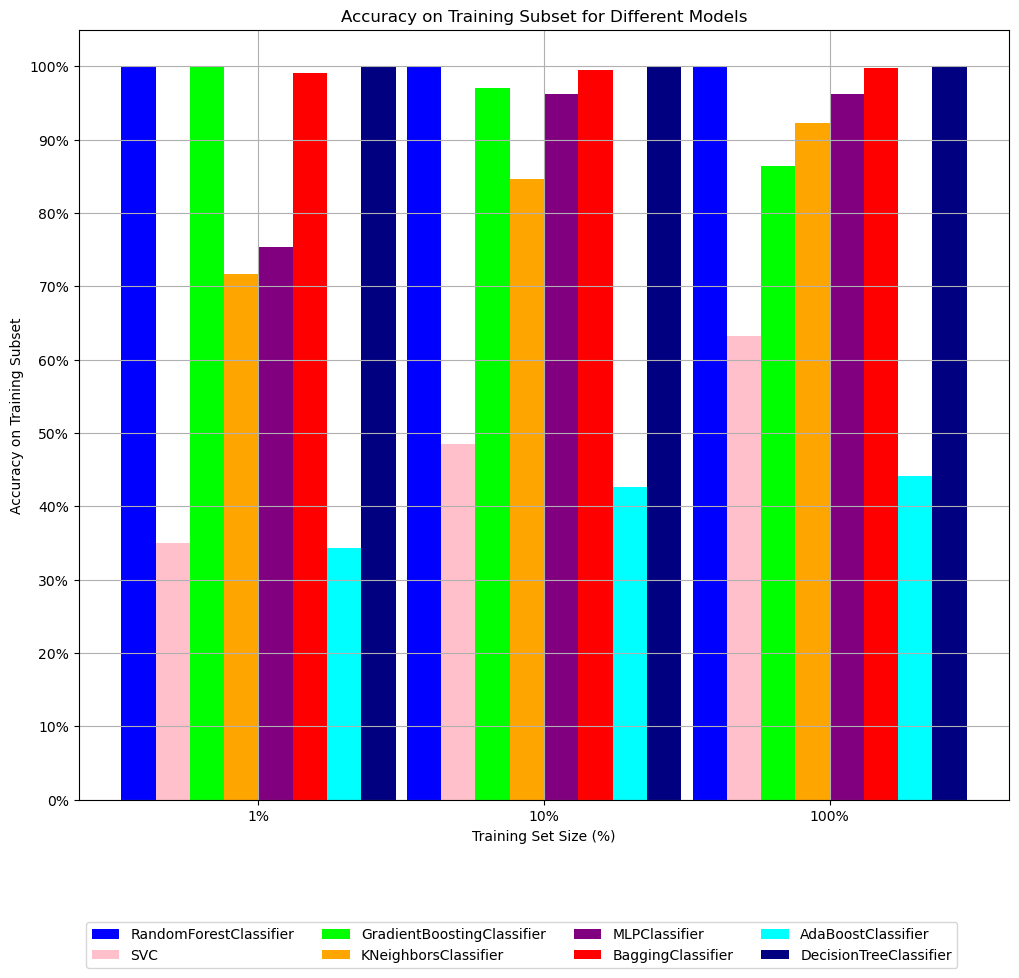

In [12]:
# Plot the accuracy scores using bar plots
plt.figure(figsize=(12, 10))

# Define colors for each model (include colors for the two new models)
colors = ['#0000FF', '#FFC0CB', '#00FF00', '#FFA500', '#800080', '#FF0000', '#00FFFF', '#000080']

# Define width of each bar
bar_width = 0.12

# Calculate x positions for each group
x_positions = np.arange(len(training_sizes))

# Iterate through models and plot their accuracy scores as bars
for i, (model_name, scores) in enumerate(accuracy_scores.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, scores, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy on Training Subset')
plt.title('Accuracy on Training Subset for Different Models')
plt.xticks(x_positions, ['1%', '10%', '100%'])
plt.yticks([i/10 for i in range(11)], ['{}%'.format(i*10) for i in range(11)])

plt.grid(True)

# Add legend in the next line
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\Accuracy_Training.png", bbox_inches='tight')



# Show plot
plt.show()


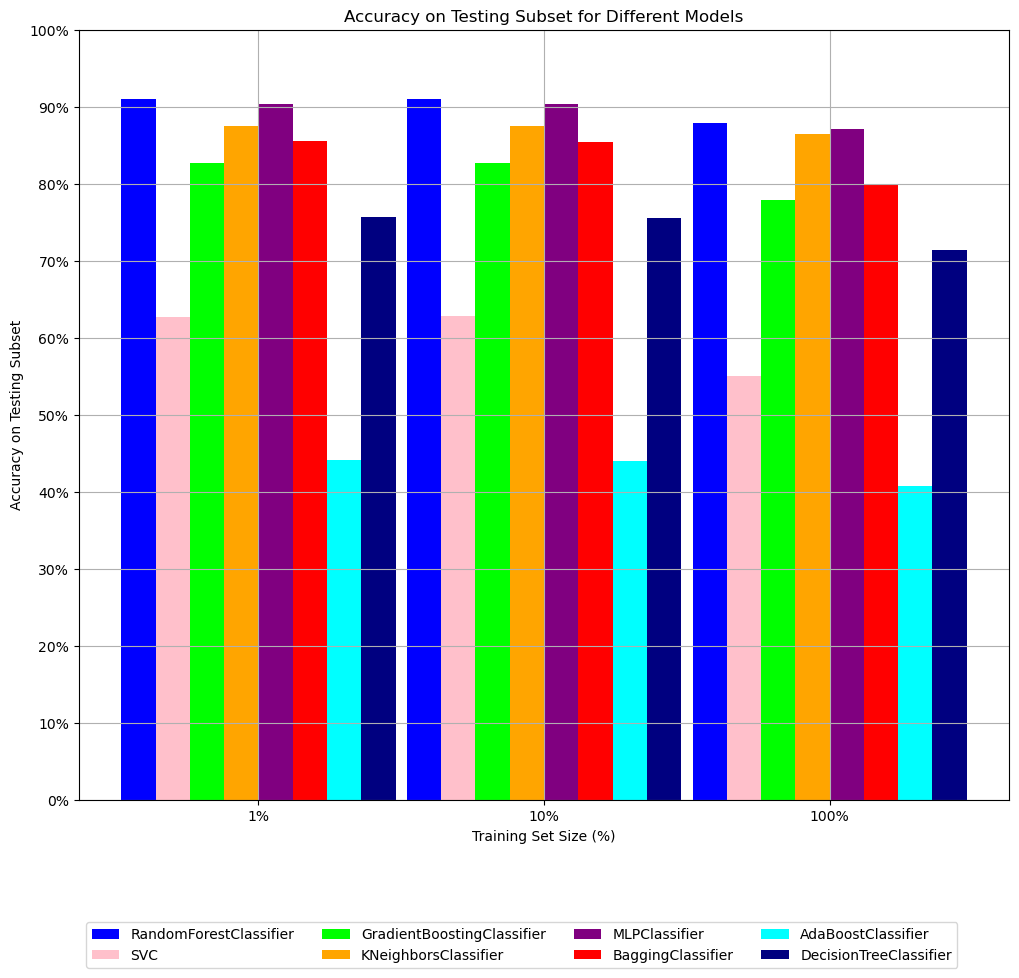

In [13]:
# Initialize a dictionary to store accuracy scores for each model on the testing subset
test_accuracy_scores = {model_name: [] for model_name in models}

# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    _, X_test_subset, _, y_test_subset = train_test_split(X_test, y_test, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Prediction on testing set
        y_test_pred = model.predict(X_test_subset)
        
        # Accuracy on testing set
        test_accuracy = accuracy_score(y_true=y_test_subset, y_pred=y_test_pred)
        
        # Append accuracy to the respective model's list
        test_accuracy_scores[model_name].append(test_accuracy)

# Plot the accuracy scores using bar plots
plt.figure(figsize=(12, 10))

# Iterate through models and plot their accuracy scores as bars
for i, (model_name, scores) in enumerate(test_accuracy_scores.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, scores, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy on Testing Subset')
plt.title('Accuracy on Testing Subset for Different Models')
plt.xticks(x_positions, ['1%', '10%', '100%'])
plt.yticks([i/10 for i in range(11)], ['{}%'.format(i*10) for i in range(11)])
plt.grid(True)

# Add legend in the next line
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\Accuracy_Testing.png", bbox_inches='tight')

# Show plot
plt.show()


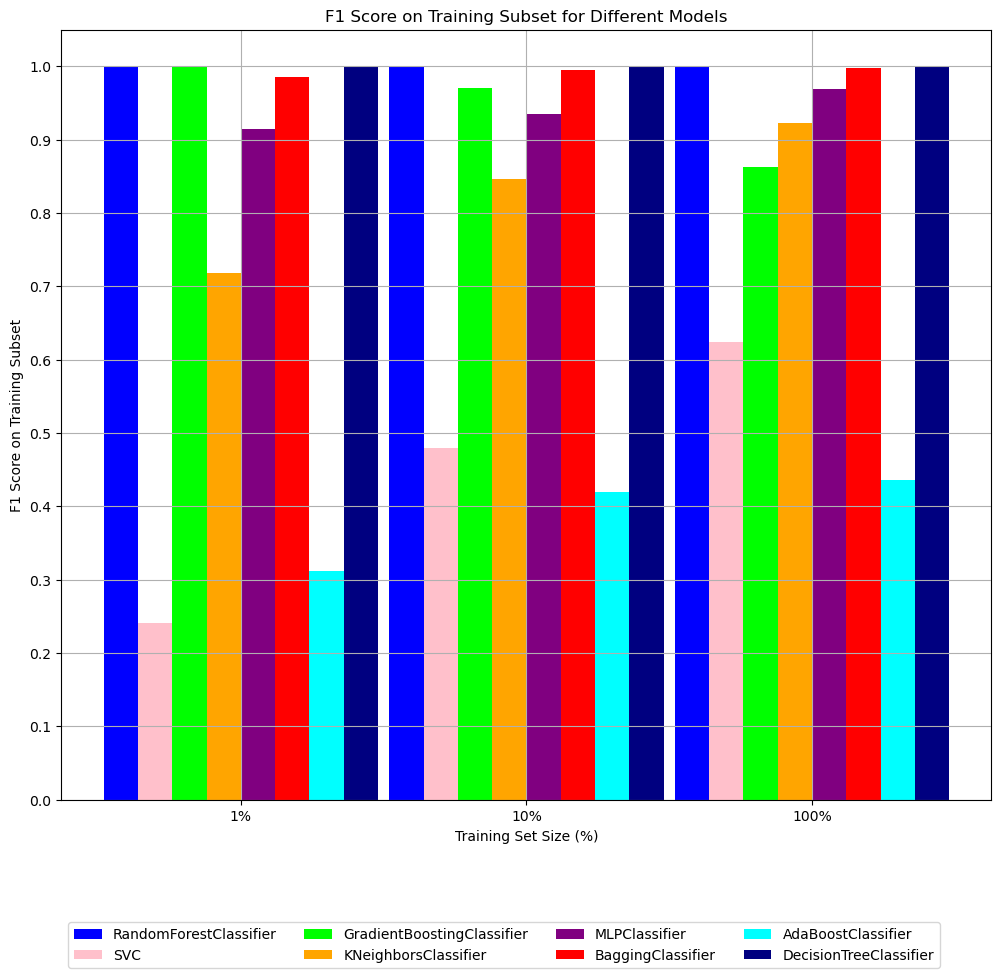

In [14]:
from sklearn.metrics import f1_score

# Initialize a dictionary to store F1 scores for each model on the training subset
train_f1_scores = {model_name: [] for model_name in models}

# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Training
        model.fit(X_train_subset, y_train_subset)
        
        # Prediction on training set
        y_train_pred = model.predict(X_train_subset)
        
        # F1 score on training set
        train_f1 = f1_score(y_true=y_train_subset, y_pred=y_train_pred, average='weighted')
        
        # Append F1 score to the respective model's list
        train_f1_scores[model_name].append(train_f1)

# Plot the F1 scores using bar plots
plt.figure(figsize=(12, 10))

# Iterate through models and plot their F1 scores as bars
for i, (model_name, scores) in enumerate(train_f1_scores.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, scores, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score on Training Subset')
plt.title('F1 Score on Training Subset for Different Models')
plt.xticks(x_positions, ['1%', '10%', '100%'])
plt.yticks([i/10 for i in range(11)])
plt.grid(True)

# Add legend in the next line
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\F1_score_Training.png", bbox_inches='tight')

# Show plot
plt.show()


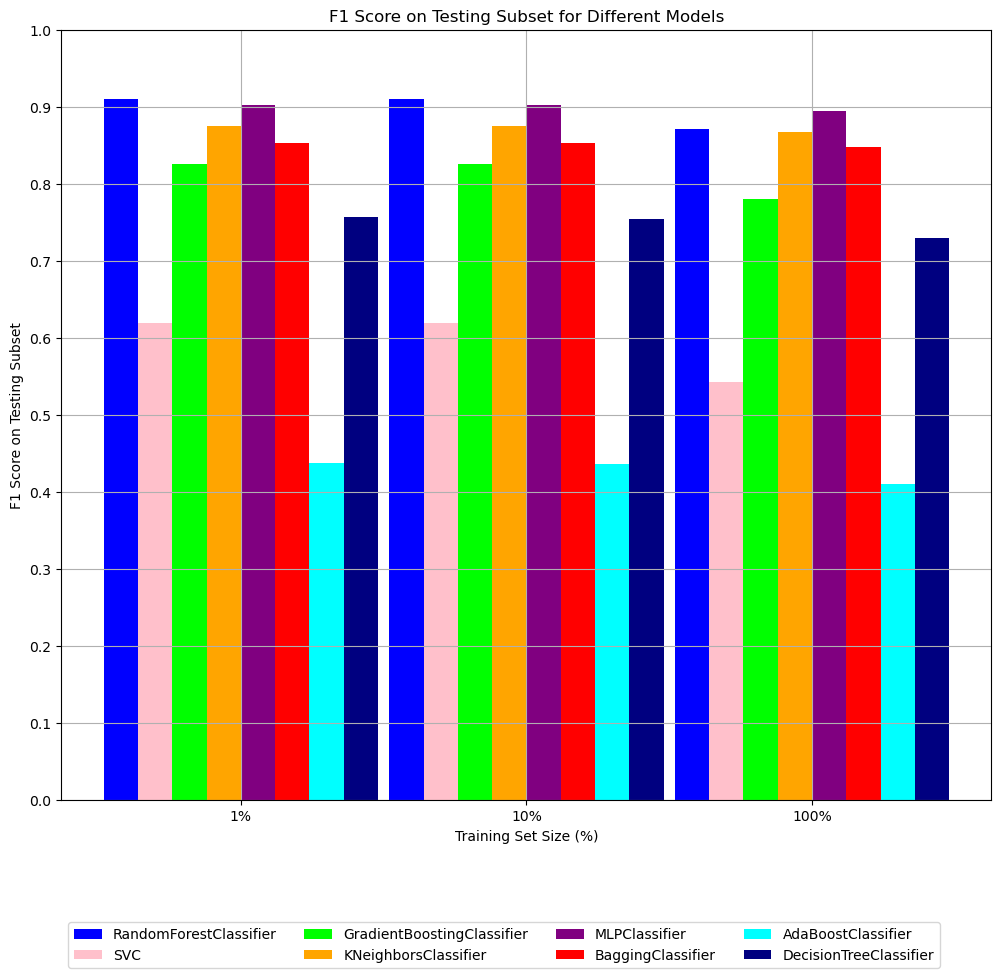

In [15]:
# Initialize a dictionary to store F1 scores for each model on the testing subset
test_f1_scores = {model_name: [] for model_name in models}

# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    _, X_test_subset, _, y_test_subset = train_test_split(X_test, y_test, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Prediction on testing set
        y_test_pred = model.predict(X_test_subset)
        
        # F1 score on testing set
        test_f1 = f1_score(y_true=y_test_subset, y_pred=y_test_pred, average='weighted')
        
        # Append F1 score to the respective model's list
        test_f1_scores[model_name].append(test_f1)

# Plot the F1 scores using bar plots
plt.figure(figsize=(12, 10))

# Iterate through models and plot their F1 scores as bars
for i, (model_name, scores) in enumerate(test_f1_scores.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, scores, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score on Testing Subset')
plt.title('F1 Score on Testing Subset for Different Models')
plt.xticks(x_positions, ['1%', '10%', '100%'])
plt.yticks([i/10 for i in range(11)])
plt.grid(True)

# Add legend in the next line
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\F1_score_Testing.png", bbox_inches='tight')

# Show plot
plt.show()


<Figure size 1200x1000 with 0 Axes>

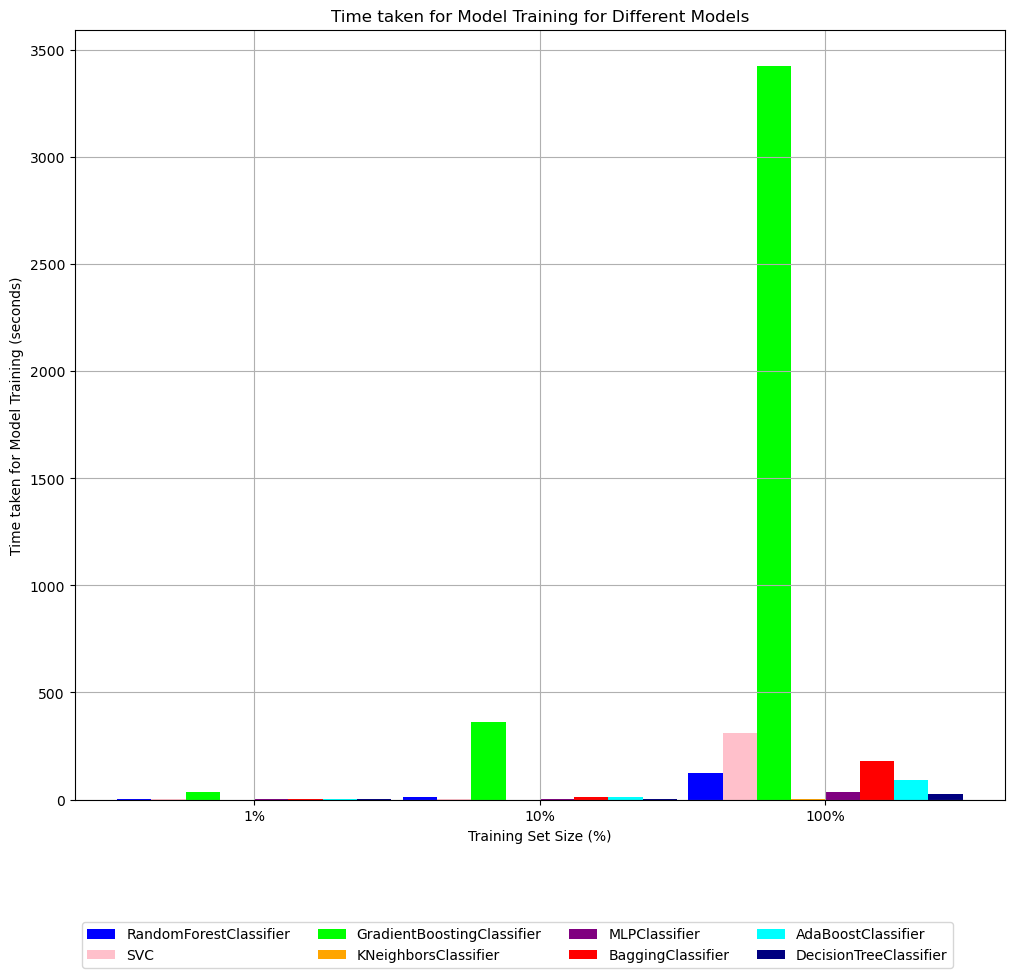

In [16]:
# Plot the accuracy scores using bar plots
plt.figure(figsize=(12, 10))

# Define colors for each model (include colors for the two new models)
colors = ['#0000FF', '#FFC0CB', '#00FF00', '#FFA500', '#800080', '#FF0000', '#00FFFF', '#000080']

# Define width of each bar
bar_width = 0.12

# Calculate x positions for each group
x_positions = np.arange(len(training_sizes))


import time

# Initialize a dictionary to store training times for each model
training_times = {model_name: [] for model_name in models}

# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Start time
        start_time = time.time()
        
        # Training
        model.fit(X_train_subset, y_train_subset)
        
        # End time
        end_time = time.time()
        
        # Training time
        training_time = end_time - start_time
        
        # Append training time to the respective model's list
        training_times[model_name].append(training_time)

# Plot the training times using bar plots
plt.figure(figsize=(12, 10))

# Iterate through models and plot their training times as bars
for i, (model_name, times) in enumerate(training_times.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, times, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('Time taken for Model Training (seconds)')
plt.title('Time taken for Model Training for Different Models')
plt.xticks(x_positions, ['1%', '10%', '100%'])

plt.grid(True)

# Add legend in the next line
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\Time_Training.png", bbox_inches='tight')

# Show plot
plt.show()


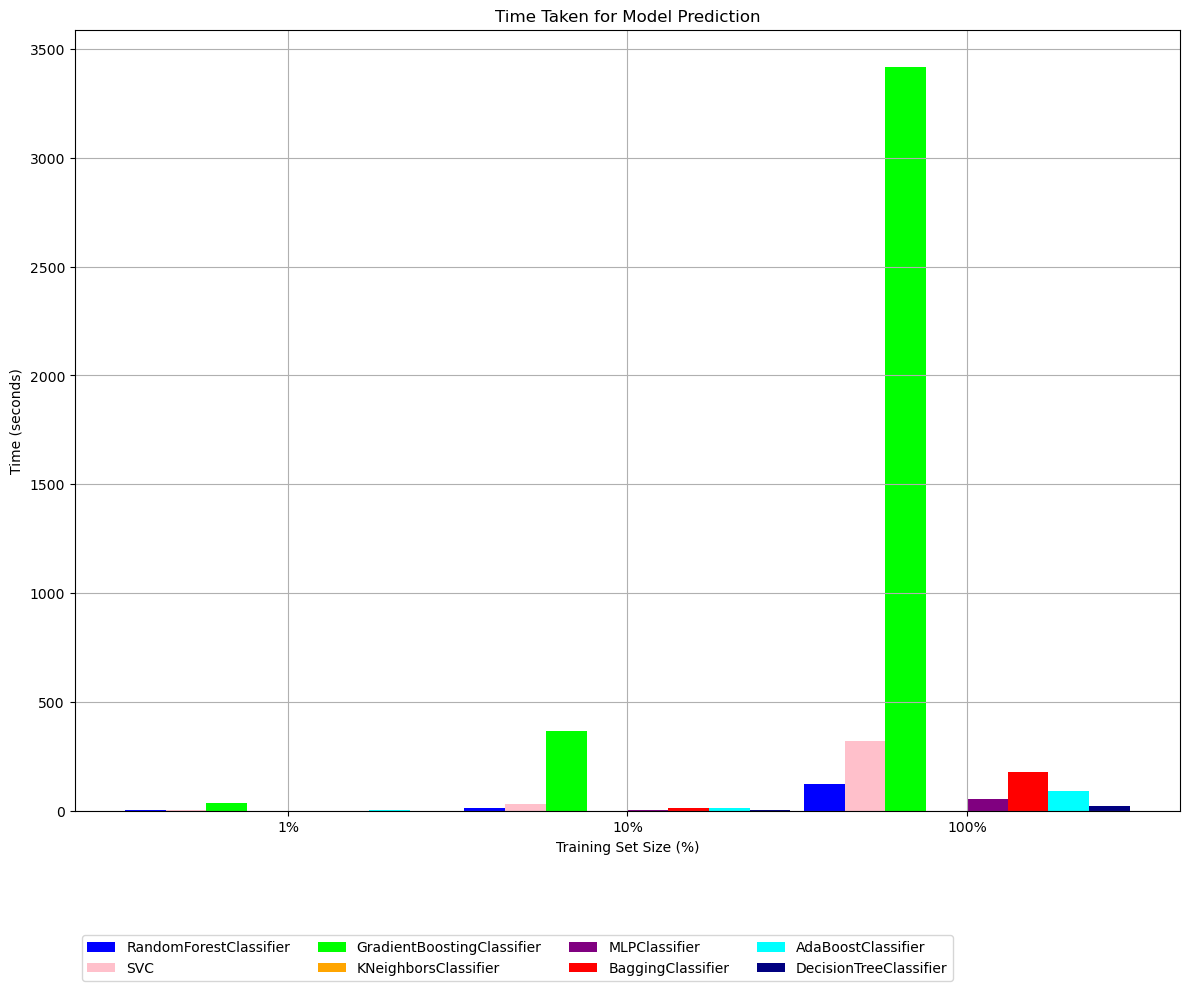

In [17]:
import time

# Initialize a dictionary to store prediction times for each model
prediction_times = {model_name: [] for model_name in models}

# Iterate through training set sizes
for size in training_sizes:
    # Split the data with the current training size
    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_train, y_train, train_size=size, random_state=7)
    
    # Loop through models
    for model_name, model in models.items():
        # Prediction time
        start_time = time.time()
        model.fit(X_train_subset, y_train_subset)
        model.predict(X_test_subset)
        prediction_time = time.time() - start_time
        
        # Append times to the respective model's lists
        prediction_times[model_name].append(prediction_time)

# Plot the prediction times using bar plots
plt.figure(figsize=(12, 10))

# Iterate through models and plot their prediction times as bars
for i, (model_name, times) in enumerate(prediction_times.items()):
    plt.bar(x_positions - (bar_width * (len(models) - 1) / 2) + i * bar_width, times, width=bar_width, color=colors[i], label=model_name)

# Set labels and ticks
plt.xlabel('Training Set Size (%)')
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Model Prediction')
plt.xticks(x_positions, ['1%', '10%', '100%'])
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.15), ncol=4)

fig = plt.gcf()
fig.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\Time_Prediction.png", bbox_inches='tight')


# Show plot
plt.tight_layout()
plt.show()

